
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

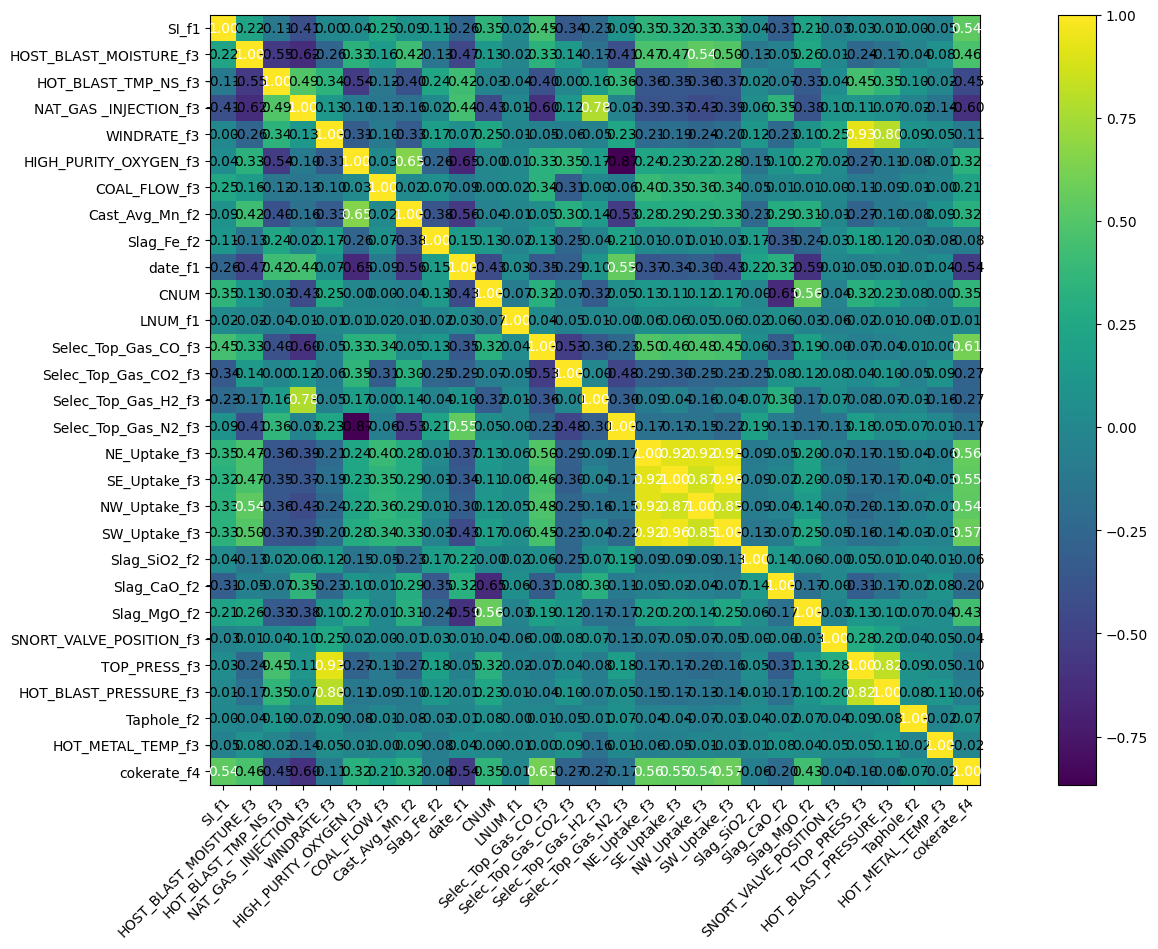

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

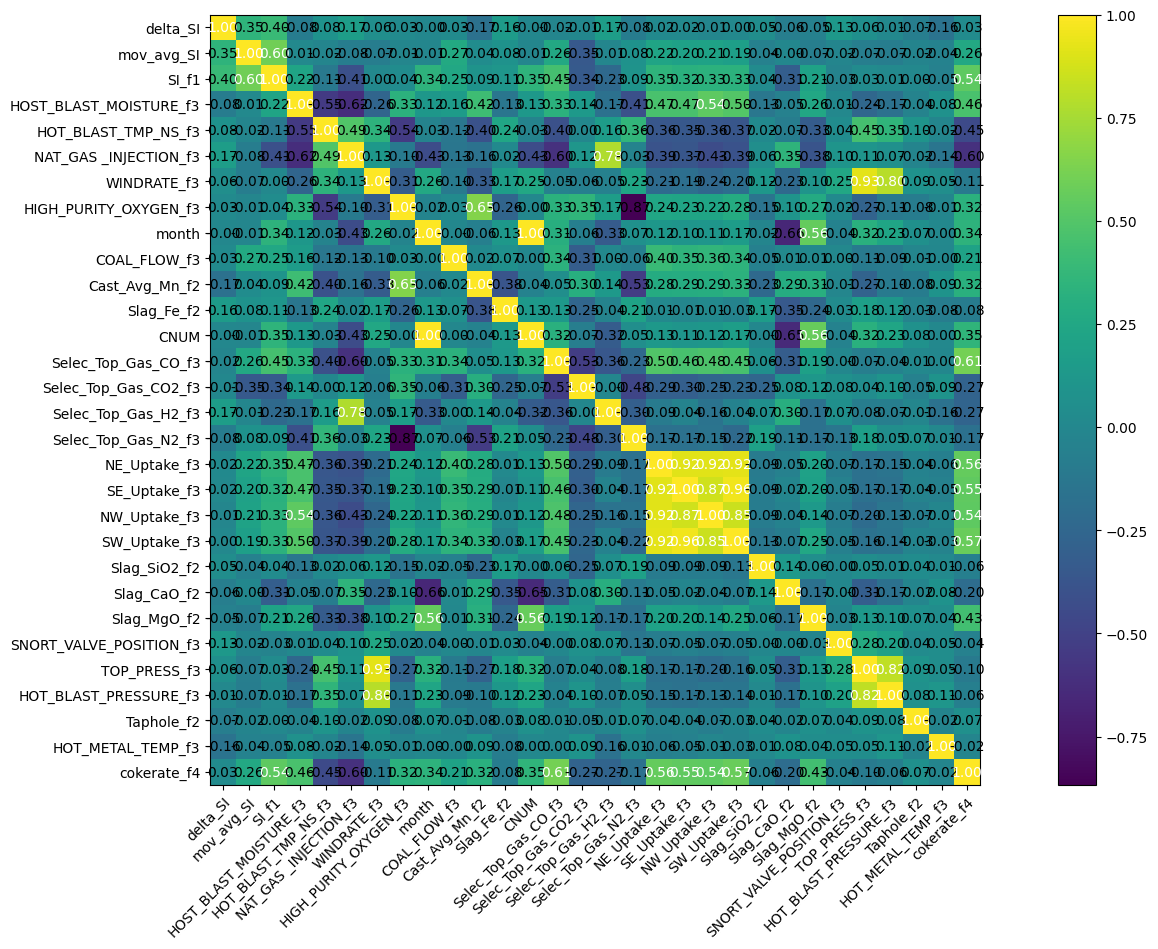

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## alpha = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        alpha = 0.99
        
        
        main_loss       = criterion(idx_pred[:, 7:], yb[:, 7:])  # focus on final steps
        ## main_loss       = criterion(idx_pred[:, :2], yb[:, :2])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        ## smoothness_loss = F.mse_loss(idx_pred[:, 0, :], idx_pred[:, 1, :])  # or across time steps
        loss_total      = main_loss ## + 0.01 * smoothness_loss 

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 100 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []

all_real_si_000to500 = []
all_pred_si_000to500 = []

all_real_si_000to1000 = []
all_pred_si_000to1000 = []



In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, chunk000to500_train, chunk000to1000_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.143193
Loss_SI: 1.2611802816390991 Loss_all: 1.18474280834198
===
[100] Train Loss: 0.141803
Loss_SI: 0.5787073373794556 Loss_all: 0.538301408290863
===
[200] Train Loss: 0.060486
Loss_SI: 0.4669874608516693 Loss_all: 0.49644896388053894
===
[300] Train Loss: 0.021688
Loss_SI: 0.37350645661354065 Loss_all: 0.3776569366455078
===
[400] Train Loss: 0.017339
Loss_SI: 0.3597804605960846 Loss_all: 0.44292792677879333
===
[500] Train Loss: 0.019704
Loss_SI: 0.39042341709136963 Loss_all: 0.3609461188316345
===
[600] Train Loss: 0.013605
Loss_SI: 0.34370657801628113 Loss_all: 0.3775598108768463
===
[700] Train Loss: 0.013009
Loss_SI: 0.2922140955924988 Loss_all: 0.31932172179222107
===
[800] Train Loss: 0.011398
Loss_SI: 0.3234126567840576 Loss_all: 0.33024007081985474
===
[900] Train Loss: 0.012271
Loss_SI: 0.34914731979370117 Loss_all: 0.3137378692626953
===


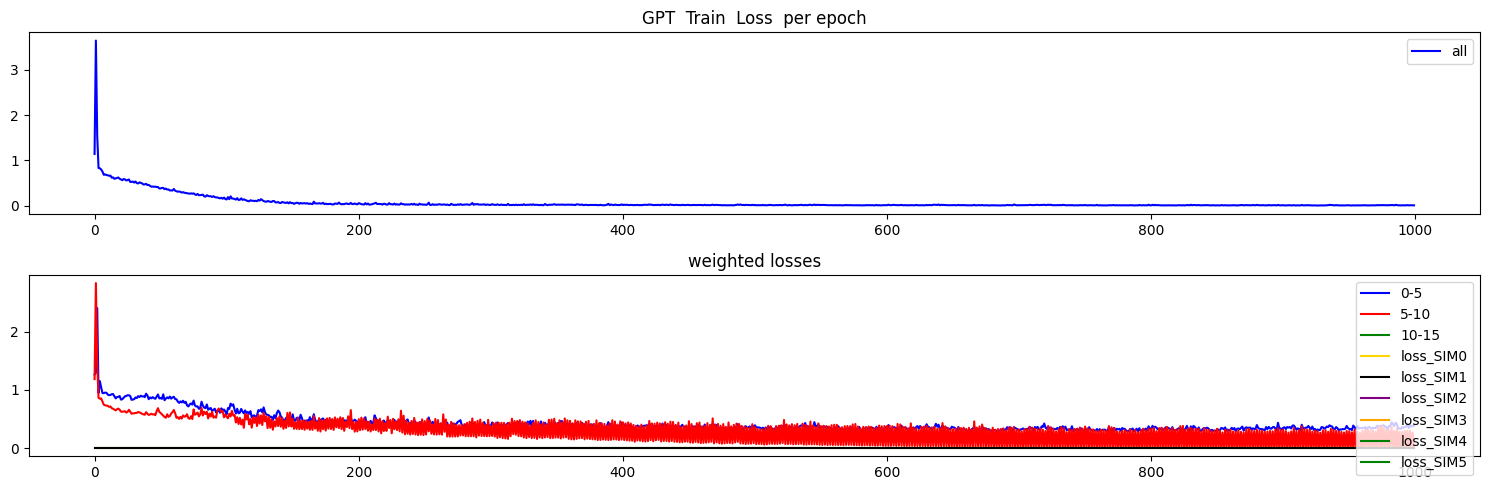

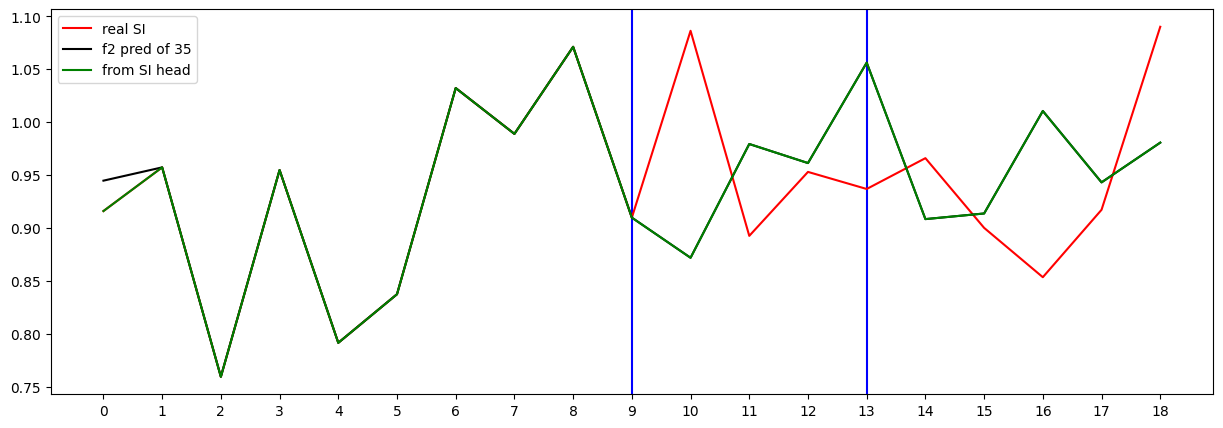

Testing R**2 - (all) - (no inputs):  0.9583507409266399
Testing R**2 - (f2) - SI full (no inputs):  -0.34753103646319117
Testing R**2 - SI head only (no inputs):  -0.34753103646319117
0 ...index R**2 (no inputs):  -0.8244347225320856
1 ...index R**2 (no inputs):  -0.8507799715027347
2 ...index R**2 (no inputs):  -0.34753103646319117
3 ...index R**2 (no inputs):  -32.61047500655794
4 ...index R**2 (no inputs):  -4.209064298880457
5 ...index R**2 (no inputs):  -253.6859875454004
6 ...index R**2 (no inputs):  -40.779465875891304
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.9582532012488456
10 ...index R**2 (no inputs):  0.15599047963899326
11 ...index R**2 (no inputs):  -917.1219464765231
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.540179506574438
16 ...index R**2 (no inputs):  -0.47842038702569223
17 ...index R**2 (no inputs):  -17286.174

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.066034
Loss_SI: 0.9226369261741638 Loss_all: 1.1469591856002808
===
[100] Train Loss: 0.238332
Loss_SI: 0.5050753951072693 Loss_all: 0.4392985999584198
===
[200] Train Loss: 0.087622
Loss_SI: 0.5122396349906921 Loss_all: 0.4237774610519409
===
[300] Train Loss: 0.046930
Loss_SI: 0.3987135589122772 Loss_all: 0.4033852815628052
===
[400] Train Loss: 0.025186
Loss_SI: 0.3562121093273163 Loss_all: 0.4198790490627289
===
[500] Train Loss: 0.026099
Loss_SI: 0.37581130862236023 Loss_all: 0.34519755840301514
===
[600] Train Loss: 0.035069
Loss_SI: 0.38943588733673096 Loss_all: 0.4117013216018677
===
[700] Train Loss: 0.034029
Loss_SI: 0.4421633183956146 Loss_all: 0.5359052419662476
===
[800] Train Loss: 0.017152
Loss_SI: 0.36101624369621277 Loss_all: 0.3864230811595917
===
[900] Train Loss: 0.015071
Loss_SI: 0.32078561186790466 Loss_all: 0.3070288896560669
===


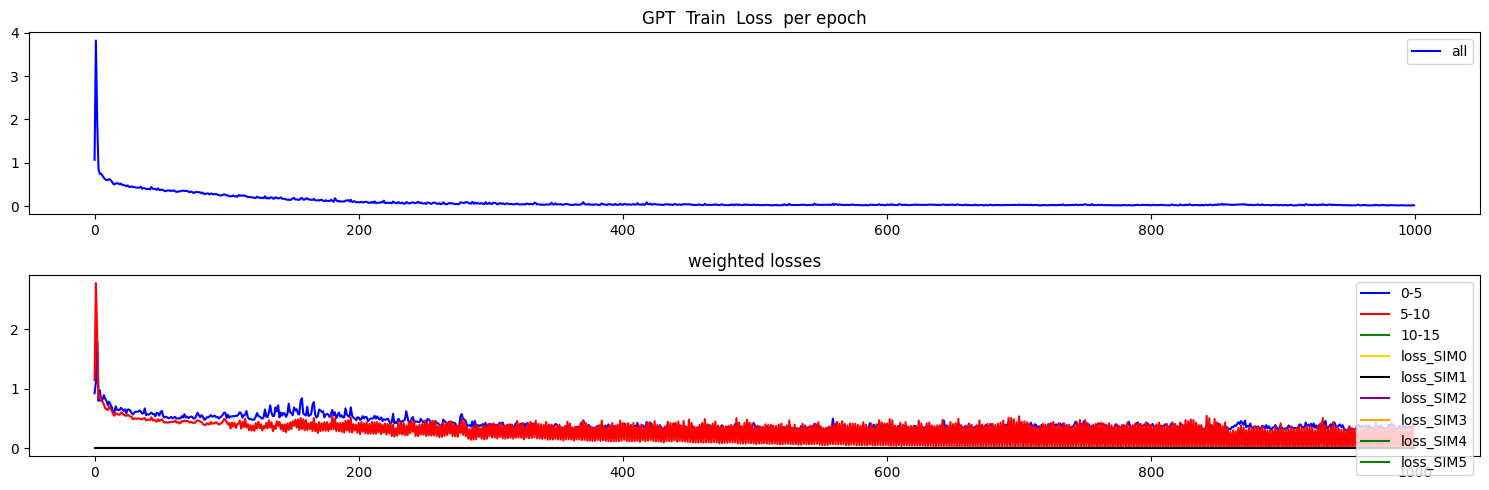

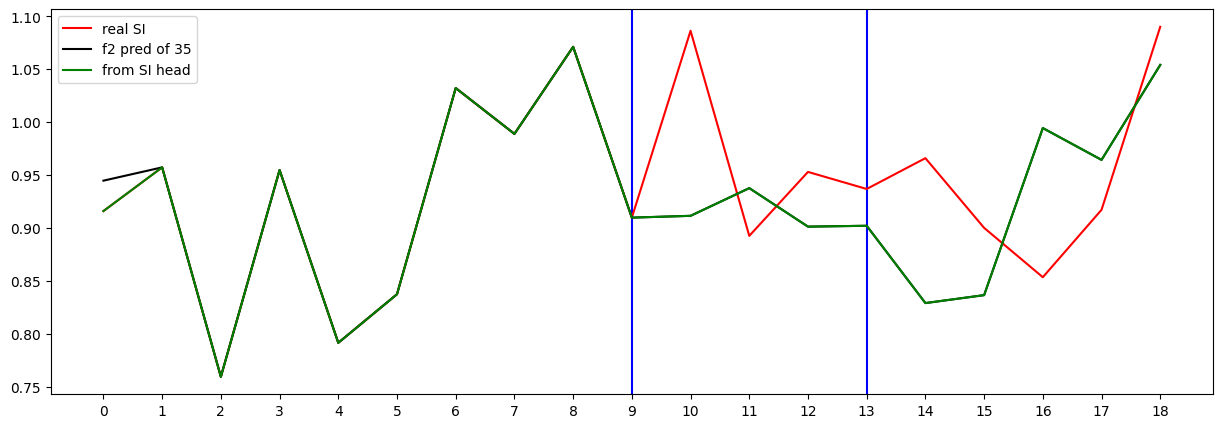

Testing R**2 - (all) - (no inputs):  0.9156434685706173
Testing R**2 - (f2) - SI full (no inputs):  -0.46118813317080054
Testing R**2 - SI head only (no inputs):  -0.46118813317080054
0 ...index R**2 (no inputs):  -0.6867526461583309
1 ...index R**2 (no inputs):  -1.5233596760131052
2 ...index R**2 (no inputs):  -0.46118813317080054
3 ...index R**2 (no inputs):  -62.004288325062795
4 ...index R**2 (no inputs):  -5.676096705964736
5 ...index R**2 (no inputs):  -540.6188913672631
6 ...index R**2 (no inputs):  -68.78467692920789
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.213870963403325
10 ...index R**2 (no inputs):  -1.1852821793236328
11 ...index R**2 (no inputs):  -571.3143353112733
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -16.84245451730414
16 ...index R**2 (no inputs):  -0.18842069820396778
17 ...index R**2 (no inputs):  -16016.72605

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.280477
Loss_SI: 1.42268967628479 Loss_all: 1.2813040018081665
===
[100] Train Loss: 0.342847
Loss_SI: 0.6199555993080139 Loss_all: 0.44614100456237793
===
[200] Train Loss: 0.118947
Loss_SI: 0.5104790329933167 Loss_all: 0.33204808831214905
===
[300] Train Loss: 0.090503
Loss_SI: 0.5407822728157043 Loss_all: 0.3125087320804596
===
[400] Train Loss: 0.061229
Loss_SI: 0.5521324276924133 Loss_all: 0.3441368341445923
===
[500] Train Loss: 0.043386
Loss_SI: 0.40913325548171997 Loss_all: 0.27312228083610535
===
[600] Train Loss: 0.025641
Loss_SI: 0.3122020661830902 Loss_all: 0.2421848624944687
===
[700] Train Loss: 0.019367
Loss_SI: 0.3269819915294647 Loss_all: 0.22674569487571716
===
[800] Train Loss: 0.032427
Loss_SI: 0.35988399386405945 Loss_all: 0.26440662145614624
===
[900] Train Loss: 0.021580
Loss_SI: 0.3269743323326111 Loss_all: 0.24825133383274078
===


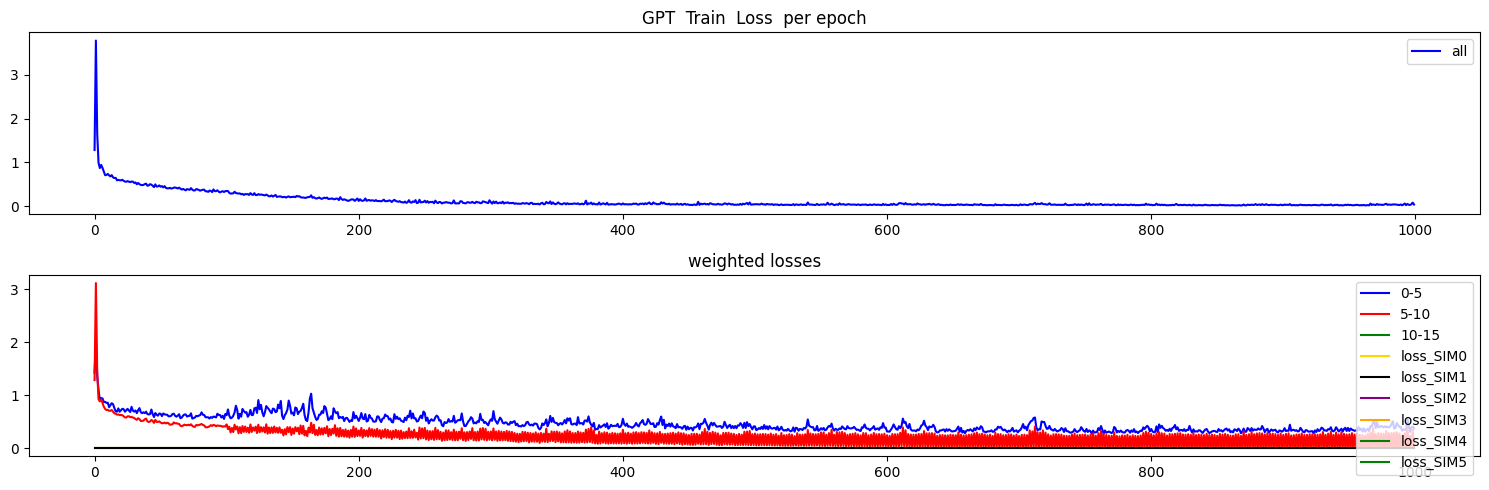

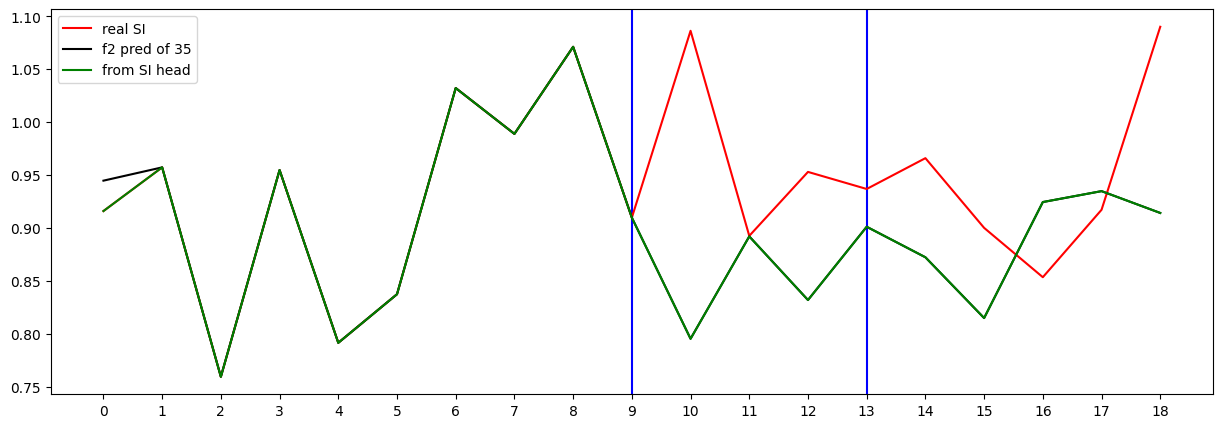

Testing R**2 - (all) - (no inputs):  0.9375370510459191
Testing R**2 - (f2) - SI full (no inputs):  -0.5363381482498886
Testing R**2 - SI head only (no inputs):  -0.5363381482498886
0 ...index R**2 (no inputs):  0.31250845001599115
1 ...index R**2 (no inputs):  -0.42140253087519586
2 ...index R**2 (no inputs):  -0.5363381482498886
3 ...index R**2 (no inputs):  -155.47022823748503
4 ...index R**2 (no inputs):  -1.2532219442665067
5 ...index R**2 (no inputs):  -394.5138318936978
6 ...index R**2 (no inputs):  -60.042432867765186
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7846171813045475
10 ...index R**2 (no inputs):  -1.417813204443536
11 ...index R**2 (no inputs):  -1151.0235289508869
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -14.967870215881991
16 ...index R**2 (no inputs):  -0.299839001190483
17 ...index R**2 (no inputs):  -15682.88756

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.107310
Loss_SI: 1.162288784980774 Loss_all: 1.194451093673706
===
[100] Train Loss: 0.285646
Loss_SI: 0.46313127875328064 Loss_all: 0.39508047699928284
===
[200] Train Loss: 0.143209
Loss_SI: 0.4626811146736145 Loss_all: 0.3522500693798065
===
[300] Train Loss: 0.076492
Loss_SI: 0.45388898253440857 Loss_all: 0.33534085750579834
===
[400] Train Loss: 0.053043
Loss_SI: 0.43625950813293457 Loss_all: 0.34579357504844666
===
[500] Train Loss: 0.044080
Loss_SI: 0.3556846082210541 Loss_all: 0.3033599555492401
===
[600] Train Loss: 0.035482
Loss_SI: 0.3707386553287506 Loss_all: 0.32401522994041443
===
[700] Train Loss: 0.039832
Loss_SI: 0.27687641978263855 Loss_all: 0.2892228364944458
===
[800] Train Loss: 0.029598
Loss_SI: 0.2839580178260803 Loss_all: 0.29156652092933655
===
[900] Train Loss: 0.020342
Loss_SI: 0.2845601737499237 Loss_all: 0.26431769132614136
===


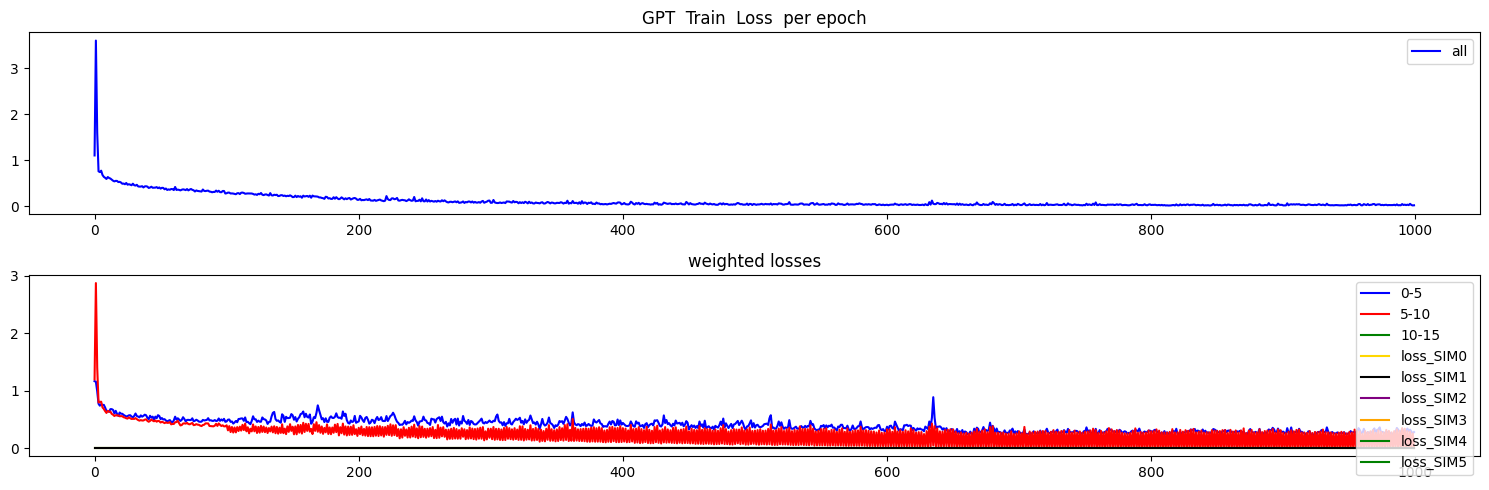

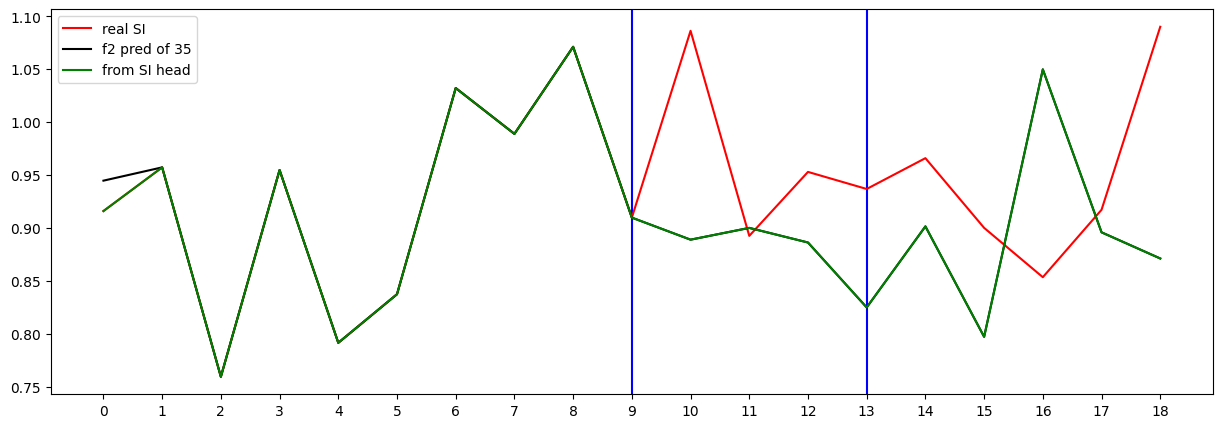

Testing R**2 - (all) - (no inputs):  0.9357432635398182
Testing R**2 - (f2) - SI full (no inputs):  -1.4039996494393914
Testing R**2 - SI head only (no inputs):  -1.4039996494393914
0 ...index R**2 (no inputs):  -1.306283060101571
1 ...index R**2 (no inputs):  -1.6023345144314063
2 ...index R**2 (no inputs):  -1.4039996494393914
3 ...index R**2 (no inputs):  -120.90084990195955
4 ...index R**2 (no inputs):  -12.823517890583574
5 ...index R**2 (no inputs):  -404.51024527742203
6 ...index R**2 (no inputs):  -40.55429489691595
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.5040578107825286
10 ...index R**2 (no inputs):  -1.462232625392108
11 ...index R**2 (no inputs):  -693.4641391056455
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.253972580716969
16 ...index R**2 (no inputs):  -0.24746530859711546
17 ...index R**2 (no inputs):  -17232.319217

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


[0] Train Loss: 1.294282
Loss_SI: 1.225193977355957 Loss_all: 1.2910741567611694
===
[100] Train Loss: 0.320416
Loss_SI: 0.5323417782783508 Loss_all: 0.38984373211860657
===
[200] Train Loss: 0.179919
Loss_SI: 0.811732292175293 Loss_all: 0.3723751902580261
===
[300] Train Loss: 0.130207
Loss_SI: 0.5662741661071777 Loss_all: 0.3617689609527588
===
[400] Train Loss: 0.050536
Loss_SI: 0.3580179810523987 Loss_all: 0.2819899618625641
===
[500] Train Loss: 0.059055
Loss_SI: 0.34911900758743286 Loss_all: 0.2725905478000641
===
[600] Train Loss: 0.036125
Loss_SI: 0.3136666417121887 Loss_all: 0.22708861529827118
===
[700] Train Loss: 0.026777
Loss_SI: 0.4473562240600586 Loss_all: 0.2408183515071869
===
[800] Train Loss: 0.034359
Loss_SI: 0.302600622177124 Loss_all: 0.22830712795257568
===
[900] Train Loss: 0.021198
Loss_SI: 0.29127463698387146 Loss_all: 0.20435211062431335
===


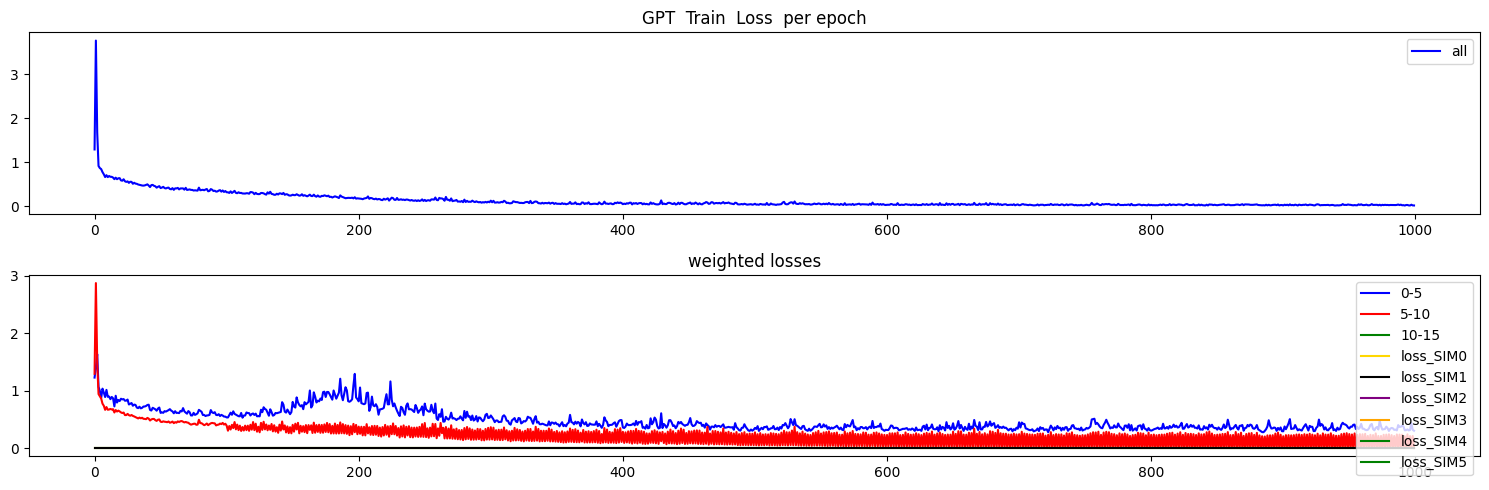

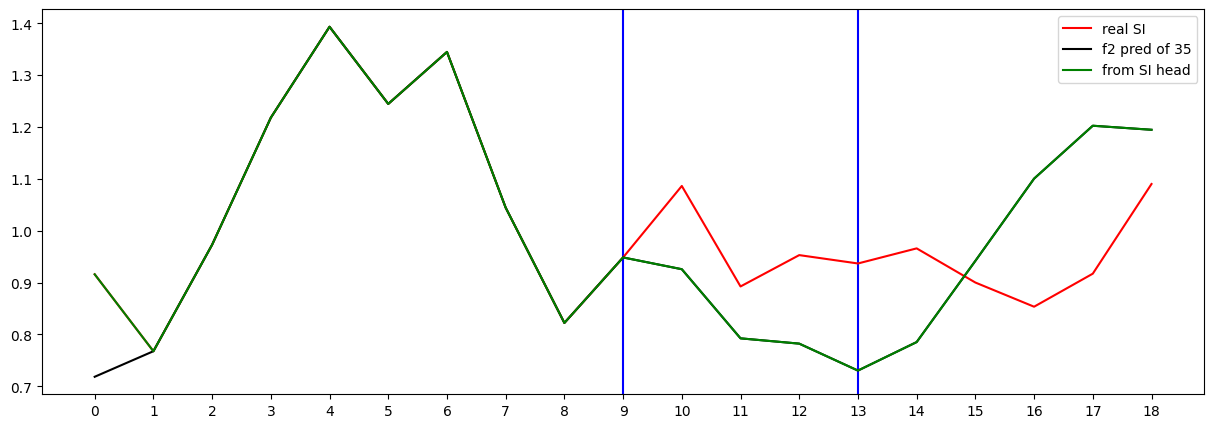

Testing R**2 - (all) - (no inputs):  0.9759889600579058
Testing R**2 - (f2) - SI full (no inputs):  -6.03867744182316
Testing R**2 - SI head only (no inputs):  -6.03867744182316
0 ...index R**2 (no inputs):  -0.47180557374173504
1 ...index R**2 (no inputs):  -4.273502969657155
2 ...index R**2 (no inputs):  -6.03867744182316
3 ...index R**2 (no inputs):  -50.58041657113562
4 ...index R**2 (no inputs):  -4.630933698495774
5 ...index R**2 (no inputs):  -157.17307297358454
6 ...index R**2 (no inputs):  -5.574233210780673
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -5.127767754973267
10 ...index R**2 (no inputs):  -0.9400344949948904
11 ...index R**2 (no inputs):  -515.2893384448479
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -133.2754879688486
16 ...index R**2 (no inputs):  -0.07962942833943853
17 ...index R**2 (no inputs):  -916.4997384943782
18

In [30]:

## chunk000to500_train, chunk000to1000_train

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )



[0] Train Loss: 1.297612
Loss_SI: 1.4692537784576416 Loss_all: 1.3337091207504272
===
[100] Train Loss: 0.346116
Loss_SI: 0.4869404733181 Loss_all: 0.3761110007762909
===
[200] Train Loss: 0.301864
Loss_SI: 0.46571215987205505 Loss_all: 0.3865105211734772
===
[300] Train Loss: 0.193848
Loss_SI: 0.36497408151626587 Loss_all: 0.3051913380622864
===
[400] Train Loss: 0.135040
Loss_SI: 0.3240068554878235 Loss_all: 0.27360641956329346
===
[500] Train Loss: 0.079263
Loss_SI: 0.27741503715515137 Loss_all: 0.22842158377170563
===
[600] Train Loss: 0.141766
Loss_SI: 0.32710564136505127 Loss_all: 0.30698245763778687
===
[700] Train Loss: 0.066690
Loss_SI: 0.30454909801483154 Loss_all: 0.25355902314186096
===
[800] Train Loss: 0.058265
Loss_SI: 0.27669766545295715 Loss_all: 0.23287422955036163
===
[900] Train Loss: 0.046591
Loss_SI: 0.26751604676246643 Loss_all: 0.22627103328704834
===


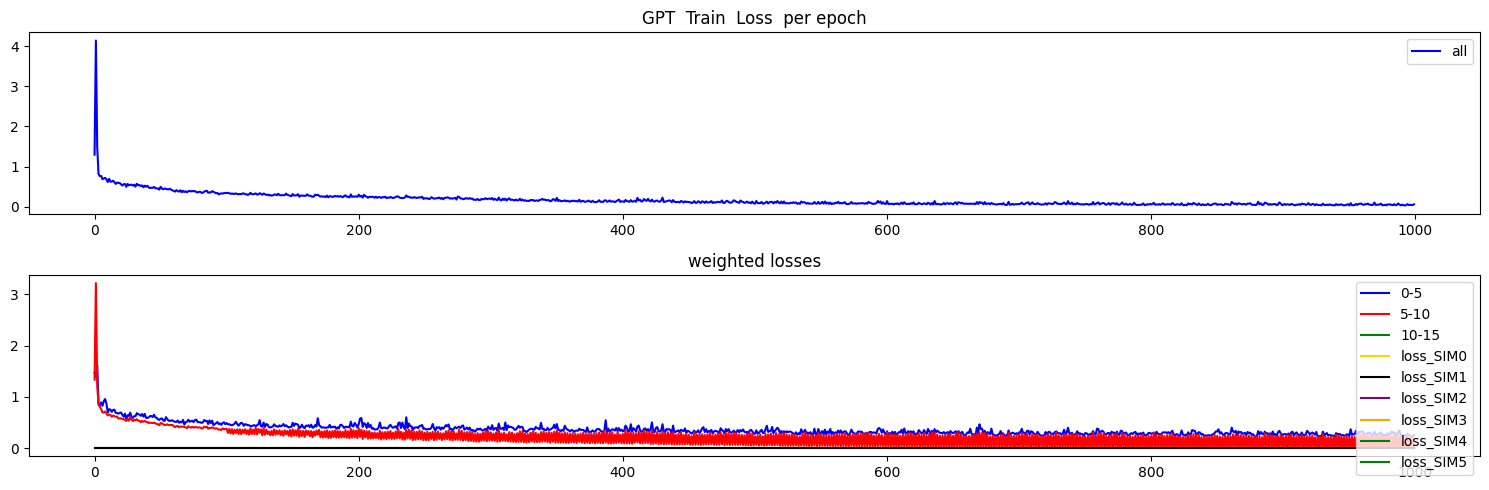

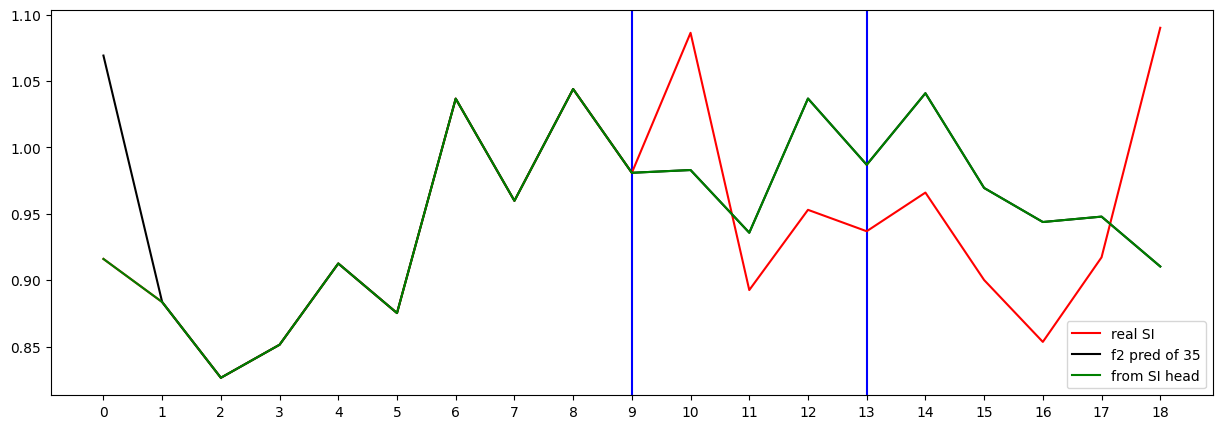

Testing R**2 - (all) - (no inputs):  0.9895182691931513
Testing R**2 - (f2) - SI full (no inputs):  -1.049518542922569
Testing R**2 - SI head only (no inputs):  -1.049518542922569
0 ...index R**2 (no inputs):  -0.54898992111671
1 ...index R**2 (no inputs):  -0.9724498036578892
2 ...index R**2 (no inputs):  -1.049518542922569
3 ...index R**2 (no inputs):  -124.38965415078019
4 ...index R**2 (no inputs):  -21.5436069512584
5 ...index R**2 (no inputs):  -68.37693268442969
6 ...index R**2 (no inputs):  -69.25571636131549
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.680948254603719
10 ...index R**2 (no inputs):  0.5536558284581139
11 ...index R**2 (no inputs):  -34.79293105672123
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6677376179825285
16 ...index R**2 (no inputs):  -0.34418906199187305
17 ...index R**2 (no inputs):  -296.3274646832108
18

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to1000_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to1000_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to1000.append( res_real )
all_pred_si_000to1000.append( res_pred )



## Run 2


In [32]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, chunk000to500_train, chunk000to1000_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.227845
Loss_SI: 0.8963775634765625 Loss_all: 1.184188961982727
===
[100] Train Loss: 0.160165
Loss_SI: 0.4305606484413147 Loss_all: 0.38910895586013794
===
[200] Train Loss: 0.039782
Loss_SI: 0.35541707277297974 Loss_all: 0.3012655973434448
===
[300] Train Loss: 0.019714
Loss_SI: 0.27097490429878235 Loss_all: 0.22949126362800598
===
[400] Train Loss: 0.019658
Loss_SI: 0.24950659275054932 Loss_all: 0.24468471109867096
===
[500] Train Loss: 0.014583
Loss_SI: 0.21538634598255157 Loss_all: 0.22885555028915405
===
[600] Train Loss: 0.017769
Loss_SI: 0.24304531514644623 Loss_all: 0.23617182672023773
===
[700] Train Loss: 0.015887
Loss_SI: 0.20214000344276428 Loss_all: 0.23990891873836517
===
[800] Train Loss: 0.017269
Loss_SI: 0.19896012544631958 Loss_all: 0.21345262229442596
===
[900] Train Loss: 0.009875
Loss_SI: 0.18943075835704803 Loss_all: 0.22793646156787872
===


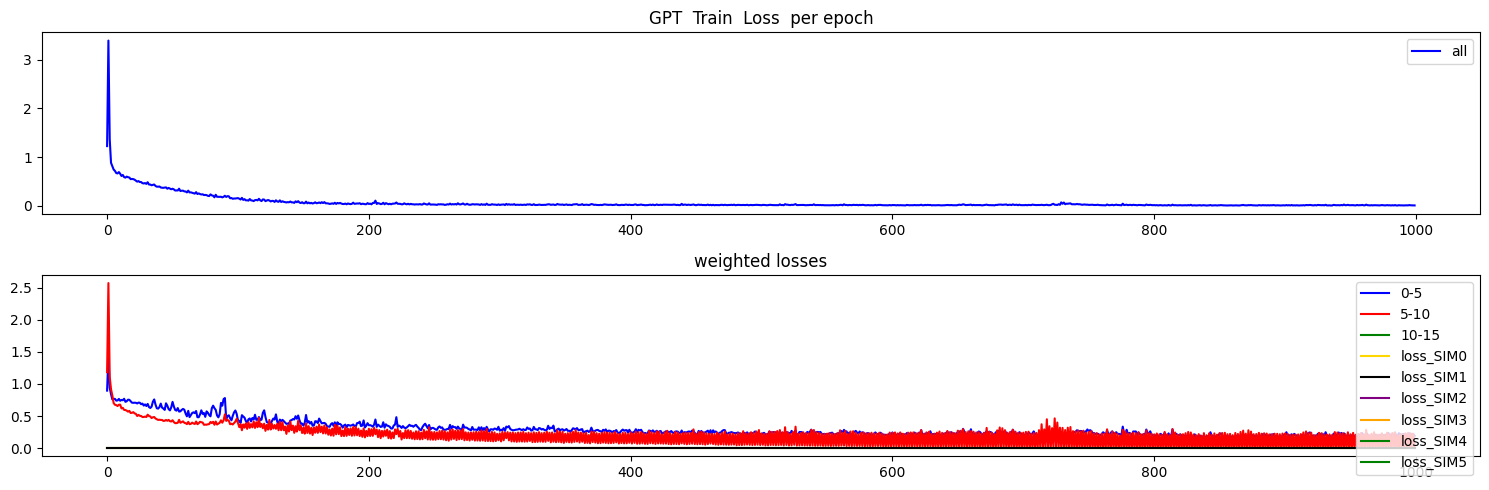

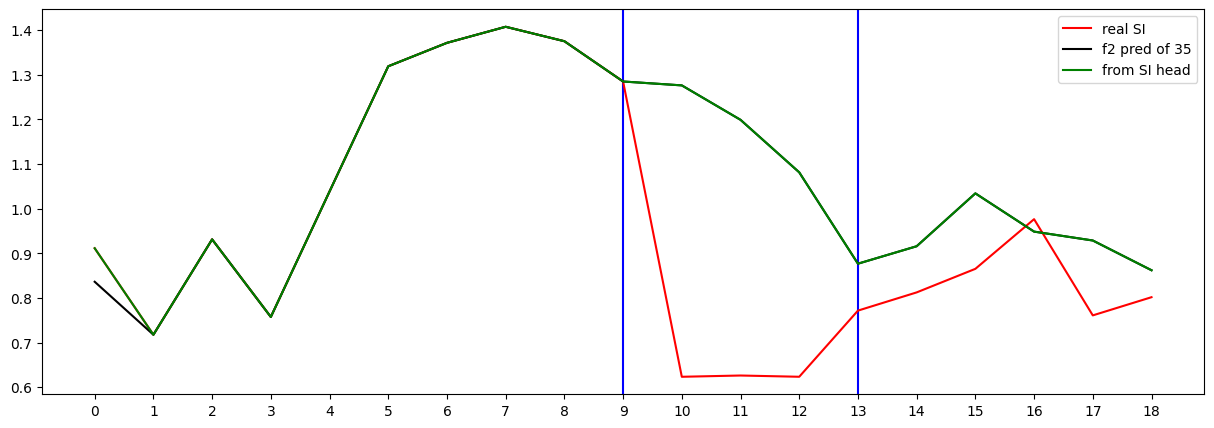

Testing R**2 - (all) - (no inputs):  0.9762367327933085
Testing R**2 - (f2) - SI full (no inputs):  -7.202431610431043
Testing R**2 - SI head only (no inputs):  -7.202431610431043
0 ...index R**2 (no inputs):  -1.2297349765969852
1 ...index R**2 (no inputs):  -3.5769815926769954
2 ...index R**2 (no inputs):  -7.202431610431043
3 ...index R**2 (no inputs):  -111.71679094673081
4 ...index R**2 (no inputs):  -6.067700805401215
5 ...index R**2 (no inputs):  -6558.786492404783
6 ...index R**2 (no inputs):  -5.194642771867611
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9258974785359209
10 ...index R**2 (no inputs):  -5.125187215975366
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.30091335120692
16 ...index R**2 (no inputs):  -1.9510543947100705
17 ...index R**2 (no inputs):  -48516.560583043334
18 ...index R**

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.181175
Loss_SI: 1.3039870262145996 Loss_all: 1.2001317739486694
===
[100] Train Loss: 0.290769
Loss_SI: 0.8777125477790833 Loss_all: 0.4575999081134796
===
[200] Train Loss: 0.057491
Loss_SI: 0.42293357849121094 Loss_all: 0.39108210802078247
===
[300] Train Loss: 0.034746
Loss_SI: 0.3602140545845032 Loss_all: 0.3316504657268524
===
[400] Train Loss: 0.022695
Loss_SI: 0.31645840406417847 Loss_all: 0.30654963850975037
===
[500] Train Loss: 0.033576
Loss_SI: 0.3690205514431 Loss_all: 0.33191731572151184
===
[600] Train Loss: 0.031731
Loss_SI: 0.35293498635292053 Loss_all: 0.2978315055370331
===
[700] Train Loss: 0.027522
Loss_SI: 0.36129066348075867 Loss_all: 0.32808437943458557
===
[800] Train Loss: 0.024818
Loss_SI: 0.357433557510376 Loss_all: 0.3753546178340912
===
[900] Train Loss: 0.025379
Loss_SI: 0.2950117588043213 Loss_all: 0.2117079198360443
===


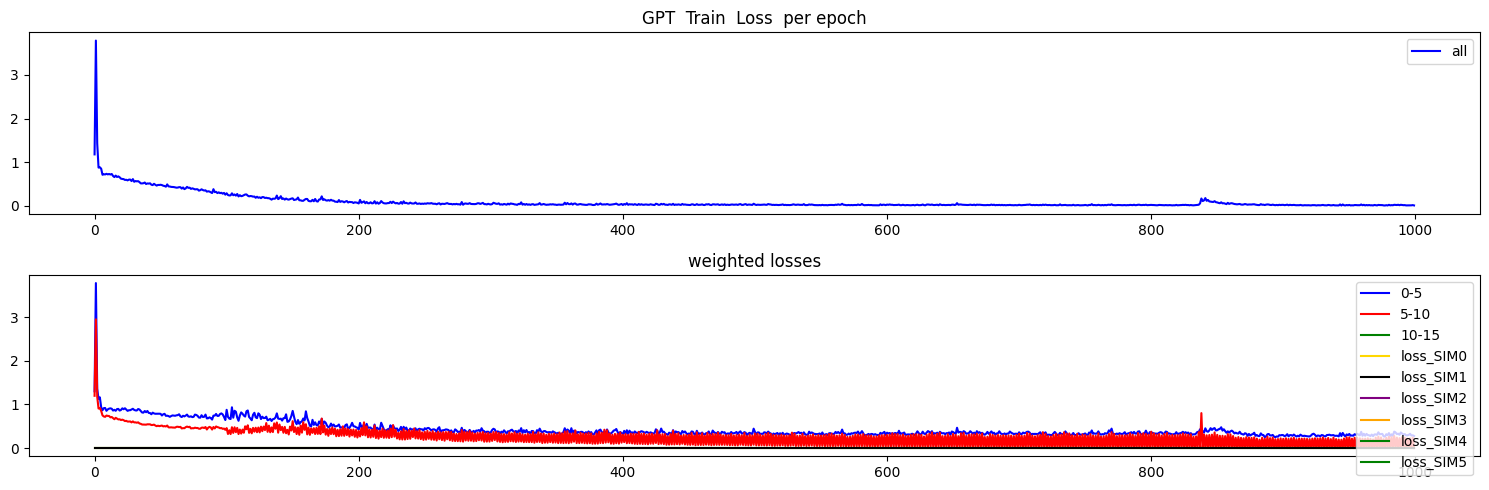

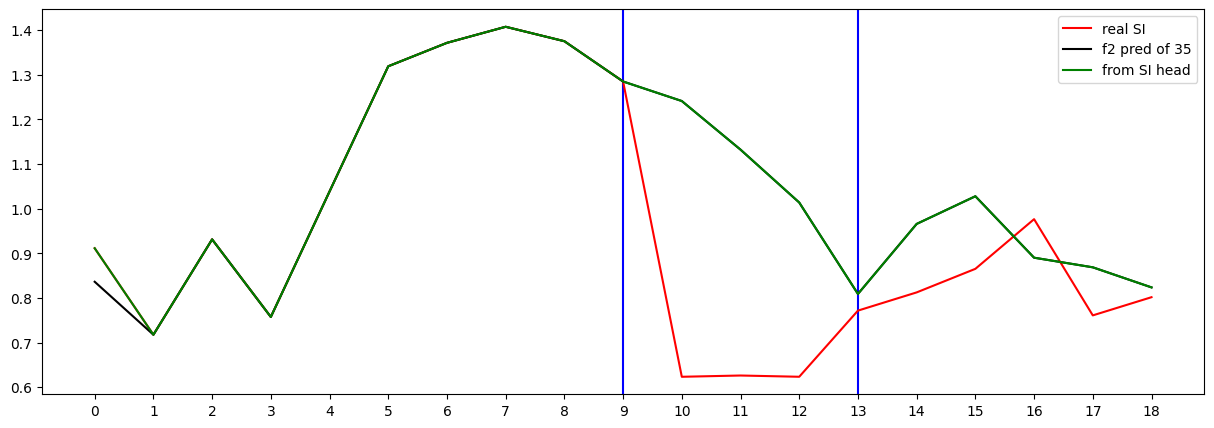

Testing R**2 - (all) - (no inputs):  0.9774712188629028
Testing R**2 - (f2) - SI full (no inputs):  -5.619924065220256
Testing R**2 - SI head only (no inputs):  -5.619924065220256
0 ...index R**2 (no inputs):  -2.047465212330965
1 ...index R**2 (no inputs):  -3.68018138064582
2 ...index R**2 (no inputs):  -5.619924065220256
3 ...index R**2 (no inputs):  -138.49606513098593
4 ...index R**2 (no inputs):  -6.857554947223732
5 ...index R**2 (no inputs):  -6190.7631456887475
6 ...index R**2 (no inputs):  -4.812082244142988
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7469622155092552
10 ...index R**2 (no inputs):  -6.542030463925902
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.298584326896836
16 ...index R**2 (no inputs):  -2.6705345440976314
17 ...index R**2 (no inputs):  -46951.228527644824
18 ...index R**2

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.228076
Loss_SI: 1.286816954612732 Loss_all: 1.2407467365264893
===
[100] Train Loss: 0.268406
Loss_SI: 0.8299938440322876 Loss_all: 0.43765345215797424
===
[200] Train Loss: 0.113708
Loss_SI: 0.5980765223503113 Loss_all: 0.34552106261253357
===
[300] Train Loss: 0.089853
Loss_SI: 0.48843637108802795 Loss_all: 0.3287230134010315
===
[400] Train Loss: 0.052998
Loss_SI: 0.38155490159988403 Loss_all: 0.27969086170196533
===
[500] Train Loss: 0.027701
Loss_SI: 0.3709275424480438 Loss_all: 0.25259876251220703
===
[600] Train Loss: 0.041049
Loss_SI: 0.4187348484992981 Loss_all: 0.27675026655197144
===
[700] Train Loss: 0.040505
Loss_SI: 0.329536110162735 Loss_all: 0.25449296832084656
===
[800] Train Loss: 0.036532
Loss_SI: 0.3430310785770416 Loss_all: 0.28087639808654785
===
[900] Train Loss: 0.033366
Loss_SI: 0.33603519201278687 Loss_all: 0.26938778162002563
===


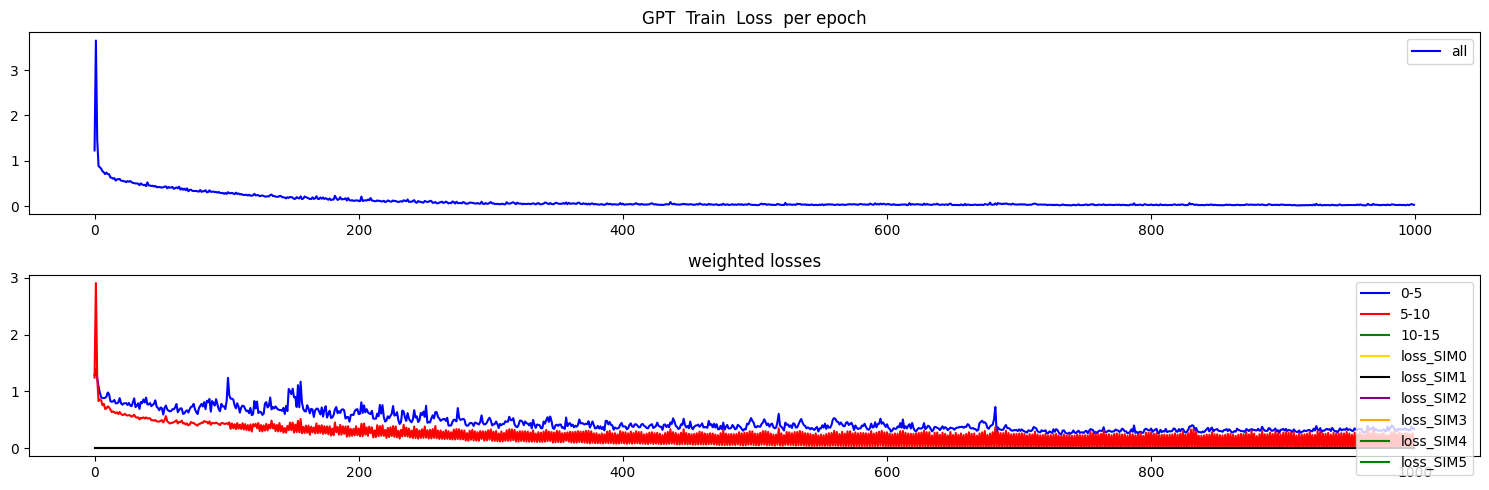

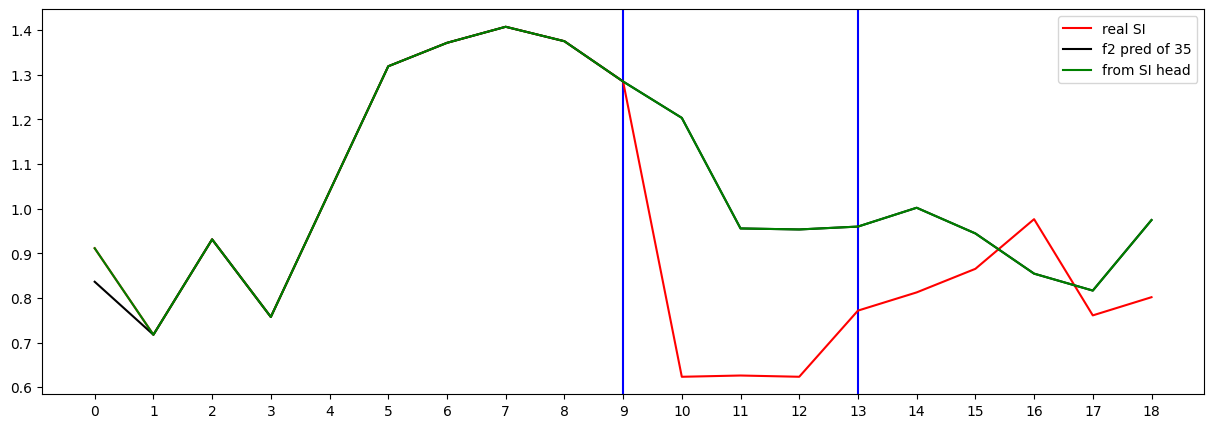

Testing R**2 - (all) - (no inputs):  0.9866835239021831
Testing R**2 - (f2) - SI full (no inputs):  -3.7677123508178987
Testing R**2 - SI head only (no inputs):  -3.7677123508178987
0 ...index R**2 (no inputs):  -0.20659341856426883
1 ...index R**2 (no inputs):  -4.238758650921833
2 ...index R**2 (no inputs):  -3.7677123508178987
3 ...index R**2 (no inputs):  -63.70396116978573
4 ...index R**2 (no inputs):  -9.900736081023634
5 ...index R**2 (no inputs):  -2951.7420738681053
6 ...index R**2 (no inputs):  -4.31496074436885
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8298683012146353
10 ...index R**2 (no inputs):  -4.350847955718463
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.638845357425996
16 ...index R**2 (no inputs):  -0.9707719278663445
17 ...index R**2 (no inputs):  -49755.42176943476
18 ...index R

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.309216
Loss_SI: 1.315767526626587 Loss_all: 1.2907320261001587
===
[100] Train Loss: 0.318210
Loss_SI: 0.6499084234237671 Loss_all: 0.4042406380176544
===
[200] Train Loss: 0.167559
Loss_SI: 0.6484715938568115 Loss_all: 0.3830820918083191
===
[300] Train Loss: 0.087063
Loss_SI: 0.4694405198097229 Loss_all: 0.34947091341018677
===
[400] Train Loss: 0.048543
Loss_SI: 0.39271506667137146 Loss_all: 0.2834847569465637
===
[500] Train Loss: 0.045863
Loss_SI: 0.38007813692092896 Loss_all: 0.2980033755302429
===
[600] Train Loss: 0.041091
Loss_SI: 0.3405189514160156 Loss_all: 0.25581061840057373
===
[700] Train Loss: 0.030305
Loss_SI: 0.30039605498313904 Loss_all: 0.24467043578624725
===
[800] Train Loss: 0.020370
Loss_SI: 0.2702592611312866 Loss_all: 0.21324469149112701
===
[900] Train Loss: 0.025509
Loss_SI: 0.3158681094646454 Loss_all: 0.2632685899734497
===


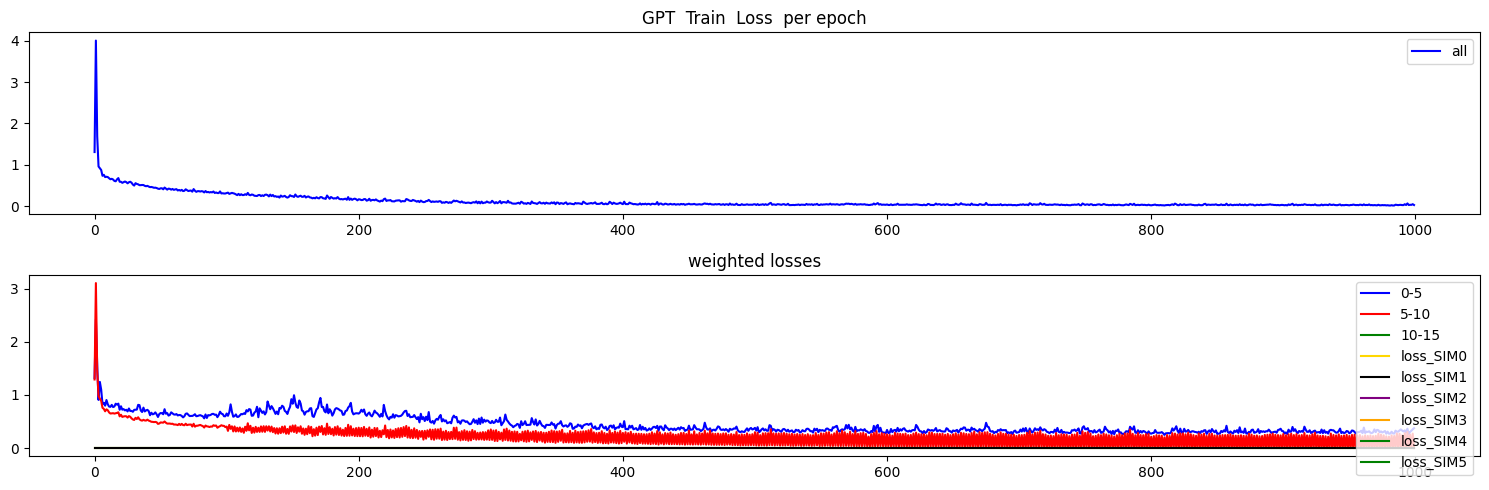

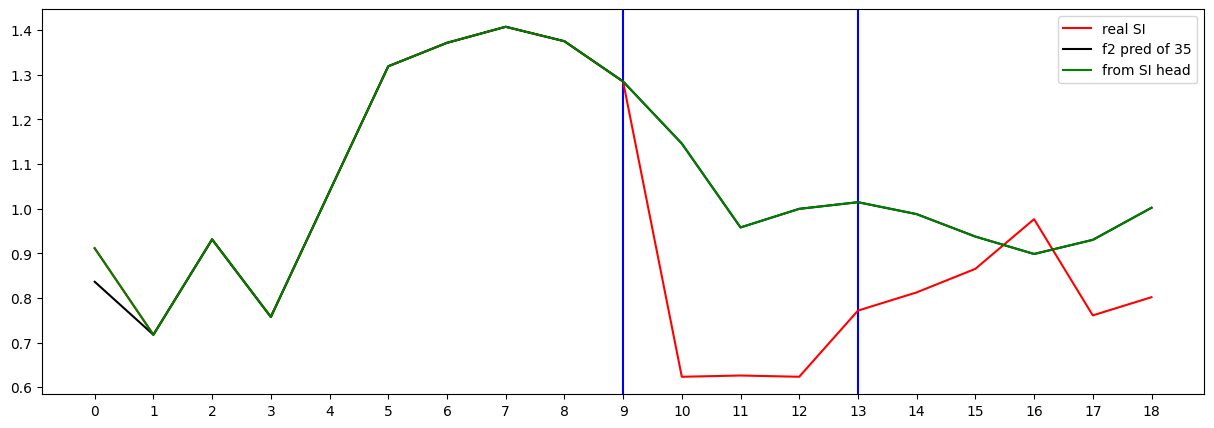

Testing R**2 - (all) - (no inputs):  0.9854785214572057
Testing R**2 - (f2) - SI full (no inputs):  -3.8033681528883845
Testing R**2 - SI head only (no inputs):  -3.8033681528883845
0 ...index R**2 (no inputs):  -0.9850779400412146
1 ...index R**2 (no inputs):  -3.179765658900151
2 ...index R**2 (no inputs):  -3.8033681528883845
3 ...index R**2 (no inputs):  -26.17504462746358
4 ...index R**2 (no inputs):  -16.66960233102176
5 ...index R**2 (no inputs):  -3427.3025504384755
6 ...index R**2 (no inputs):  -5.118112658884092
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22591559778183323
10 ...index R**2 (no inputs):  -3.7909441744851122
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.116476146689783
16 ...index R**2 (no inputs):  -1.2746976428155463
17 ...index R**2 (no inputs):  -47541.79521874084
18 ...index

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


[0] Train Loss: 1.282689
Loss_SI: 1.2688549757003784 Loss_all: 1.2643253803253174
===
[100] Train Loss: 0.321316
Loss_SI: 0.5258340239524841 Loss_all: 0.3796178698539734
===
[200] Train Loss: 0.166146
Loss_SI: 0.523049533367157 Loss_all: 0.3350488841533661
===
[300] Train Loss: 0.107998
Loss_SI: 0.38760074973106384 Loss_all: 0.31343528628349304
===
[400] Train Loss: 0.085841
Loss_SI: 0.4472312927246094 Loss_all: 0.2891498804092407
===
[500] Train Loss: 0.047339
Loss_SI: 0.31264376640319824 Loss_all: 0.25663092732429504
===
[600] Train Loss: 0.037971
Loss_SI: 0.3257598578929901 Loss_all: 0.2599126696586609
===
[700] Train Loss: 0.040569
Loss_SI: 0.4018681049346924 Loss_all: 0.2774087190628052
===
[800] Train Loss: 0.039018
Loss_SI: 0.32502150535583496 Loss_all: 0.24849635362625122
===
[900] Train Loss: 0.021761
Loss_SI: 0.31662794947624207 Loss_all: 0.2373902052640915
===


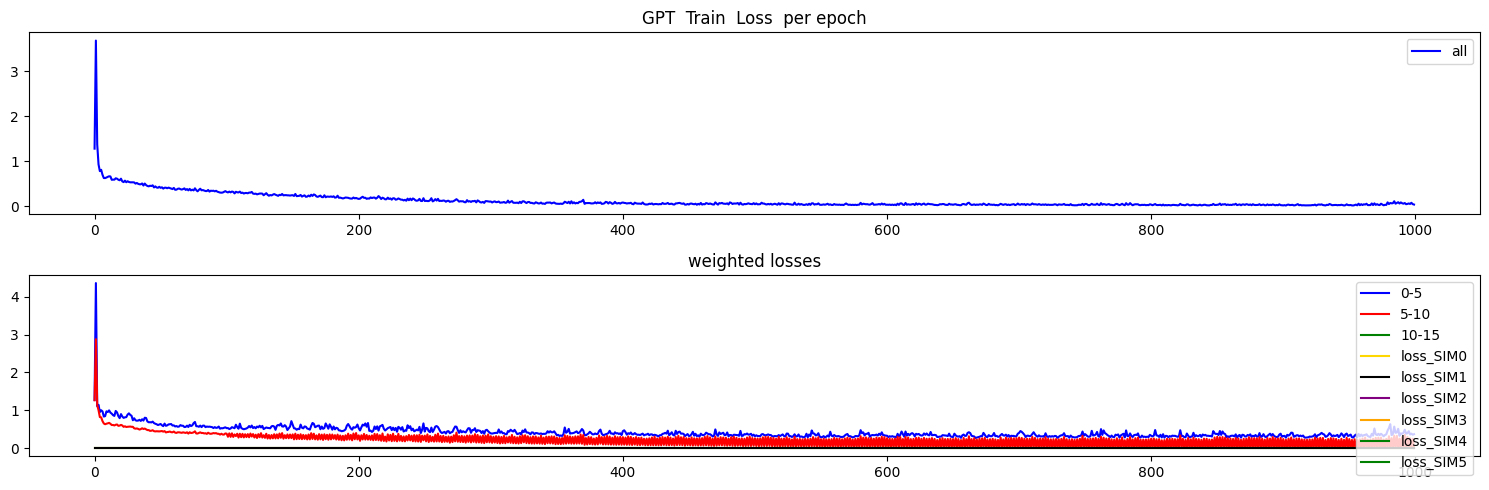

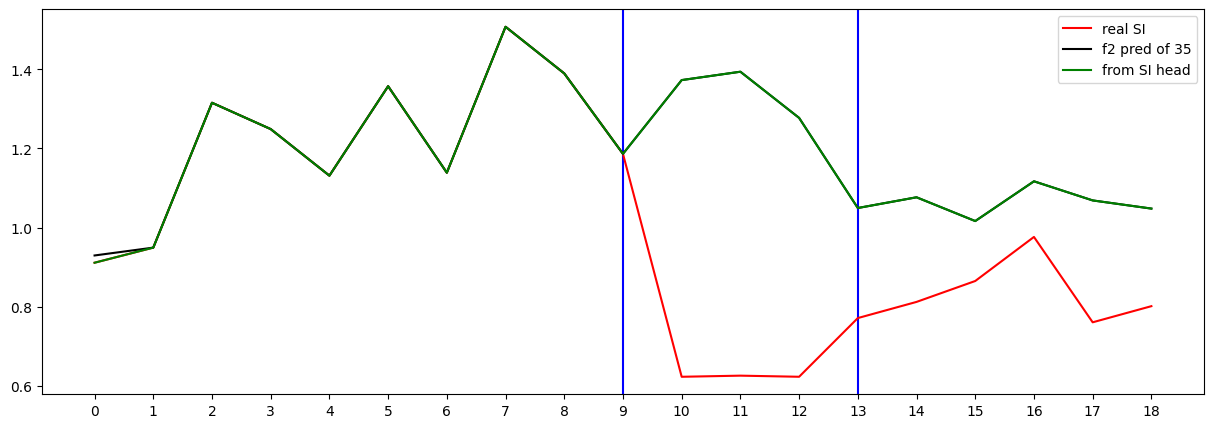

Testing R**2 - (all) - (no inputs):  0.8569727903016258
Testing R**2 - (f2) - SI full (no inputs):  -14.485983653871706
Testing R**2 - SI head only (no inputs):  -14.485983653871706
0 ...index R**2 (no inputs):  -3.072008906330316
1 ...index R**2 (no inputs):  -4.031732700606864
2 ...index R**2 (no inputs):  -14.485983653871706
3 ...index R**2 (no inputs):  -277.91853813740886
4 ...index R**2 (no inputs):  -350.88454924876214
5 ...index R**2 (no inputs):  -48789.538571482844
6 ...index R**2 (no inputs):  -5.81260021121551
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6165311961892501
10 ...index R**2 (no inputs):  0.010908573177223047
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3006397816905153
16 ...index R**2 (no inputs):  -20.772547101578375
17 ...index R**2 (no inputs):  -3668.3791581703226
18 ...ind

In [37]:


si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )


[0] Train Loss: 1.320845
Loss_SI: 1.4850295782089233 Loss_all: 1.3339427709579468
===
[100] Train Loss: 0.406625
Loss_SI: 0.608062744140625 Loss_all: 0.4371180832386017
===
[200] Train Loss: 0.230985
Loss_SI: 0.40495070815086365 Loss_all: 0.30937501788139343
===
[300] Train Loss: 0.180668
Loss_SI: 0.3576943576335907 Loss_all: 0.31768226623535156
===
[400] Train Loss: 0.188940
Loss_SI: 0.5061460137367249 Loss_all: 0.31176573038101196
===
[500] Train Loss: 0.090532
Loss_SI: 0.3239471912384033 Loss_all: 0.2653028070926666
===
[600] Train Loss: 0.115460
Loss_SI: 0.37207934260368347 Loss_all: 0.28128474950790405
===
[700] Train Loss: 0.069756
Loss_SI: 0.31544142961502075 Loss_all: 0.2788803279399872
===
[800] Train Loss: 0.054018
Loss_SI: 0.29597043991088867 Loss_all: 0.2369990348815918
===
[900] Train Loss: 0.054262
Loss_SI: 0.297030508518219 Loss_all: 0.2574227750301361
===


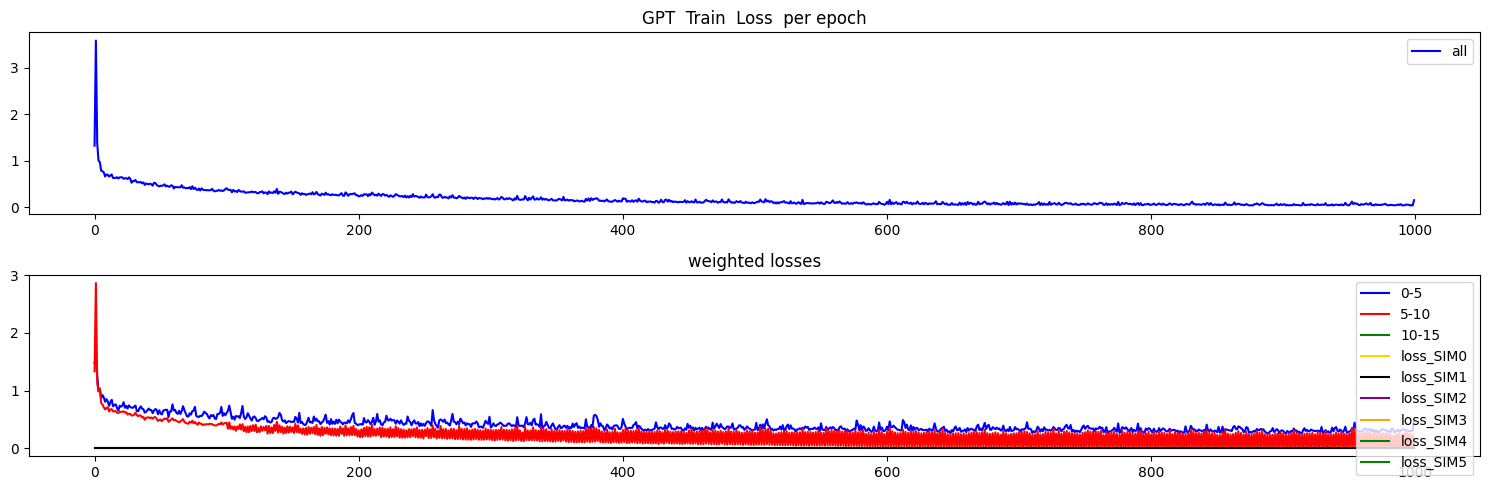

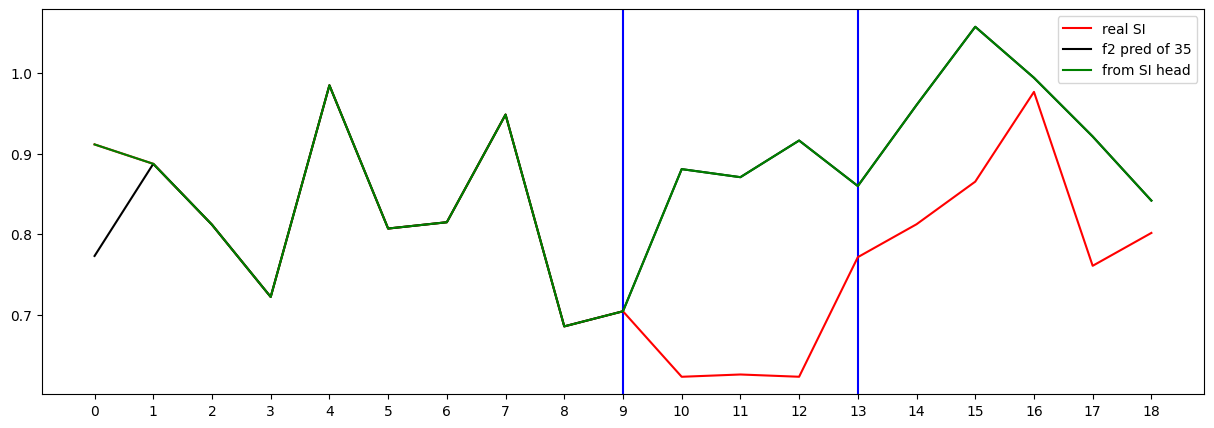

Testing R**2 - (all) - (no inputs):  0.9954888542823547
Testing R**2 - (f2) - SI full (no inputs):  -1.1372995546705074
Testing R**2 - SI head only (no inputs):  -1.1372995546705074
0 ...index R**2 (no inputs):  -0.05800177887748892
1 ...index R**2 (no inputs):  -0.08262025098519765
2 ...index R**2 (no inputs):  -1.1372995546705074
3 ...index R**2 (no inputs):  -23.002293985565313
4 ...index R**2 (no inputs):  -10.623758155971402
5 ...index R**2 (no inputs):  -1487.1250415653578
6 ...index R**2 (no inputs):  -0.14728646593957806
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5492875825791468
10 ...index R**2 (no inputs):  -1.3186371878576444
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2505644127738975
16 ...index R**2 (no inputs):  -30.44703536154515
17 ...index R**2 (no inputs):  -1260.6856000879816
18 .

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to1000_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to1000_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to1000.append( res_real )
all_pred_si_000to1000.append( res_pred )



## Run 3


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, chunk000to500_train, chunk000to1000_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.263836
Loss_SI: 1.3665372133255005 Loss_all: 1.2710424661636353
===
[100] Train Loss: 0.185854
Loss_SI: 0.33095550537109375 Loss_all: 0.38763731718063354
===
[200] Train Loss: 0.056097
Loss_SI: 0.21437807381153107 Loss_all: 0.2450866401195526
===
[300] Train Loss: 0.023181
Loss_SI: 0.14439859986305237 Loss_all: 0.20824724435806274
===
[400] Train Loss: 0.019465
Loss_SI: 0.13922281563282013 Loss_all: 0.20226551592350006
===
[500] Train Loss: 0.021546
Loss_SI: 0.11483941227197647 Loss_all: 0.2112453728914261
===
[600] Train Loss: 0.015580
Loss_SI: 0.1492556631565094 Loss_all: 0.1974271535873413
===
[700] Train Loss: 0.014580
Loss_SI: 0.15637247264385223 Loss_all: 0.19374603033065796
===
[800] Train Loss: 0.014390
Loss_SI: 0.12041404098272324 Loss_all: 0.16560859978199005
===
[900] Train Loss: 0.014929
Loss_SI: 0.18310722708702087 Loss_all: 0.17771755158901215
===


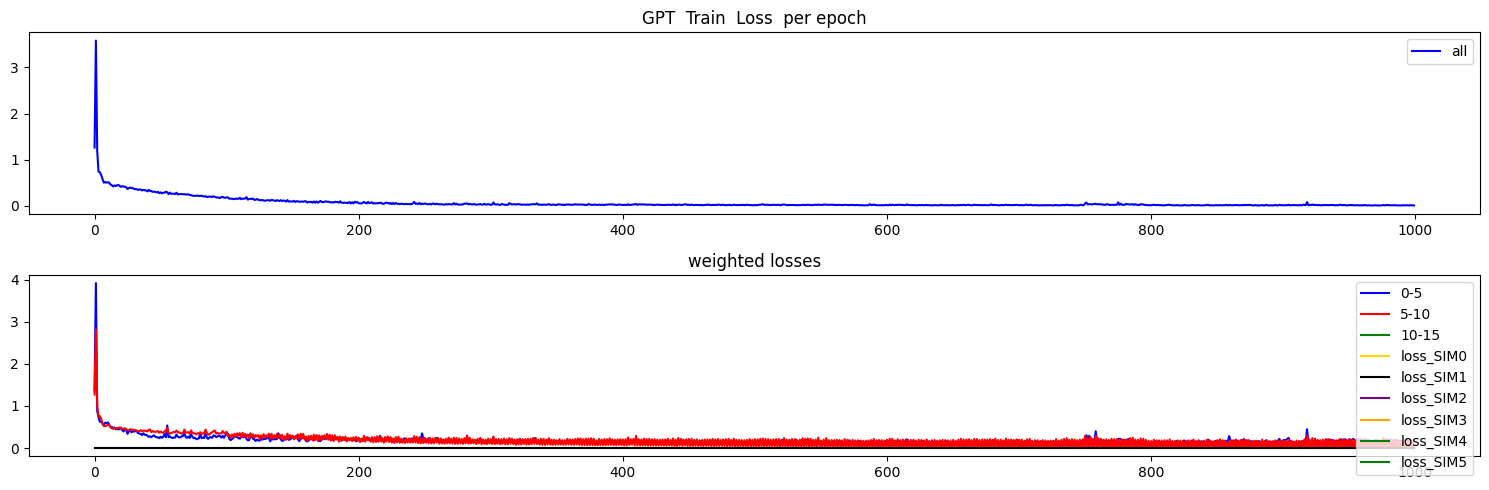

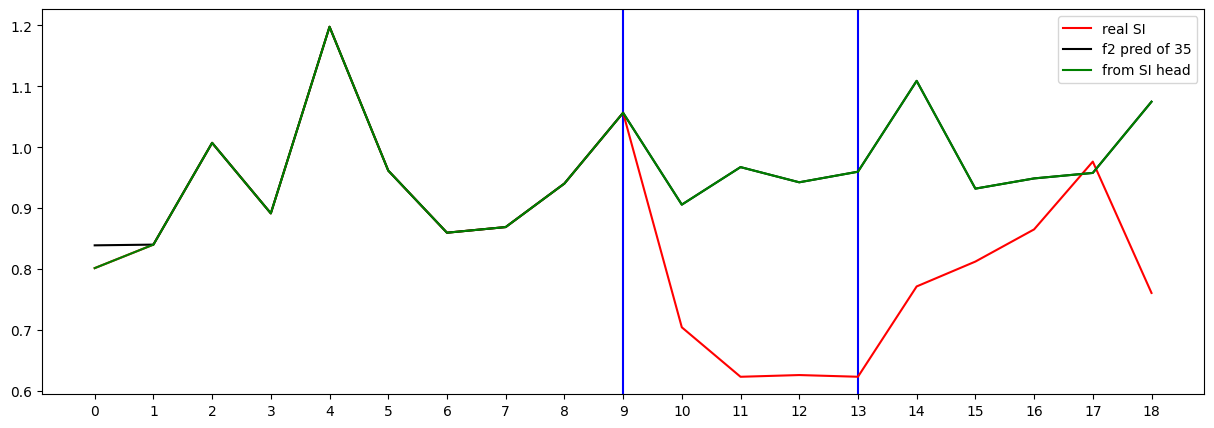

Testing R**2 - (all) - (no inputs):  0.9713620696985469
Testing R**2 - (f2) - SI full (no inputs):  -3.5873108417405764
Testing R**2 - SI head only (no inputs):  -3.5873108417405764
0 ...index R**2 (no inputs):  -0.3415836349898429
1 ...index R**2 (no inputs):  -1.3679311398528284
2 ...index R**2 (no inputs):  -3.5873108417405764
3 ...index R**2 (no inputs):  -120.39677711475487
4 ...index R**2 (no inputs):  -24.736144059207405
5 ...index R**2 (no inputs):  -1261.8241396093938
6 ...index R**2 (no inputs):  -0.21496378398088423
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5503736396734262
10 ...index R**2 (no inputs):  -0.7472841349244117
11 ...index R**2 (no inputs):  -1053.3380660658402
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -40.33679354854808
16 ...index R**2 (no inputs):  -0.6269379106441901
17 ...index R**2 (no inputs):  -158135.40

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.248809
Loss_SI: 1.2598457336425781 Loss_all: 1.2267826795578003
===
[100] Train Loss: 0.223277
Loss_SI: 0.2169875204563141 Loss_all: 0.273661732673645
===
[200] Train Loss: 0.107346
Loss_SI: 0.19466733932495117 Loss_all: 0.26121044158935547
===
[300] Train Loss: 0.066233
Loss_SI: 0.18608365952968597 Loss_all: 0.24030600488185883
===
[400] Train Loss: 0.035325
Loss_SI: 0.17759950459003448 Loss_all: 0.21465055644512177
===
[500] Train Loss: 0.032267
Loss_SI: 0.22852464020252228 Loss_all: 0.2606576383113861
===
[600] Train Loss: 0.022048
Loss_SI: 0.14080631732940674 Loss_all: 0.18410338461399078
===
[700] Train Loss: 0.023276
Loss_SI: 0.13852010667324066 Loss_all: 0.2027520090341568
===
[800] Train Loss: 0.019251
Loss_SI: 0.14714789390563965 Loss_all: 0.1877077966928482
===
[900] Train Loss: 0.028244
Loss_SI: 0.1738004982471466 Loss_all: 0.2151930034160614
===


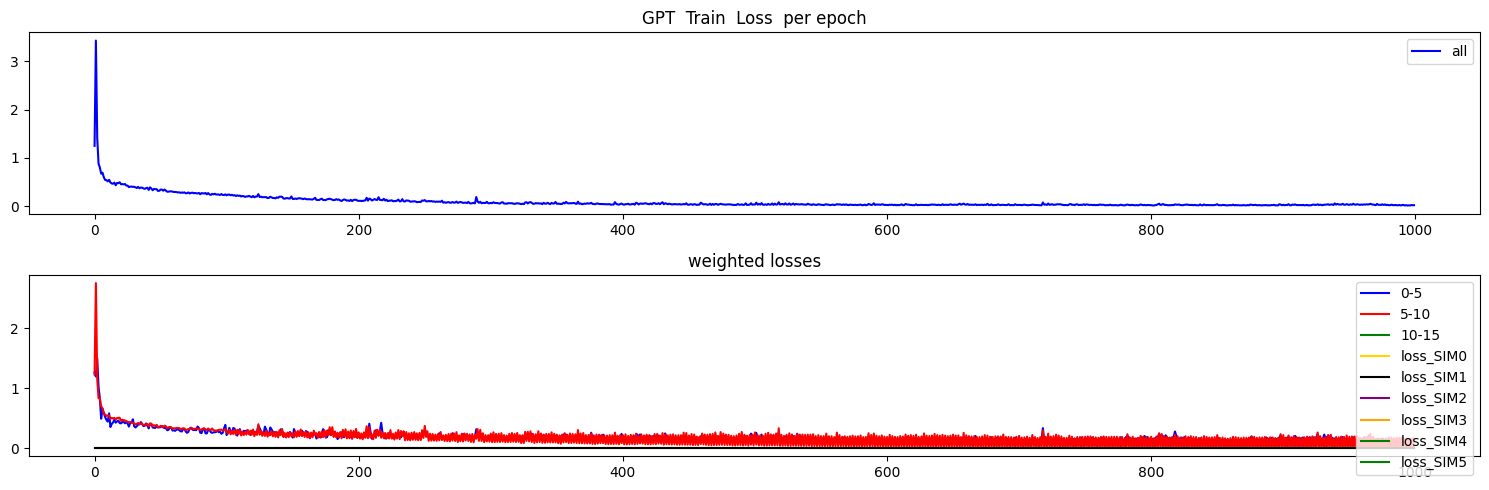

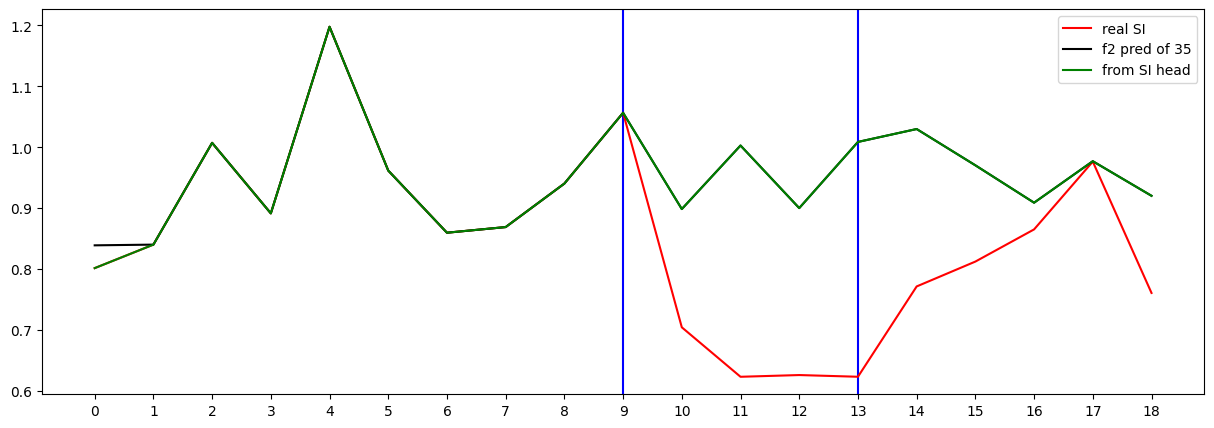

Testing R**2 - (all) - (no inputs):  0.9621630533730746
Testing R**2 - (f2) - SI full (no inputs):  -3.0281421504330295
Testing R**2 - SI head only (no inputs):  -3.0281421504330295
0 ...index R**2 (no inputs):  -0.6831440725301821
1 ...index R**2 (no inputs):  -0.2958933504121317
2 ...index R**2 (no inputs):  -3.0281421504330295
3 ...index R**2 (no inputs):  -151.09328447142153
4 ...index R**2 (no inputs):  -7.96973138010582
5 ...index R**2 (no inputs):  -2134.586057852035
6 ...index R**2 (no inputs):  -0.5932853346257276
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.40985974528914615
10 ...index R**2 (no inputs):  -1.205056665716386
11 ...index R**2 (no inputs):  -1272.6981501249268
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -44.29309311572986
16 ...index R**2 (no inputs):  -0.3789503523402291
17 ...index R**2 (no inputs):  -144656.458182

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.386210
Loss_SI: 1.4808458089828491 Loss_all: 1.355195164680481
===
[100] Train Loss: 0.253367
Loss_SI: 0.27056509256362915 Loss_all: 0.2862298786640167
===
[200] Train Loss: 0.149469
Loss_SI: 0.20190976560115814 Loss_all: 0.22701513767242432
===
[300] Train Loss: 0.112112
Loss_SI: 0.24654045701026917 Loss_all: 0.25861844420433044
===
[400] Train Loss: 0.071258
Loss_SI: 0.15846958756446838 Loss_all: 0.22205226123332977
===
[500] Train Loss: 0.066232
Loss_SI: 0.1902083158493042 Loss_all: 0.23293247818946838
===
[600] Train Loss: 0.034382
Loss_SI: 0.16947896778583527 Loss_all: 0.1732482612133026
===
[700] Train Loss: 0.051179
Loss_SI: 0.15482784807682037 Loss_all: 0.19722874462604523
===
[800] Train Loss: 0.024726
Loss_SI: 0.13732405006885529 Loss_all: 0.17265217006206512
===
[900] Train Loss: 0.034399
Loss_SI: 0.19747188687324524 Loss_all: 0.1997063308954239
===


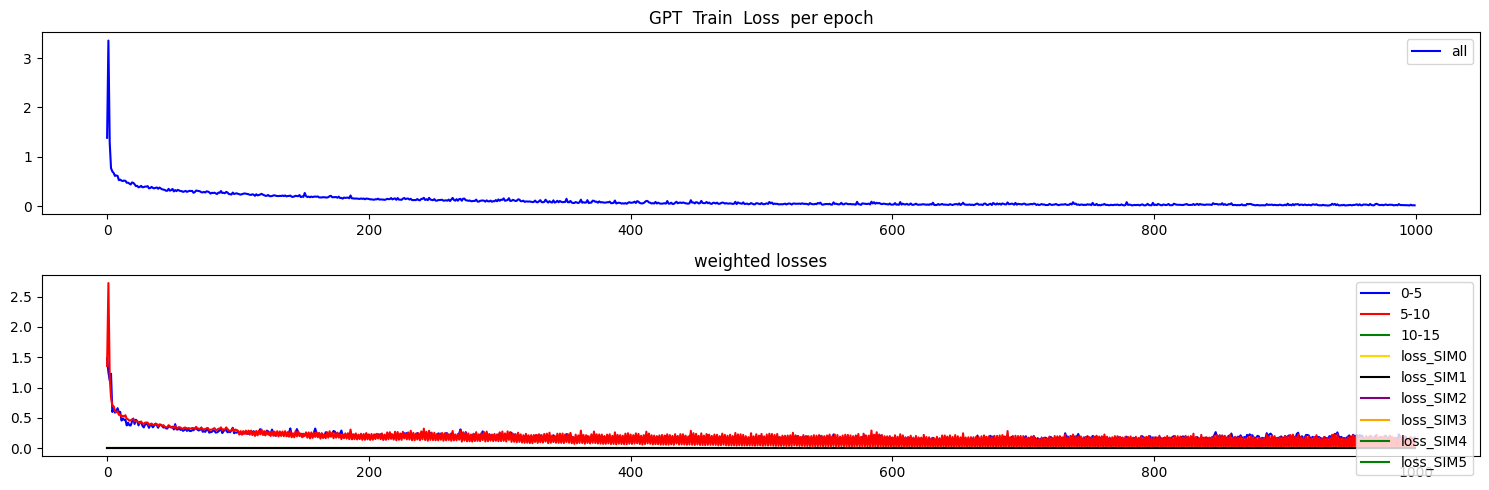

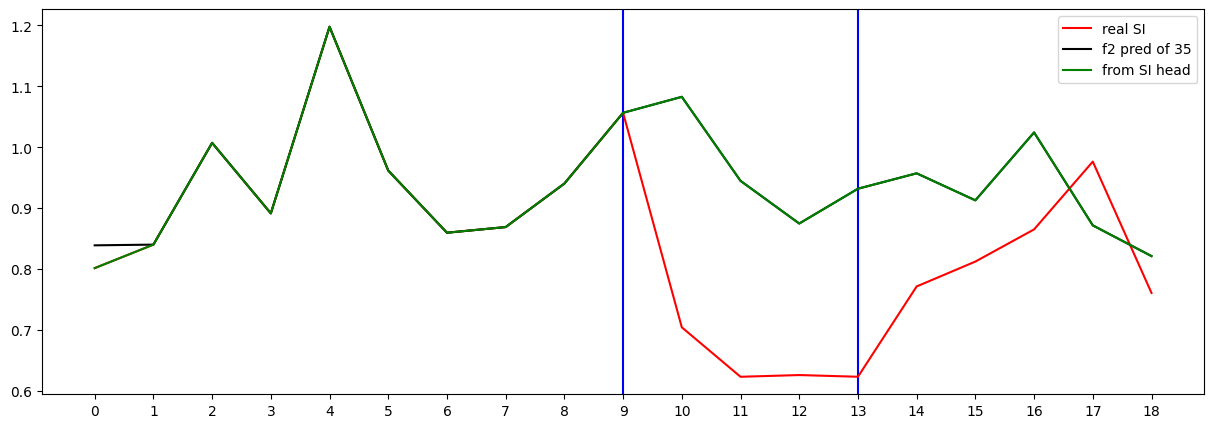

Testing R**2 - (all) - (no inputs):  0.947394414365637
Testing R**2 - (f2) - SI full (no inputs):  -2.7355994236828853
Testing R**2 - SI head only (no inputs):  -2.7355994236828853
0 ...index R**2 (no inputs):  0.23837728824542725
1 ...index R**2 (no inputs):  -0.4928040615528144
2 ...index R**2 (no inputs):  -2.7355994236828853
3 ...index R**2 (no inputs):  -161.020960249714
4 ...index R**2 (no inputs):  -1.4229205484395493
5 ...index R**2 (no inputs):  -3408.236451547855
6 ...index R**2 (no inputs):  -0.1477257839732753
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2937768294312861
10 ...index R**2 (no inputs):  -3.714032366275787
11 ...index R**2 (no inputs):  -1071.0826419415953
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -47.01361691968799
16 ...index R**2 (no inputs):  -0.1661342301040838
17 ...index R**2 (no inputs):  -140438.66355123

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.308002
Loss_SI: 1.2172781229019165 Loss_all: 1.3356950283050537
===
[100] Train Loss: 0.296808
Loss_SI: 0.2860940098762512 Loss_all: 0.34238991141319275
===
[200] Train Loss: 0.200895
Loss_SI: 0.24142344295978546 Loss_all: 0.3006105422973633
===
[300] Train Loss: 0.107044
Loss_SI: 0.1803179681301117 Loss_all: 0.23017892241477966
===
[400] Train Loss: 0.070304
Loss_SI: 0.1571357548236847 Loss_all: 0.21535997092723846
===
[500] Train Loss: 0.054383
Loss_SI: 0.1596887856721878 Loss_all: 0.20533037185668945
===
[600] Train Loss: 0.069055
Loss_SI: 0.20437128841876984 Loss_all: 0.21119825541973114
===
[700] Train Loss: 0.032087
Loss_SI: 0.14806018769741058 Loss_all: 0.16562938690185547
===
[800] Train Loss: 0.053314
Loss_SI: 0.1993066966533661 Loss_all: 0.2489606738090515
===
[900] Train Loss: 0.025925
Loss_SI: 0.14350800216197968 Loss_all: 0.17036212980747223
===


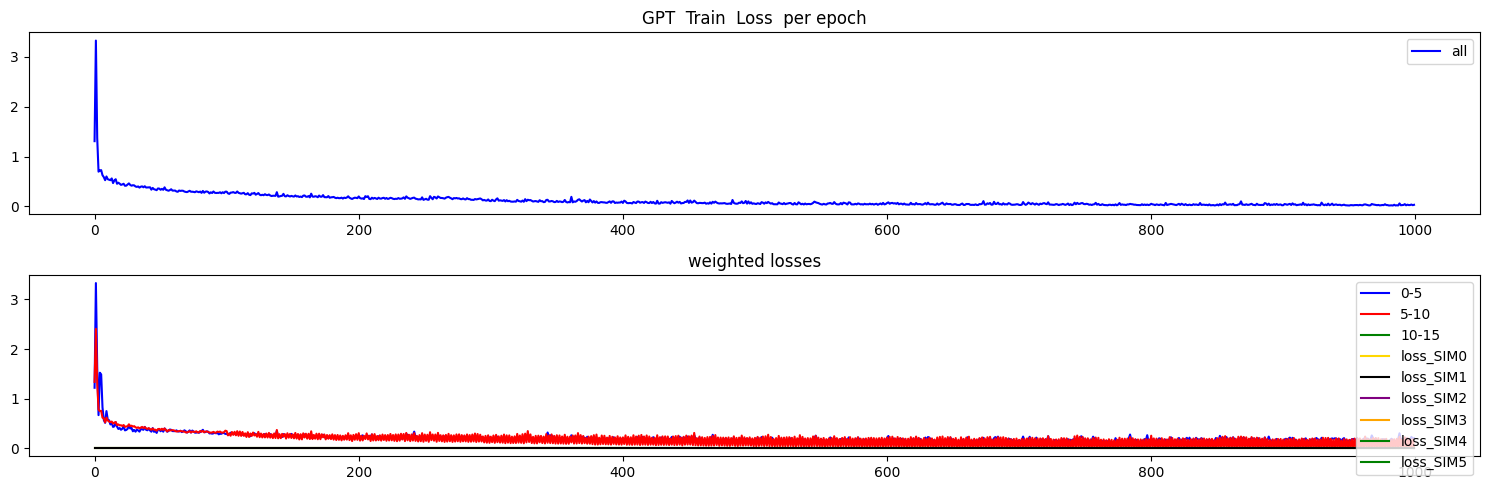

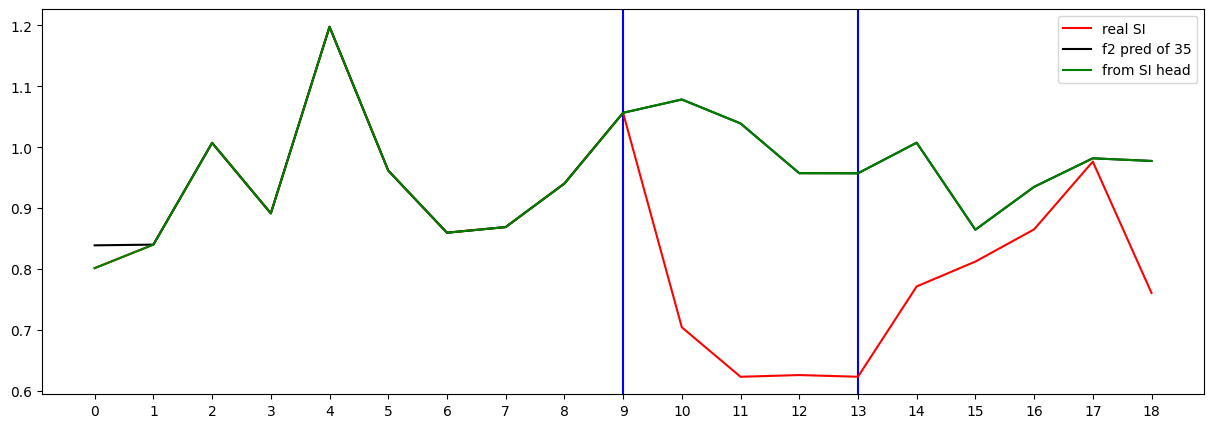

Testing R**2 - (all) - (no inputs):  0.9611484463152276
Testing R**2 - (f2) - SI full (no inputs):  -4.46292368273173
Testing R**2 - SI head only (no inputs):  -4.46292368273173
0 ...index R**2 (no inputs):  -0.6260148589283261
1 ...index R**2 (no inputs):  -1.6377846829205533
2 ...index R**2 (no inputs):  -4.46292368273173
3 ...index R**2 (no inputs):  -144.70695179755552
4 ...index R**2 (no inputs):  -5.968434284928417
5 ...index R**2 (no inputs):  -2142.7078282240727
6 ...index R**2 (no inputs):  -0.06540493372930078
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2651997367851107
10 ...index R**2 (no inputs):  -5.333376463651657
11 ...index R**2 (no inputs):  -1061.2911974823178
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -38.108856738889486
16 ...index R**2 (no inputs):  -0.030537710261840267
17 ...index R**2 (no inputs):  -155796.2317027

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )

[0] Train Loss: 1.434888
Loss_SI: 1.6191720962524414 Loss_all: 1.3116772174835205
===
[100] Train Loss: 0.334920
Loss_SI: 0.4578706920146942 Loss_all: 0.39627110958099365
===
[200] Train Loss: 0.234433
Loss_SI: 0.43167734146118164 Loss_all: 0.43924829363822937
===
[300] Train Loss: 0.142766
Loss_SI: 0.31823915243148804 Loss_all: 0.3616590201854706
===
[400] Train Loss: 0.085586
Loss_SI: 0.30737462639808655 Loss_all: 0.35827022790908813
===
[500] Train Loss: 0.048549
Loss_SI: 0.24800215661525726 Loss_all: 0.26645874977111816
===
[600] Train Loss: 0.035591
Loss_SI: 0.2900784909725189 Loss_all: 0.24341323971748352
===
[700] Train Loss: 0.035767
Loss_SI: 0.26958876848220825 Loss_all: 0.2834675908088684
===
[800] Train Loss: 0.032747
Loss_SI: 0.24251647293567657 Loss_all: 0.23330160975456238
===
[900] Train Loss: 0.035550
Loss_SI: 0.23474951088428497 Loss_all: 0.24565868079662323
===


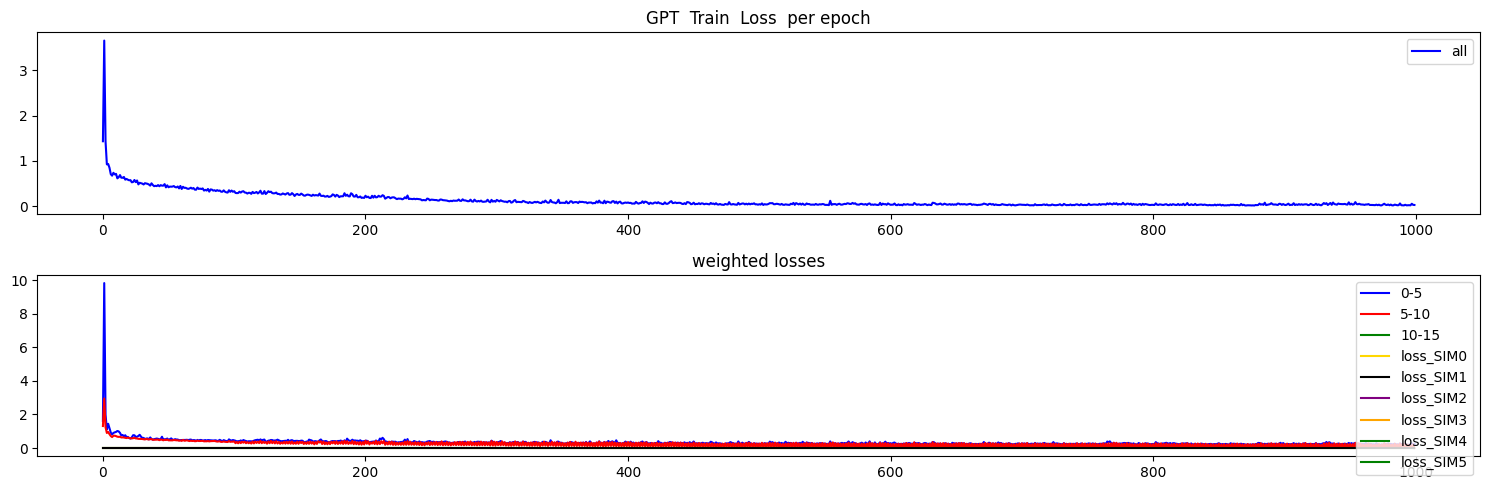

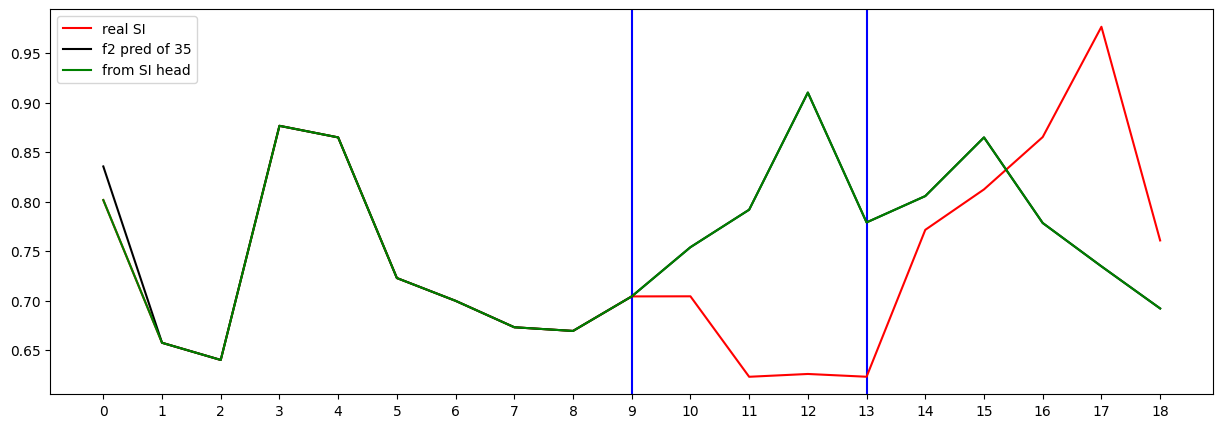

Testing R**2 - (all) - (no inputs):  0.9991042698229687
Testing R**2 - (f2) - SI full (no inputs):  -0.5177673515134769
Testing R**2 - SI head only (no inputs):  -0.5177673515134769
0 ...index R**2 (no inputs):  -0.606789898526823
1 ...index R**2 (no inputs):  -1.743589726769307
2 ...index R**2 (no inputs):  -0.5177673515134769
3 ...index R**2 (no inputs):  -6.55271910082848
4 ...index R**2 (no inputs):  -3.2770117137838994
5 ...index R**2 (no inputs):  -68.08465580994472
6 ...index R**2 (no inputs):  -0.04364514758330551
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3326348464814999
10 ...index R**2 (no inputs):  -2.012209333777428
11 ...index R**2 (no inputs):  -174.74079012225602
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8618682807409765
16 ...index R**2 (no inputs):  -1.105275468043199
17 ...index R**2 (no inputs):  -522.44346916787

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )


[0] Train Loss: 1.321364
Loss_SI: 1.2314484119415283 Loss_all: 1.3769328594207764
===
[100] Train Loss: 0.348863
Loss_SI: 0.5113090872764587 Loss_all: 0.39659395813941956
===
[200] Train Loss: 0.244212
Loss_SI: 0.4518081247806549 Loss_all: 0.33135536313056946
===
[300] Train Loss: 0.191205
Loss_SI: 0.3556506037712097 Loss_all: 0.2855253219604492
===
[400] Train Loss: 0.145051
Loss_SI: 0.35847997665405273 Loss_all: 0.29461193084716797
===
[500] Train Loss: 0.111474
Loss_SI: 0.3092799782752991 Loss_all: 0.29567965865135193
===
[600] Train Loss: 0.075123
Loss_SI: 0.27839112281799316 Loss_all: 0.24742008745670319
===
[700] Train Loss: 0.092414
Loss_SI: 0.3214032053947449 Loss_all: 0.28191736340522766
===
[800] Train Loss: 0.053683
Loss_SI: 0.2967652678489685 Loss_all: 0.23582406342029572
===
[900] Train Loss: 0.043970
Loss_SI: 0.286179780960083 Loss_all: 0.229955792427063
===


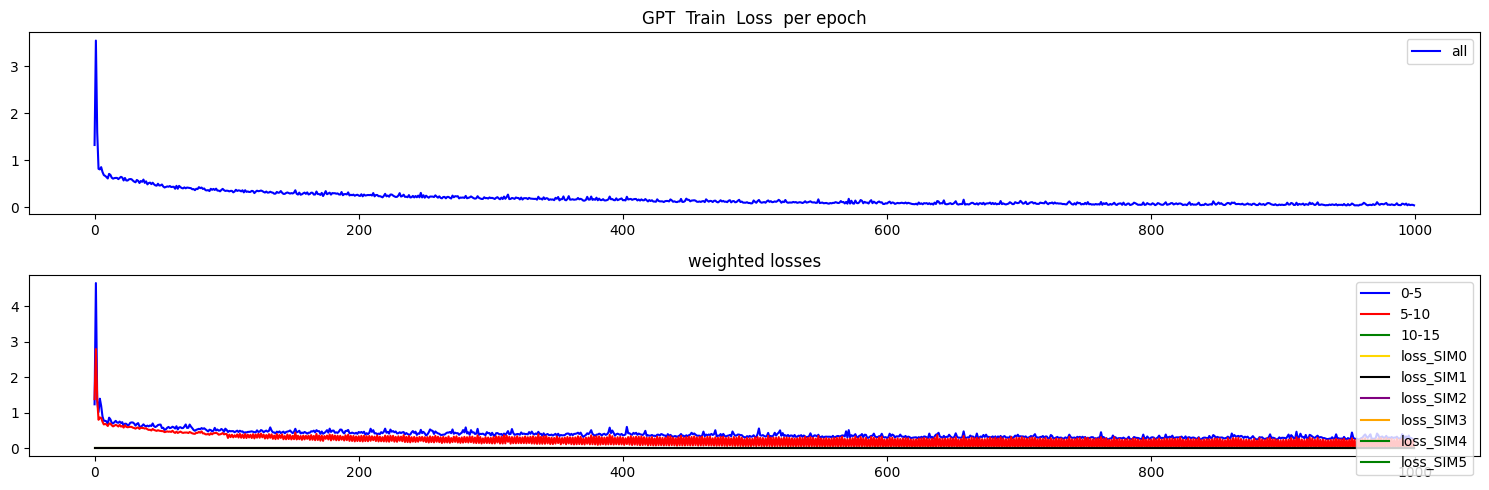

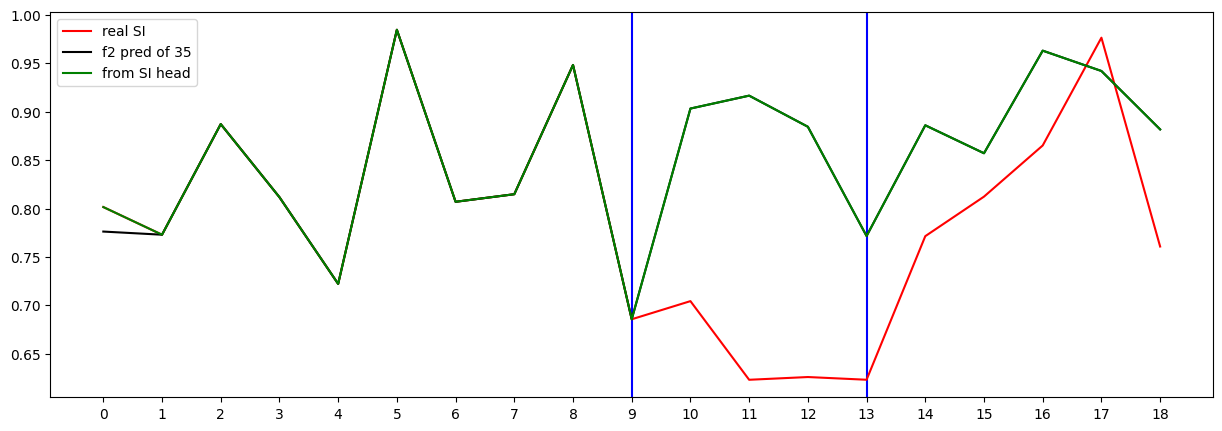

Testing R**2 - (all) - (no inputs):  0.9970080164974623
Testing R**2 - (f2) - SI full (no inputs):  -1.3430330780208664
Testing R**2 - SI head only (no inputs):  -1.3430330780208664
0 ...index R**2 (no inputs):  -1.1796805038538127
1 ...index R**2 (no inputs):  -1.0759303558857343
2 ...index R**2 (no inputs):  -1.3430330780208664
3 ...index R**2 (no inputs):  -6.850020059150435
4 ...index R**2 (no inputs):  -4.770562241637857
5 ...index R**2 (no inputs):  -212.07229920142257
6 ...index R**2 (no inputs):  -0.9648752107278067
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9485938694347649
10 ...index R**2 (no inputs):  -3.935881773307919
11 ...index R**2 (no inputs):  -101.05558908177017
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.3744433047036362
16 ...index R**2 (no inputs):  -3.7146457518715534
17 ...index R**2 (no inputs):  -5101.53851890

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to1000_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to1000_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to1000.append( res_real )
all_pred_si_000to1000.append( res_pred )



## Run 4


In [46]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, chunk000to500_train, chunk000to1000_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.322868
Loss_SI: 1.3188012838363647 Loss_all: 1.2084267139434814
===
[100] Train Loss: 0.163801
Loss_SI: 0.5349540114402771 Loss_all: 0.5355914235115051
===
[200] Train Loss: 0.036608
Loss_SI: 0.36136314272880554 Loss_all: 0.401628315448761
===
[300] Train Loss: 0.032940
Loss_SI: 0.3958854675292969 Loss_all: 0.43349164724349976
===
[400] Train Loss: 0.020696
Loss_SI: 0.32600924372673035 Loss_all: 0.3754529654979706
===
[500] Train Loss: 0.014253
Loss_SI: 0.33341947197914124 Loss_all: 0.421402245759964
===
[600] Train Loss: 0.027823
Loss_SI: 0.49904319643974304 Loss_all: 0.45454031229019165
===
[700] Train Loss: 0.016704
Loss_SI: 0.3956935703754425 Loss_all: 0.3719891309738159
===
[800] Train Loss: 0.012636
Loss_SI: 0.40392667055130005 Loss_all: 0.3923695683479309
===
[900] Train Loss: 0.031506
Loss_SI: 0.47178640961647034 Loss_all: 0.41988131403923035
===


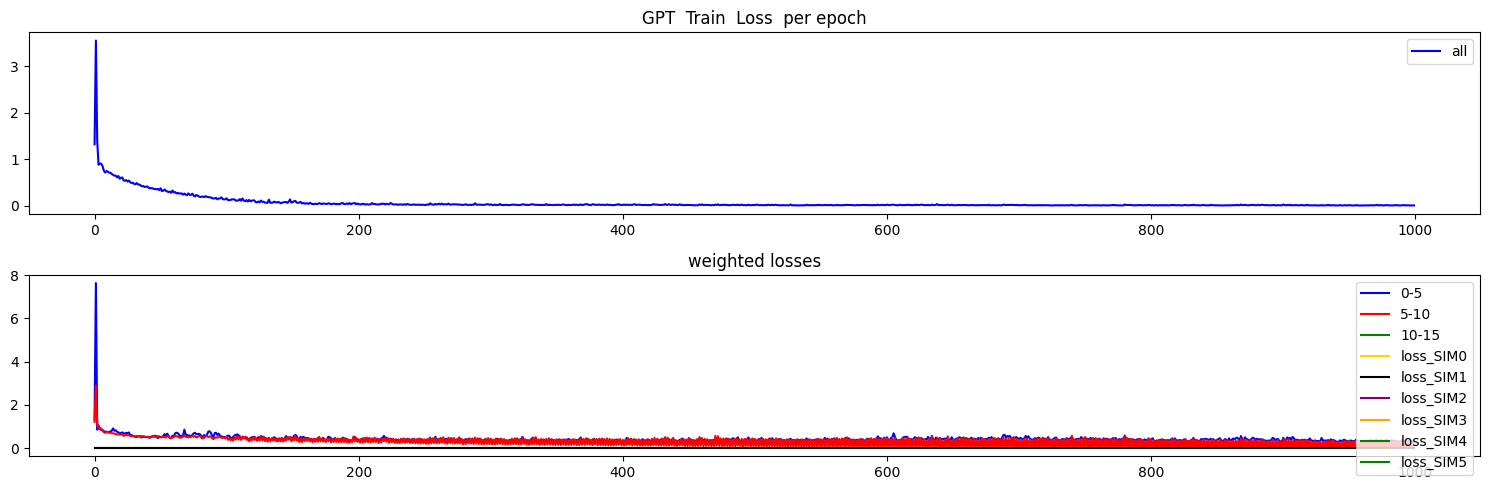

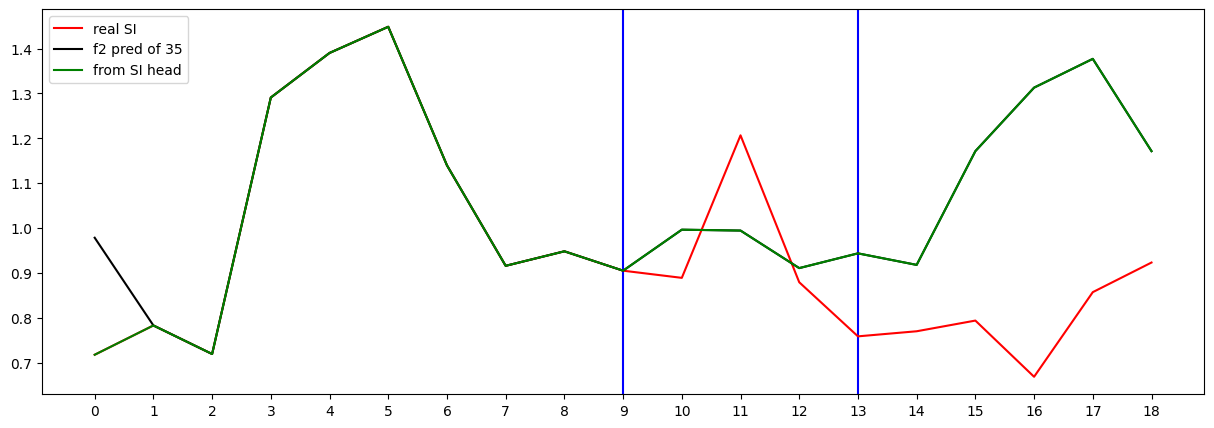

Testing R**2 - (all) - (no inputs):  0.9724757873649006
Testing R**2 - (f2) - SI full (no inputs):  -3.9640905563883466
Testing R**2 - SI head only (no inputs):  -3.9640905563883466
0 ...index R**2 (no inputs):  0.06647108633527132
1 ...index R**2 (no inputs):  -3.6479505460479134
2 ...index R**2 (no inputs):  -3.9640905563883466
3 ...index R**2 (no inputs):  0.11019241562137394
4 ...index R**2 (no inputs):  -7.516146591885347
5 ...index R**2 (no inputs):  -5.911291926088206
6 ...index R**2 (no inputs):  -759.4267209100453
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.38056052198528456
10 ...index R**2 (no inputs):  -2.009564987092599
11 ...index R**2 (no inputs):  -65.59318498914834
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.6743279946703975
16 ...index R**2 (no inputs):  -2.4480108487060006
17 ...index R**2 (no inputs):  -38576.2337779

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.314597
Loss_SI: 1.4743448495864868 Loss_all: 1.2691465616226196
===
[100] Train Loss: 0.249946
Loss_SI: 0.8611593246459961 Loss_all: 0.5158545970916748
===
[200] Train Loss: 0.047000
Loss_SI: 0.6105333566665649 Loss_all: 0.4150312542915344
===
[300] Train Loss: 0.070445
Loss_SI: 0.5385127067565918 Loss_all: 0.4421077072620392
===
[400] Train Loss: 0.033432
Loss_SI: 0.44850942492485046 Loss_all: 0.3985723853111267
===
[500] Train Loss: 0.035011
Loss_SI: 0.46002960205078125 Loss_all: 0.4378456175327301
===
[600] Train Loss: 0.028159
Loss_SI: 0.411457359790802 Loss_all: 0.3720051646232605
===
[700] Train Loss: 0.033507
Loss_SI: 0.5321233868598938 Loss_all: 0.37880823016166687
===
[800] Train Loss: 0.029494
Loss_SI: 0.4870595932006836 Loss_all: 0.48101508617401123
===
[900] Train Loss: 0.020645
Loss_SI: 0.4774266183376312 Loss_all: 0.4425272047519684
===


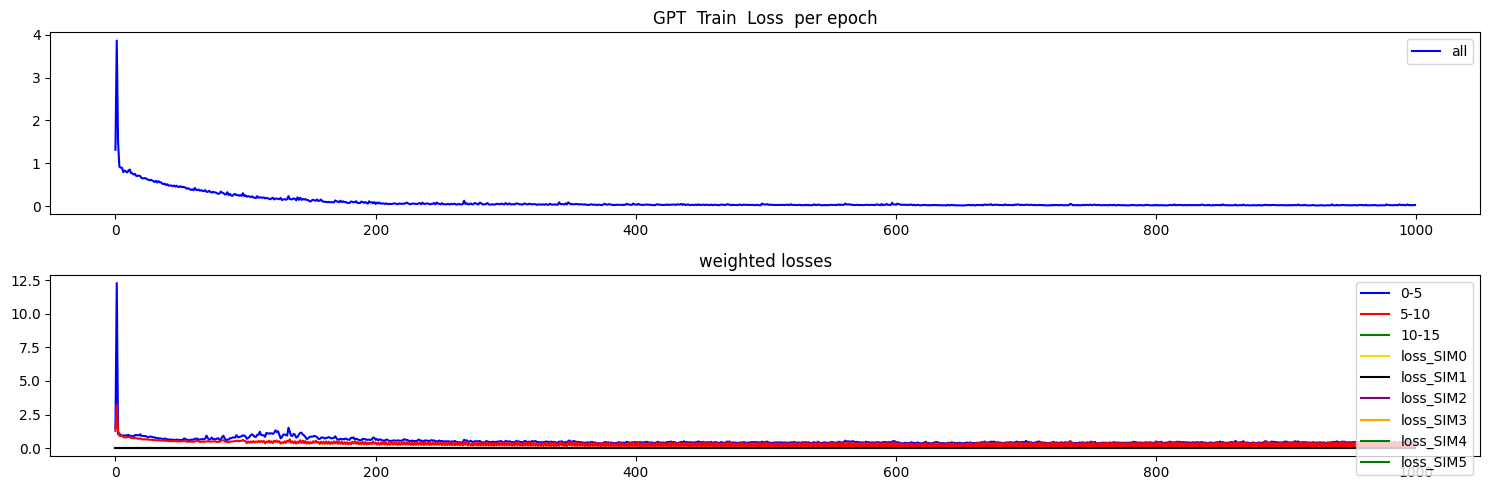

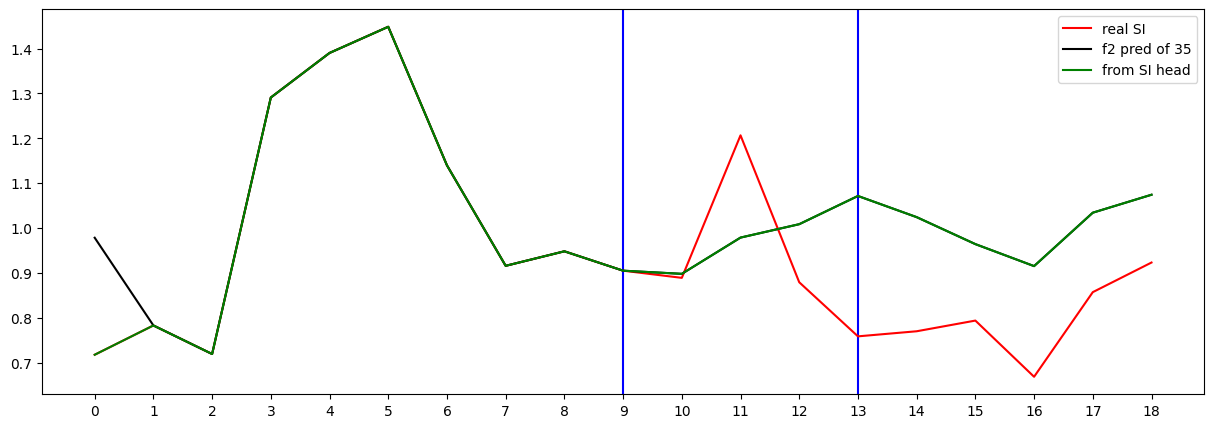

Testing R**2 - (all) - (no inputs):  0.9633795949005501
Testing R**2 - (f2) - SI full (no inputs):  -1.6941494071489682
Testing R**2 - SI head only (no inputs):  -1.6941494071489682
0 ...index R**2 (no inputs):  -0.19922047024172218
1 ...index R**2 (no inputs):  -1.2489234777125557
2 ...index R**2 (no inputs):  -1.6941494071489682
3 ...index R**2 (no inputs):  -0.36864313314700237
4 ...index R**2 (no inputs):  -6.1022159254832475
5 ...index R**2 (no inputs):  -8.348079569526783
6 ...index R**2 (no inputs):  -824.1632541254714
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3935785293328793
10 ...index R**2 (no inputs):  0.14128674063305402
11 ...index R**2 (no inputs):  -228.49764669804105
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.9553914191188
16 ...index R**2 (no inputs):  -1.5236089031303122
17 ...index R**2 (no inputs):  -43278.087754

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.172446
Loss_SI: 1.1999037265777588 Loss_all: 1.1574680805206299
===
[100] Train Loss: 0.330284
Loss_SI: 0.648707926273346 Loss_all: 0.47461503744125366
===
[200] Train Loss: 0.091265
Loss_SI: 0.4981367290019989 Loss_all: 0.35690298676490784
===
[300] Train Loss: 0.071692
Loss_SI: 0.43695035576820374 Loss_all: 0.4125872850418091
===
[400] Train Loss: 0.033641
Loss_SI: 0.34429606795310974 Loss_all: 0.35658738017082214
===
[500] Train Loss: 0.063202
Loss_SI: 0.4199538826942444 Loss_all: 0.44628068804740906
===
[600] Train Loss: 0.032119
Loss_SI: 0.34836846590042114 Loss_all: 0.4008170962333679
===
[700] Train Loss: 0.023227
Loss_SI: 0.30165815353393555 Loss_all: 0.34221890568733215
===
[800] Train Loss: 0.026519
Loss_SI: 0.3360430896282196 Loss_all: 0.34855416417121887
===
[900] Train Loss: 0.017501
Loss_SI: 0.3320658504962921 Loss_all: 0.32940366864204407
===


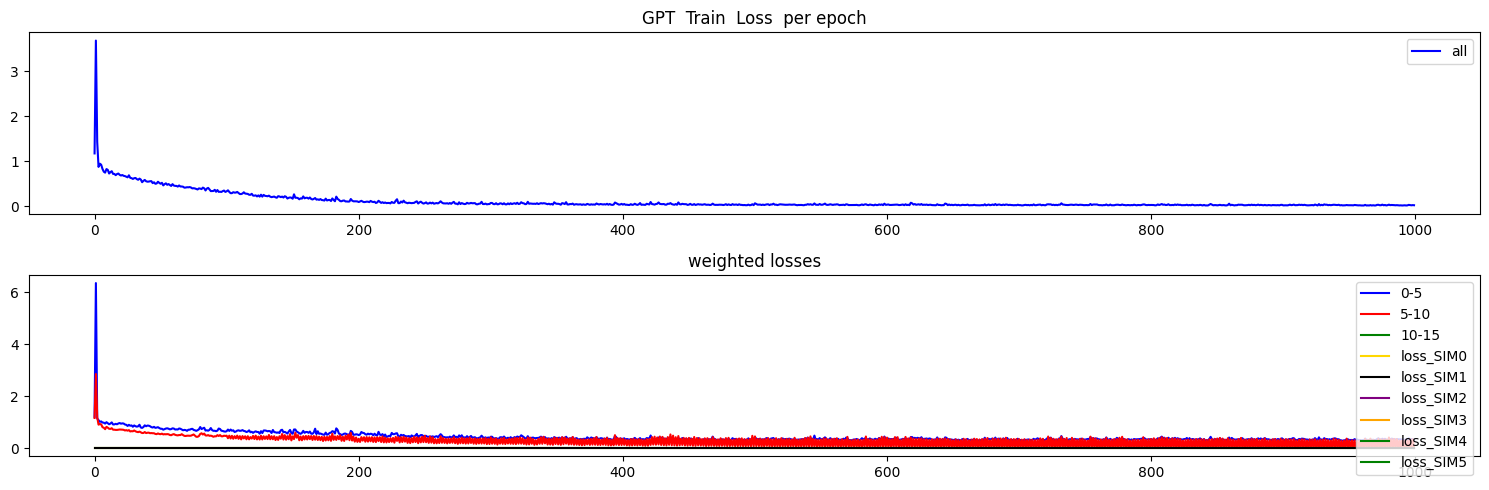

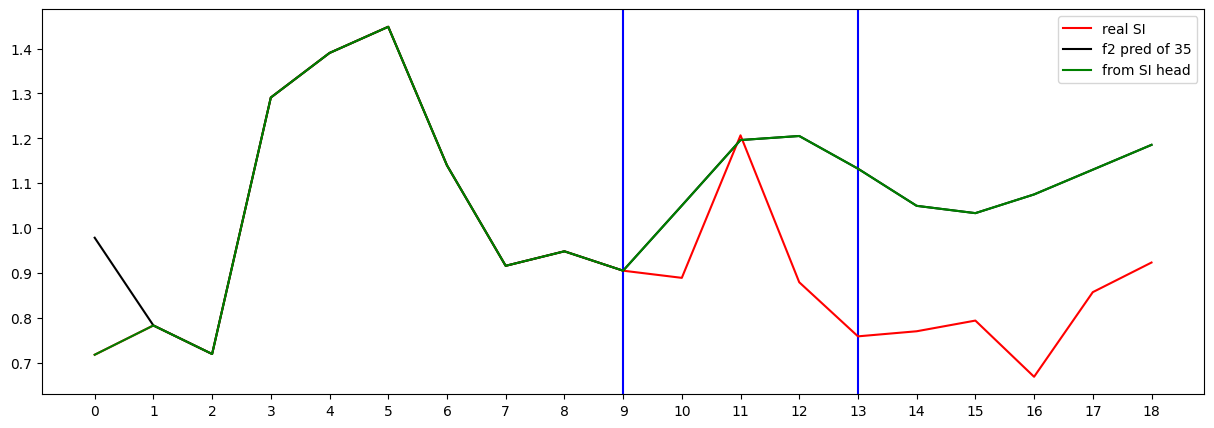

Testing R**2 - (all) - (no inputs):  0.9763047522192174
Testing R**2 - (f2) - SI full (no inputs):  -3.787011327419278
Testing R**2 - SI head only (no inputs):  -3.787011327419278
0 ...index R**2 (no inputs):  -0.04771615855994815
1 ...index R**2 (no inputs):  -4.8308419583629485
2 ...index R**2 (no inputs):  -3.787011327419278
3 ...index R**2 (no inputs):  -0.8525351487795794
4 ...index R**2 (no inputs):  -3.925782893971041
5 ...index R**2 (no inputs):  -4.976881293736018
6 ...index R**2 (no inputs):  -1074.55842512825
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.15440873779816822
10 ...index R**2 (no inputs):  -0.39354517307615344
11 ...index R**2 (no inputs):  -26.978744154331952
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.646890352578873
16 ...index R**2 (no inputs):  -0.6735864939797045
17 ...index R**2 (no inputs):  -31564.32547036

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.228903
Loss_SI: 1.2220889329910278 Loss_all: 1.325223684310913
===
[100] Train Loss: 0.322134
Loss_SI: 0.7758609652519226 Loss_all: 0.4173511266708374
===
[200] Train Loss: 0.141753
Loss_SI: 0.6766536235809326 Loss_all: 0.39201244711875916
===
[300] Train Loss: 0.061621
Loss_SI: 0.5554050803184509 Loss_all: 0.3366878926753998
===
[400] Train Loss: 0.050415
Loss_SI: 0.4081845283508301 Loss_all: 0.2720582187175751
===
[500] Train Loss: 0.061112
Loss_SI: 0.41084572672843933 Loss_all: 0.28829526901245117
===
[600] Train Loss: 0.027972
Loss_SI: 0.33524957299232483 Loss_all: 0.23670423030853271
===
[700] Train Loss: 0.028577
Loss_SI: 0.3376396596431732 Loss_all: 0.2608984410762787
===
[800] Train Loss: 0.025049
Loss_SI: 0.32150405645370483 Loss_all: 0.22407212853431702
===
[900] Train Loss: 0.032130
Loss_SI: 0.2994653880596161 Loss_all: 0.2192031443119049
===


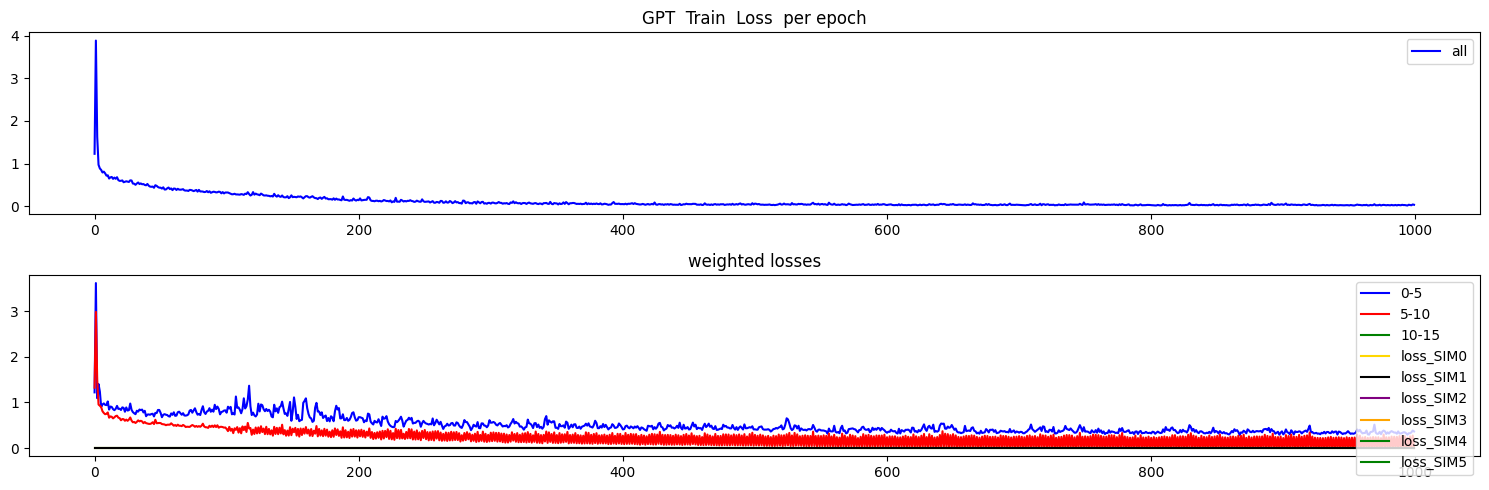

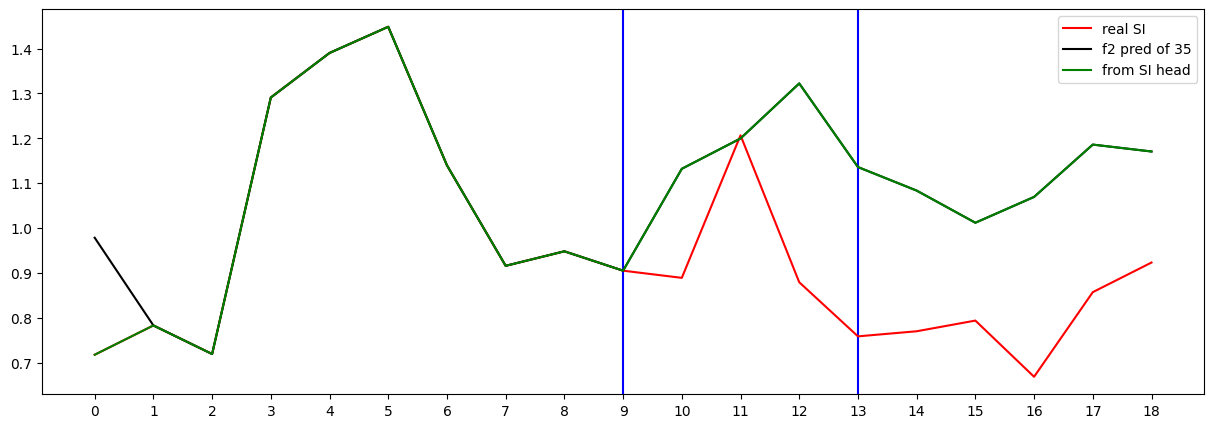

Testing R**2 - (all) - (no inputs):  0.9425465252929891
Testing R**2 - (f2) - SI full (no inputs):  -4.3729003747595545
Testing R**2 - SI head only (no inputs):  -4.3729003747595545
0 ...index R**2 (no inputs):  -0.10029921727657665
1 ...index R**2 (no inputs):  -5.51221549013207
2 ...index R**2 (no inputs):  -4.3729003747595545
3 ...index R**2 (no inputs):  0.4289822677277869
4 ...index R**2 (no inputs):  -3.489563141544961
5 ...index R**2 (no inputs):  -14.142962819430588
6 ...index R**2 (no inputs):  -1060.8051701857476
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1357396361562082
10 ...index R**2 (no inputs):  -0.2014105197484648
11 ...index R**2 (no inputs):  -341.02923160020345
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.697417421098066
16 ...index R**2 (no inputs):  -1.6798264777747831
17 ...index R**2 (no inputs):  -42908.6025925

In [50]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )

[0] Train Loss: 1.243208
Loss_SI: 1.8268264532089233 Loss_all: 1.2710527181625366
===
[100] Train Loss: 0.335399
Loss_SI: 0.4406285285949707 Loss_all: 0.41637083888053894
===
[200] Train Loss: 0.216502
Loss_SI: 0.4460713565349579 Loss_all: 0.3716610372066498
===
[300] Train Loss: 0.108725
Loss_SI: 0.369354784488678 Loss_all: 0.32197192311286926
===
[400] Train Loss: 0.068315
Loss_SI: 0.28837132453918457 Loss_all: 0.2775373160839081
===
[500] Train Loss: 0.058051
Loss_SI: 0.2721957564353943 Loss_all: 0.26189354062080383
===
[600] Train Loss: 0.056554
Loss_SI: 0.28708475828170776 Loss_all: 0.29228249192237854
===
[700] Train Loss: 0.029944
Loss_SI: 0.27390608191490173 Loss_all: 0.2307448834180832
===
[800] Train Loss: 0.029571
Loss_SI: 0.242598295211792 Loss_all: 0.23899640142917633
===
[900] Train Loss: 0.064329
Loss_SI: 0.3430147171020508 Loss_all: 0.2503507435321808
===


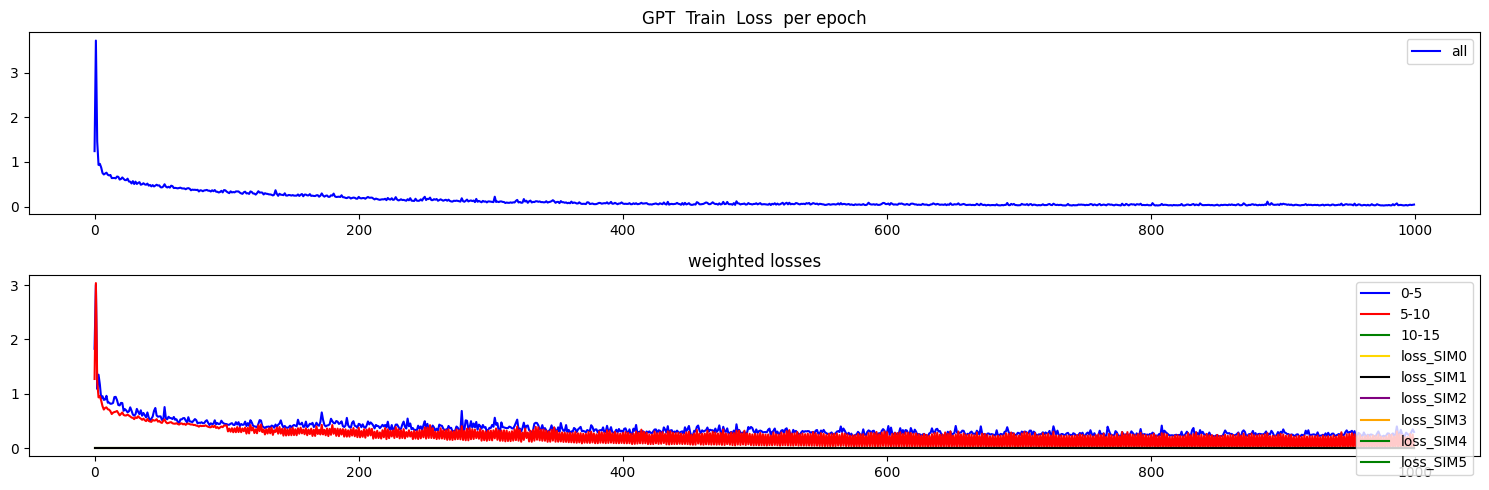

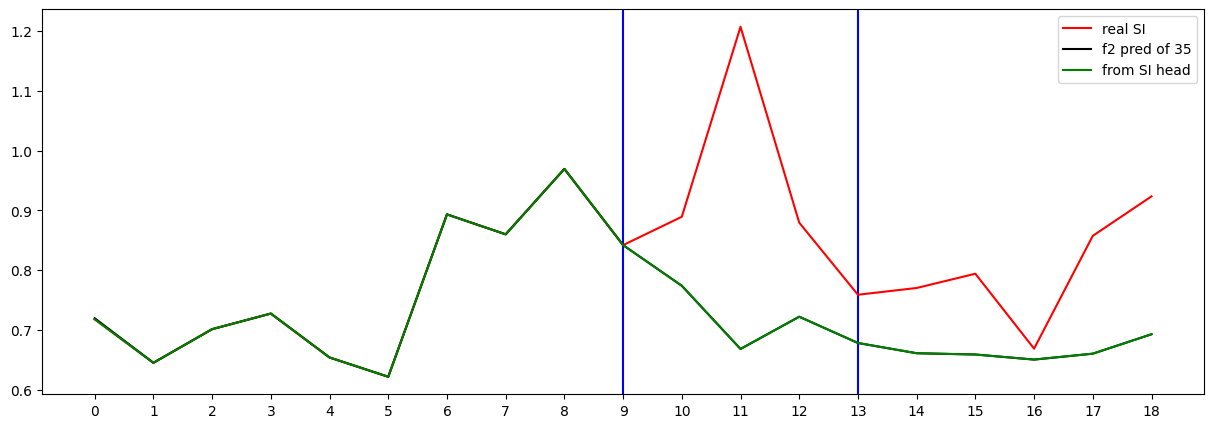

Testing R**2 - (all) - (no inputs):  0.9648743634570449
Testing R**2 - (f2) - SI full (no inputs):  -0.8502456358762538
Testing R**2 - SI head only (no inputs):  -0.8502456358762538
0 ...index R**2 (no inputs):  -0.1505647370909211
1 ...index R**2 (no inputs):  -1.8907830026869195
2 ...index R**2 (no inputs):  -0.8502456358762538
3 ...index R**2 (no inputs):  -8.19064837174628
4 ...index R**2 (no inputs):  -2.8603431444766634
5 ...index R**2 (no inputs):  -8.730275893397321
6 ...index R**2 (no inputs):  -13.167202204536126
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4493798090213865
10 ...index R**2 (no inputs):  -0.4488611996648413
11 ...index R**2 (no inputs):  -522.2955087623806
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.416802601746226
16 ...index R**2 (no inputs):  -6.513295894515712
17 ...index R**2 (no inputs):  -1217.4921690358

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to500_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )


[0] Train Loss: 1.255859
Loss_SI: 1.4128727912902832 Loss_all: 1.253052830696106
===
[100] Train Loss: 0.347273
Loss_SI: 0.5067868232727051 Loss_all: 0.4098004996776581
===
[200] Train Loss: 0.253434
Loss_SI: 0.5089322924613953 Loss_all: 0.3589395582675934
===
[300] Train Loss: 0.214092
Loss_SI: 0.5998802185058594 Loss_all: 0.3857022523880005
===
[400] Train Loss: 0.137323
Loss_SI: 0.5894083380699158 Loss_all: 0.33029884099960327
===
[500] Train Loss: 0.082571
Loss_SI: 0.46951866149902344 Loss_all: 0.31557267904281616
===
[600] Train Loss: 0.076687
Loss_SI: 0.39169374108314514 Loss_all: 0.30668124556541443
===
[700] Train Loss: 0.063930
Loss_SI: 0.4285512864589691 Loss_all: 0.2870134711265564
===
[800] Train Loss: 0.056715
Loss_SI: 0.3647666871547699 Loss_all: 0.27300041913986206
===
[900] Train Loss: 0.091620
Loss_SI: 0.42791447043418884 Loss_all: 0.3638770878314972
===


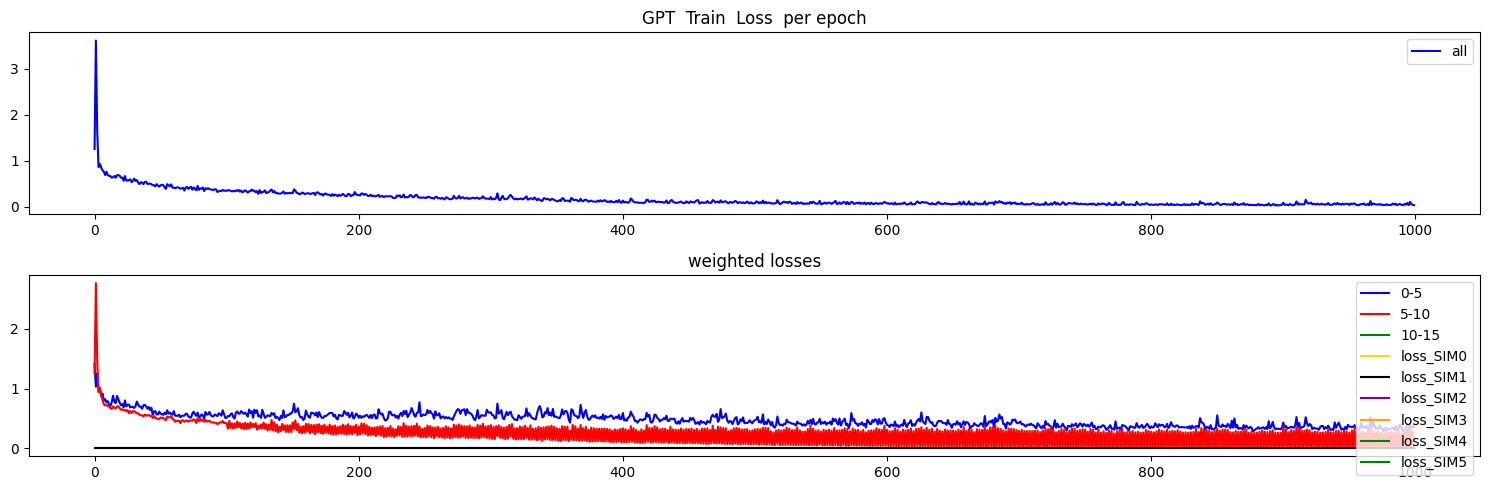

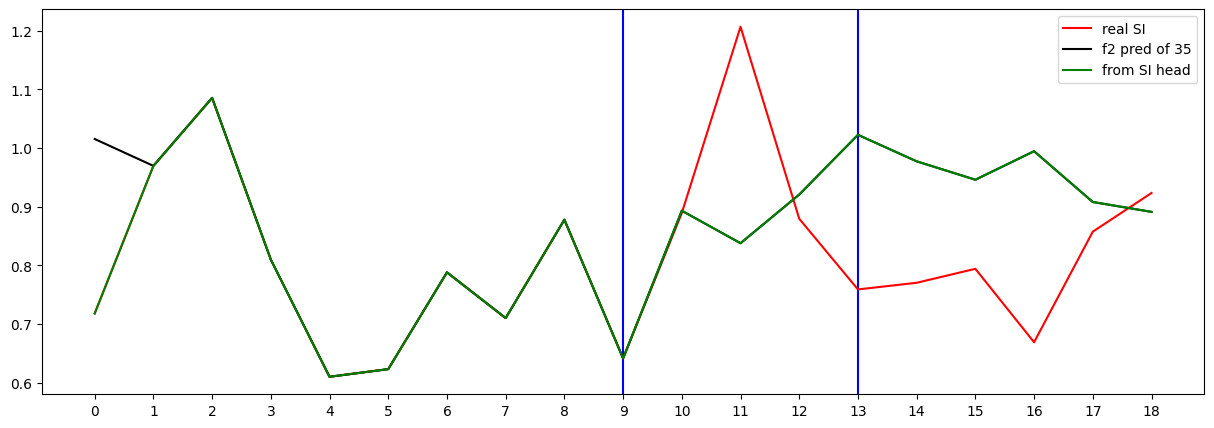

Testing R**2 - (all) - (no inputs):  0.9858598404902114
Testing R**2 - (f2) - SI full (no inputs):  -0.7377255986907965
Testing R**2 - SI head only (no inputs):  -0.7377255986907965
0 ...index R**2 (no inputs):  0.3388601920145612
1 ...index R**2 (no inputs):  -0.6880362018909252
2 ...index R**2 (no inputs):  -0.7377255986907965
3 ...index R**2 (no inputs):  -1.6028878229556502
4 ...index R**2 (no inputs):  -0.9631944509775778
5 ...index R**2 (no inputs):  -2.920672288298273
6 ...index R**2 (no inputs):  -3.7107031473512277
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.21922417297639218
10 ...index R**2 (no inputs):  0.3240125797737091
11 ...index R**2 (no inputs):  -13.12724839031595
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.3747497560439434
16 ...index R**2 (no inputs):  -2.2473269199537094
17 ...index R**2 (no inputs):  -107.29185270

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to1000_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to1000_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to1000.append( res_real )
all_pred_si_000to1000.append( res_pred )



## Run 5


In [53]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, chunk000to500_train, chunk000to1000_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.144739
Loss_SI: 1.1786857843399048 Loss_all: 1.0989199876785278
===
[100] Train Loss: 0.184809
Loss_SI: 0.6927272081375122 Loss_all: 0.3411601483821869
===
[200] Train Loss: 0.052657
Loss_SI: 0.8804532885551453 Loss_all: 0.3097494840621948
===
[300] Train Loss: 0.023646
Loss_SI: 0.5265651941299438 Loss_all: 0.22827619314193726
===
[400] Train Loss: 0.025965
Loss_SI: 0.522476851940155 Loss_all: 0.2167433798313141
===
[500] Train Loss: 0.018570
Loss_SI: 0.4125918447971344 Loss_all: 0.19847987592220306
===
[600] Train Loss: 0.014876
Loss_SI: 0.39461612701416016 Loss_all: 0.19487160444259644
===
[700] Train Loss: 0.016093
Loss_SI: 0.31937023997306824 Loss_all: 0.19837485253810883
===
[800] Train Loss: 0.019693
Loss_SI: 0.4085853695869446 Loss_all: 0.22853000462055206
===
[900] Train Loss: 0.008370
Loss_SI: 0.39379817247390747 Loss_all: 0.1845979541540146
===


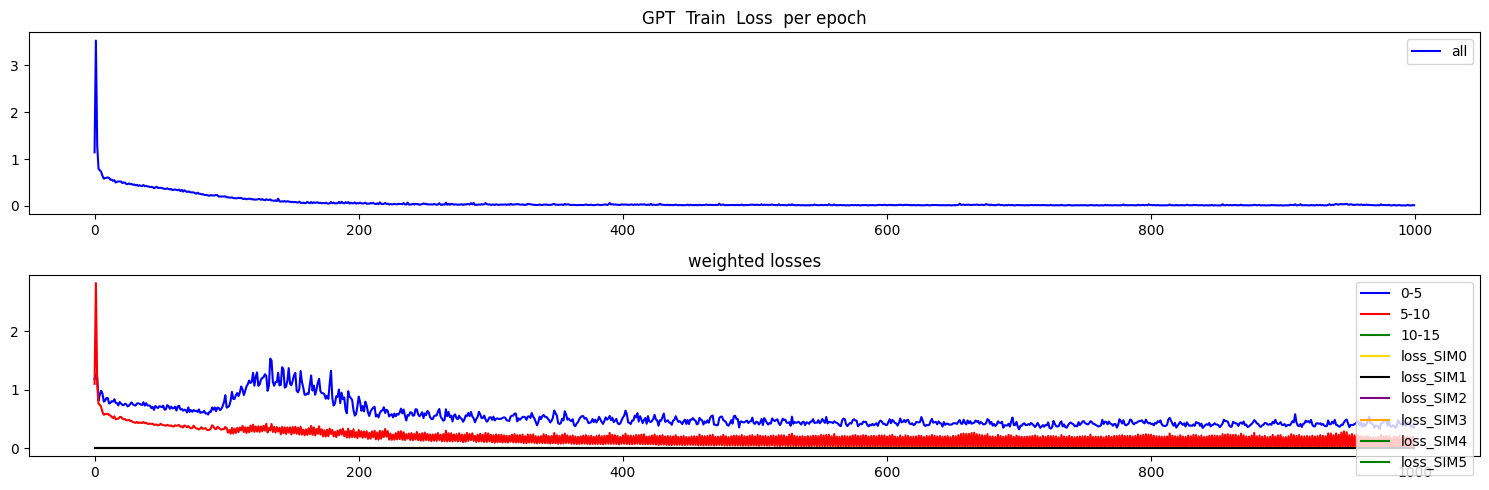

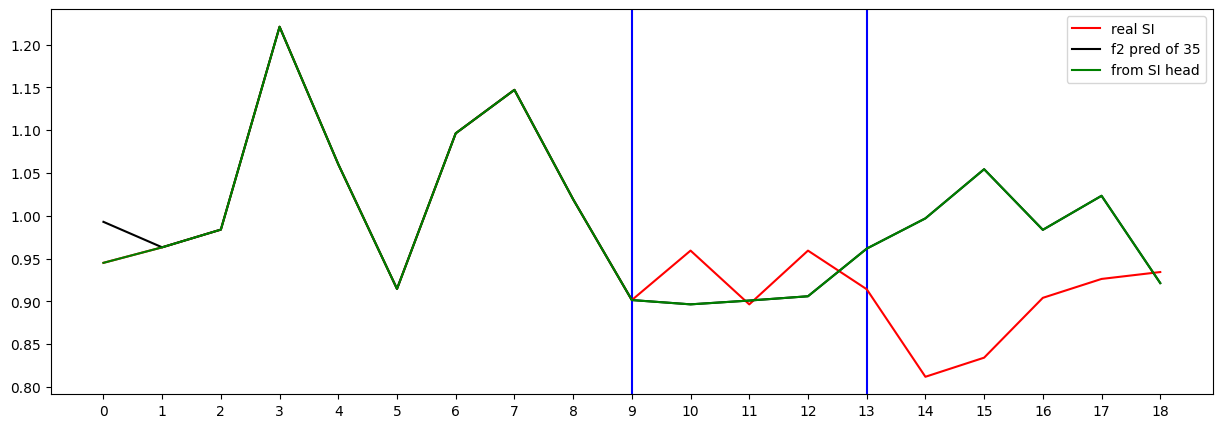

Testing R**2 - (all) - (no inputs):  0.9816930907618
Testing R**2 - (f2) - SI full (no inputs):  -3.41435236066268
Testing R**2 - SI head only (no inputs):  -3.41435236066268
0 ...index R**2 (no inputs):  -1.1670620248625152
1 ...index R**2 (no inputs):  -0.4029560629105118
2 ...index R**2 (no inputs):  -3.41435236066268
3 ...index R**2 (no inputs):  -881.1947227582879
4 ...index R**2 (no inputs):  -53.838706219673284
5 ...index R**2 (no inputs):  -195.98477939572695
6 ...index R**2 (no inputs):  -742.7947901694944
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.722352895388354
10 ...index R**2 (no inputs):  -2.2337237365486087
11 ...index R**2 (no inputs):  -102.68556701668452
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.39642453425340074
16 ...index R**2 (no inputs):  -0.4216246144208893
17 ...index R**2 (no inputs):  -347.06941365180796
1

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.330645
Loss_SI: 1.5749419927597046 Loss_all: 1.2364543676376343
===
[100] Train Loss: 0.278254
Loss_SI: 0.40933752059936523 Loss_all: 0.3673178553581238
===
[200] Train Loss: 0.098624
Loss_SI: 0.3409578502178192 Loss_all: 0.28783249855041504
===
[300] Train Loss: 0.058933
Loss_SI: 0.30026116967201233 Loss_all: 0.29230397939682007
===
[400] Train Loss: 0.044847
Loss_SI: 0.2624659538269043 Loss_all: 0.2456863820552826
===
[500] Train Loss: 0.030247
Loss_SI: 0.2800827920436859 Loss_all: 0.23122495412826538
===
[600] Train Loss: 0.033590
Loss_SI: 0.29127416014671326 Loss_all: 0.22802215814590454
===
[700] Train Loss: 0.036869
Loss_SI: 0.257293164730072 Loss_all: 0.23398086428642273
===
[800] Train Loss: 0.018332
Loss_SI: 0.21892893314361572 Loss_all: 0.19401560723781586
===
[900] Train Loss: 0.017366
Loss_SI: 0.22089706361293793 Loss_all: 0.19135691225528717
===


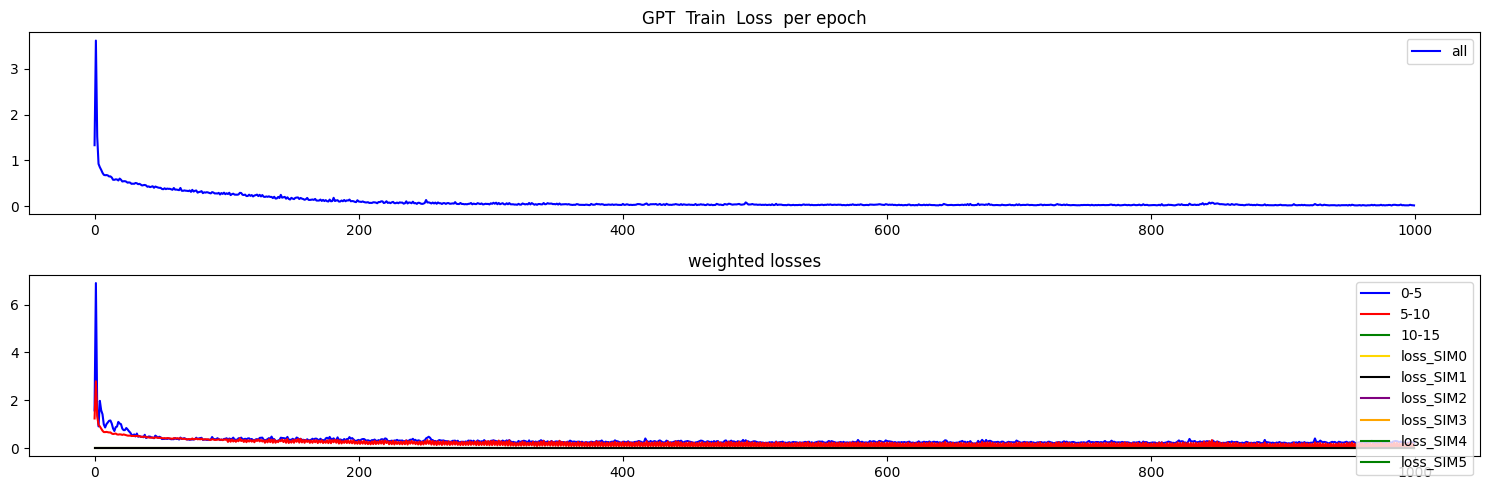

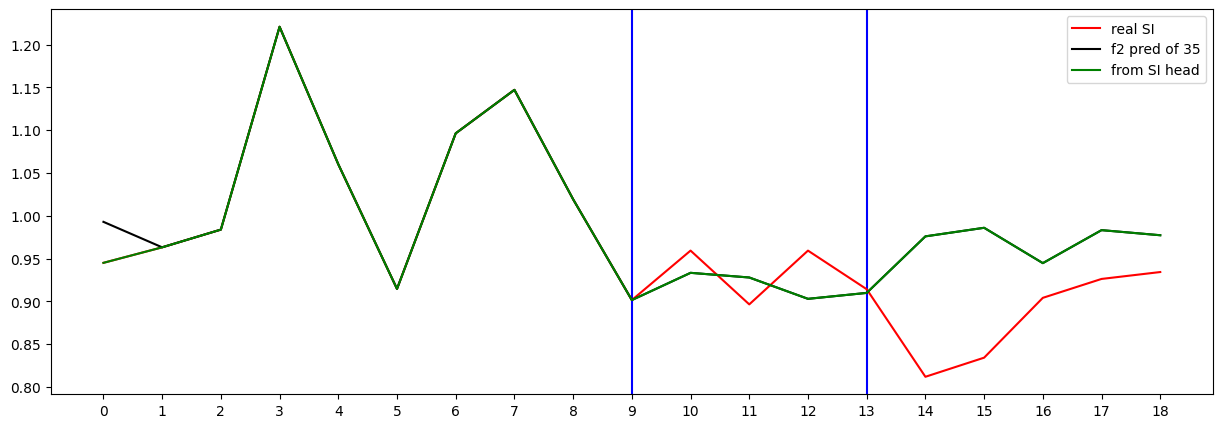

Testing R**2 - (all) - (no inputs):  0.9816318715260117
Testing R**2 - (f2) - SI full (no inputs):  -1.1698070289242612
Testing R**2 - SI head only (no inputs):  -1.1698070289242612
0 ...index R**2 (no inputs):  -0.06800263885232405
1 ...index R**2 (no inputs):  -0.3654536053672097
2 ...index R**2 (no inputs):  -1.1698070289242612
3 ...index R**2 (no inputs):  -59.47239530657945
4 ...index R**2 (no inputs):  -13.375980025187902
5 ...index R**2 (no inputs):  -196.16882721242007
6 ...index R**2 (no inputs):  -265.25254295780223
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.233020214300288
10 ...index R**2 (no inputs):  -1.851068082705949
11 ...index R**2 (no inputs):  -220.4900374038523
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3072824511795975
16 ...index R**2 (no inputs):  -50.35157010323913
17 ...index R**2 (no inputs):  -683.050657525

In [55]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.282845
Loss_SI: 1.3317131996154785 Loss_all: 1.2640103101730347
===
[100] Train Loss: 0.279085
Loss_SI: 0.4685782492160797 Loss_all: 0.3705095648765564
===
[200] Train Loss: 0.147648
Loss_SI: 0.46841201186180115 Loss_all: 0.3858194351196289
===
[300] Train Loss: 0.057259
Loss_SI: 0.40533190965652466 Loss_all: 0.29584068059921265
===
[400] Train Loss: 0.032886
Loss_SI: 0.2561386525630951 Loss_all: 0.23983550071716309
===
[500] Train Loss: 0.046647
Loss_SI: 0.32836204767227173 Loss_all: 0.2943750023841858
===
[600] Train Loss: 0.033204
Loss_SI: 0.30409231781959534 Loss_all: 0.25712794065475464
===
[700] Train Loss: 0.028067
Loss_SI: 0.2345408946275711 Loss_all: 0.24915559589862823
===
[800] Train Loss: 0.035781
Loss_SI: 0.3308504521846771 Loss_all: 0.3243950605392456
===
[900] Train Loss: 0.022936
Loss_SI: 0.2950066030025482 Loss_all: 0.24501806497573853
===


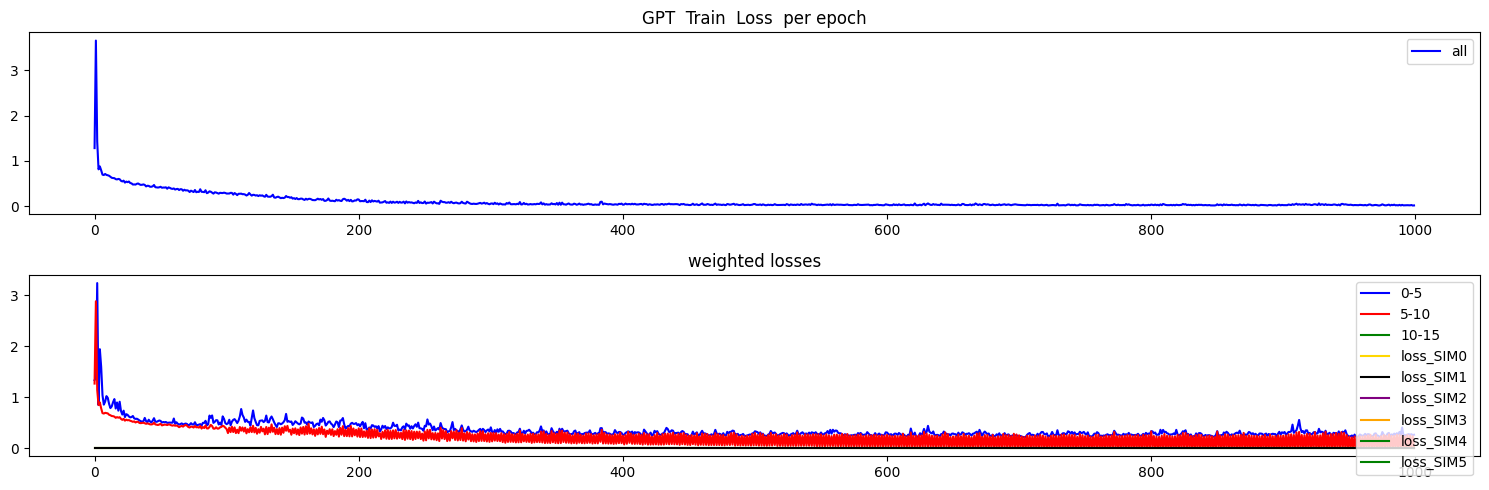

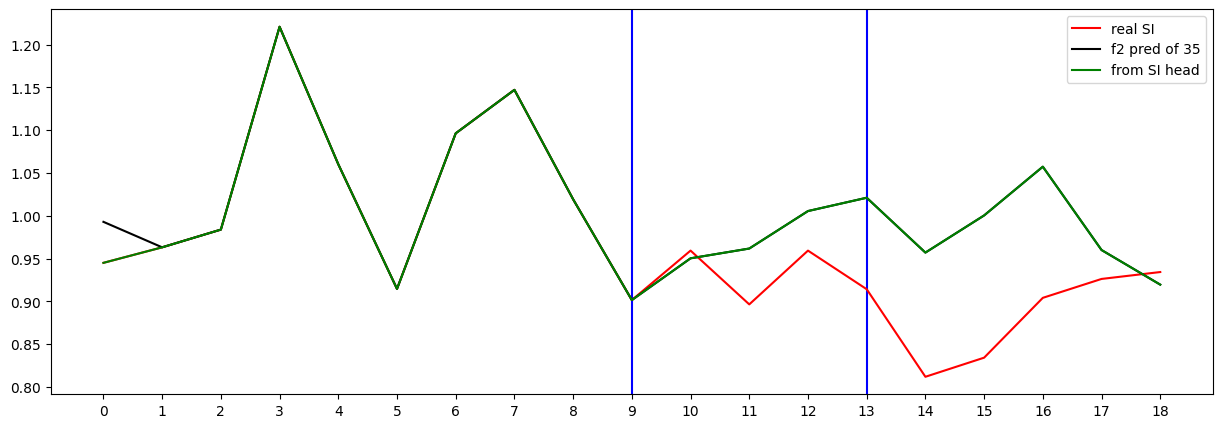

Testing R**2 - (all) - (no inputs):  0.9807190624145083
Testing R**2 - (f2) - SI full (no inputs):  -3.979528634297859
Testing R**2 - SI head only (no inputs):  -3.979528634297859
0 ...index R**2 (no inputs):  -1.5815170932208393
1 ...index R**2 (no inputs):  0.3741971804017846
2 ...index R**2 (no inputs):  -3.979528634297859
3 ...index R**2 (no inputs):  -412.4361219831156
4 ...index R**2 (no inputs):  -9.856606846052975
5 ...index R**2 (no inputs):  -206.1078812127687
6 ...index R**2 (no inputs):  -820.7735408726902
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.690866319521274
10 ...index R**2 (no inputs):  -1.176508297291837
11 ...index R**2 (no inputs):  -146.2522252090607
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.8050834826785858
16 ...index R**2 (no inputs):  -23.771140240236267
17 ...index R**2 (no inputs):  -665.5920990502317
18

In [56]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.273709
Loss_SI: 1.2763049602508545 Loss_all: 1.1875449419021606
===
[100] Train Loss: 0.308181
Loss_SI: 0.8234609961509705 Loss_all: 0.5144709944725037
===
[200] Train Loss: 0.153292
Loss_SI: 0.5134707689285278 Loss_all: 0.4288892447948456
===
[300] Train Loss: 0.122502
Loss_SI: 0.45768579840660095 Loss_all: 0.39708322286605835
===
[400] Train Loss: 0.043068
Loss_SI: 0.36376258730888367 Loss_all: 0.3169112205505371
===
[500] Train Loss: 0.040999
Loss_SI: 0.42879077792167664 Loss_all: 0.30570492148399353
===
[600] Train Loss: 0.044060
Loss_SI: 0.31894540786743164 Loss_all: 0.30387428402900696
===
[700] Train Loss: 0.042811
Loss_SI: 0.29406097531318665 Loss_all: 0.2732430696487427
===
[800] Train Loss: 0.021905
Loss_SI: 0.34135717153549194 Loss_all: 0.2509354054927826
===
[900] Train Loss: 0.050819
Loss_SI: 0.3933940529823303 Loss_all: 0.29380378127098083
===


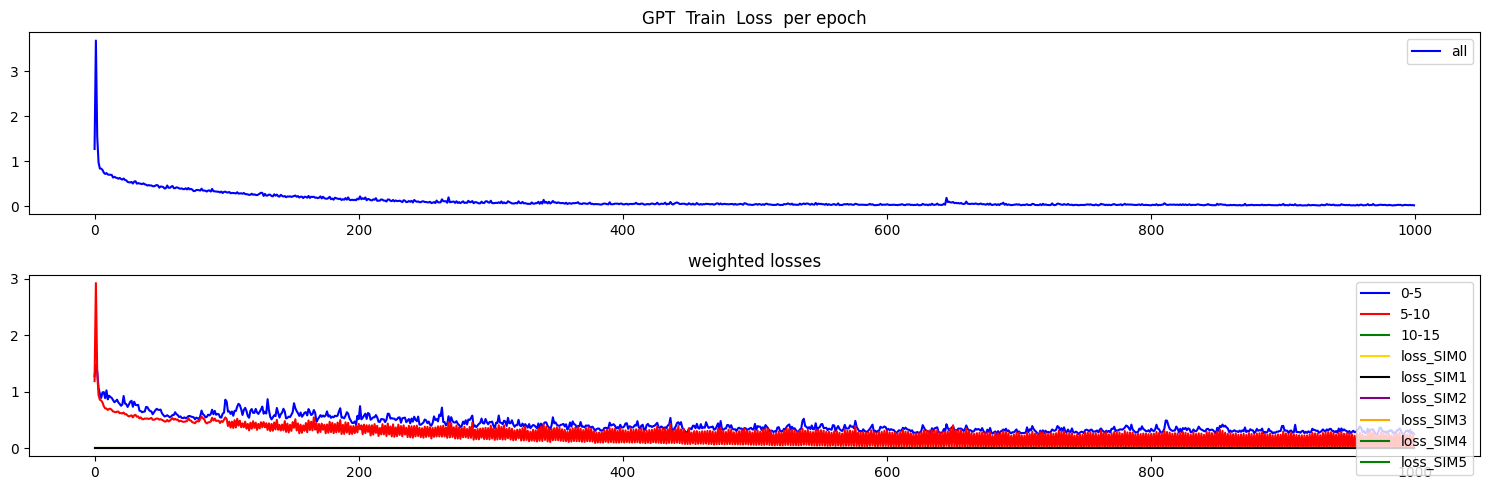

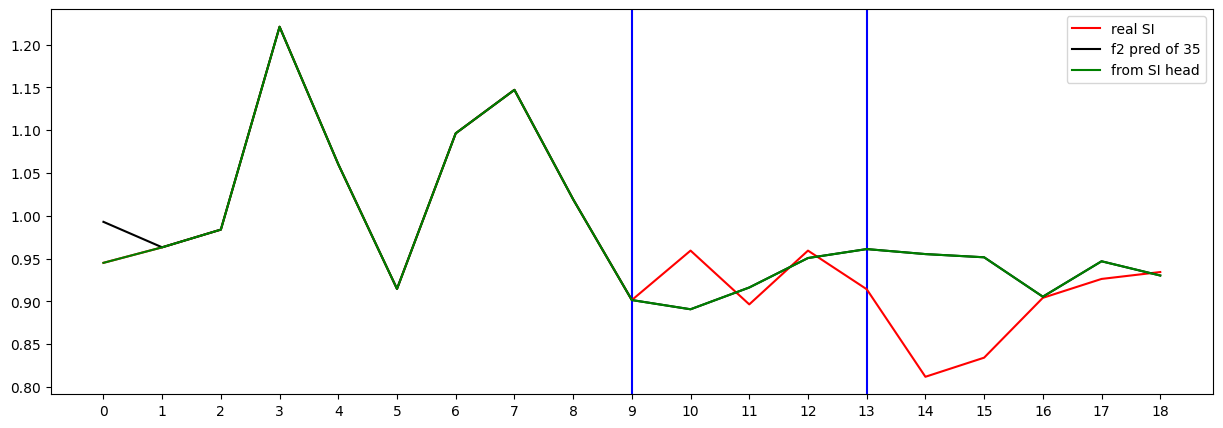

Testing R**2 - (all) - (no inputs):  0.9868940339454332
Testing R**2 - (f2) - SI full (no inputs):  -1.197103595243631
Testing R**2 - SI head only (no inputs):  -1.197103595243631
0 ...index R**2 (no inputs):  -0.31343770243580504
1 ...index R**2 (no inputs):  -0.08685229062497113
2 ...index R**2 (no inputs):  -1.197103595243631
3 ...index R**2 (no inputs):  -326.18167711484807
4 ...index R**2 (no inputs):  -14.345163716848468
5 ...index R**2 (no inputs):  -138.77678448997654
6 ...index R**2 (no inputs):  -336.5014363834122
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5700958889896275
10 ...index R**2 (no inputs):  -1.7711639995722805
11 ...index R**2 (no inputs):  -154.9652723664831
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.829087104131049
16 ...index R**2 (no inputs):  -27.700477470643918
17 ...index R**2 (no inputs):  -948.767925957

In [57]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


[0] Train Loss: 1.228195
Loss_SI: 1.240501046180725 Loss_all: 1.2372715473175049
===
[100] Train Loss: 0.304874
Loss_SI: 0.44786715507507324 Loss_all: 0.35865268111228943
===
[200] Train Loss: 0.177916
Loss_SI: 0.39906319975852966 Loss_all: 0.3169651925563812
===
[300] Train Loss: 0.138472
Loss_SI: 0.48963481187820435 Loss_all: 0.3943846821784973
===
[400] Train Loss: 0.093584
Loss_SI: 0.3673475384712219 Loss_all: 0.34327924251556396
===
[500] Train Loss: 0.064620
Loss_SI: 0.3065831959247589 Loss_all: 0.29505985975265503
===
[600] Train Loss: 0.038761
Loss_SI: 0.2883175313472748 Loss_all: 0.25197213888168335
===
[700] Train Loss: 0.046799
Loss_SI: 0.26892146468162537 Loss_all: 0.26192671060562134
===
[800] Train Loss: 0.064445
Loss_SI: 0.3138805329799652 Loss_all: 0.3477141559123993
===
[900] Train Loss: 0.036160
Loss_SI: 0.33062300086021423 Loss_all: 0.2760493755340576
===


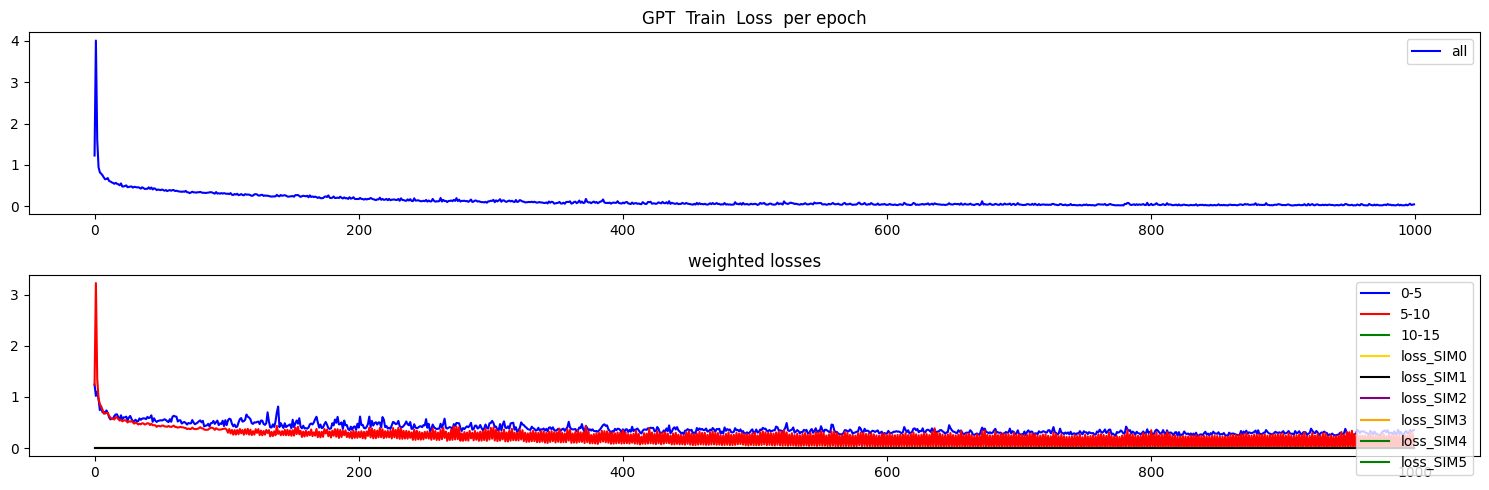

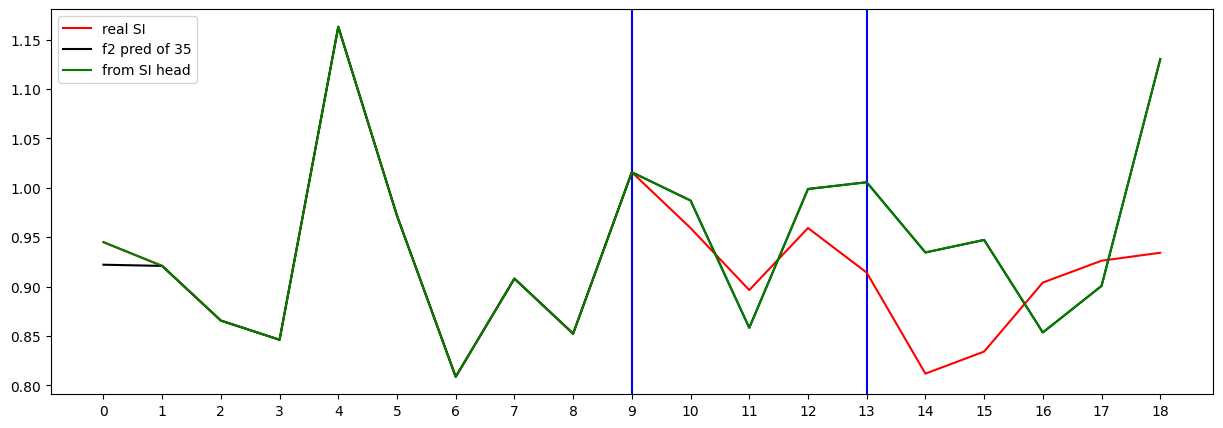

Testing R**2 - (all) - (no inputs):  0.986320224086942
Testing R**2 - (f2) - SI full (no inputs):  -4.888981805785614
Testing R**2 - SI head only (no inputs):  -4.888981805785614
0 ...index R**2 (no inputs):  -7.031747385346206
1 ...index R**2 (no inputs):  -0.18204964305991655
2 ...index R**2 (no inputs):  -4.888981805785614
3 ...index R**2 (no inputs):  -140.1558492326585
4 ...index R**2 (no inputs):  -6.546917733848647
5 ...index R**2 (no inputs):  -124.13677128883945
6 ...index R**2 (no inputs):  -199.665182886664
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3447741017944348
10 ...index R**2 (no inputs):  0.096380644297415
11 ...index R**2 (no inputs):  -78.45340675046155
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.4512628311477394
16 ...index R**2 (no inputs):  -9.22574192204032
17 ...index R**2 (no inputs):  -18698.447944727963
18 

In [58]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to500_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )


[0] Train Loss: 1.292024
Loss_SI: 1.284419298171997 Loss_all: 1.3021868467330933
===
[100] Train Loss: 0.311921
Loss_SI: 0.4687575399875641 Loss_all: 0.37161633372306824
===
[200] Train Loss: 0.251127
Loss_SI: 0.4096115231513977 Loss_all: 0.31394970417022705
===
[300] Train Loss: 0.181186
Loss_SI: 0.3563707768917084 Loss_all: 0.2957986295223236
===
[400] Train Loss: 0.183658
Loss_SI: 0.35727912187576294 Loss_all: 0.3203379213809967
===
[500] Train Loss: 0.095053
Loss_SI: 0.3467791974544525 Loss_all: 0.24523258209228516
===
[600] Train Loss: 0.085364
Loss_SI: 0.3219144940376282 Loss_all: 0.24717599153518677
===
[700] Train Loss: 0.105401
Loss_SI: 0.35288819670677185 Loss_all: 0.27501577138900757
===
[800] Train Loss: 0.067132
Loss_SI: 0.3081289231777191 Loss_all: 0.25374120473861694
===
[900] Train Loss: 0.063834
Loss_SI: 0.3069377839565277 Loss_all: 0.24305157363414764
===


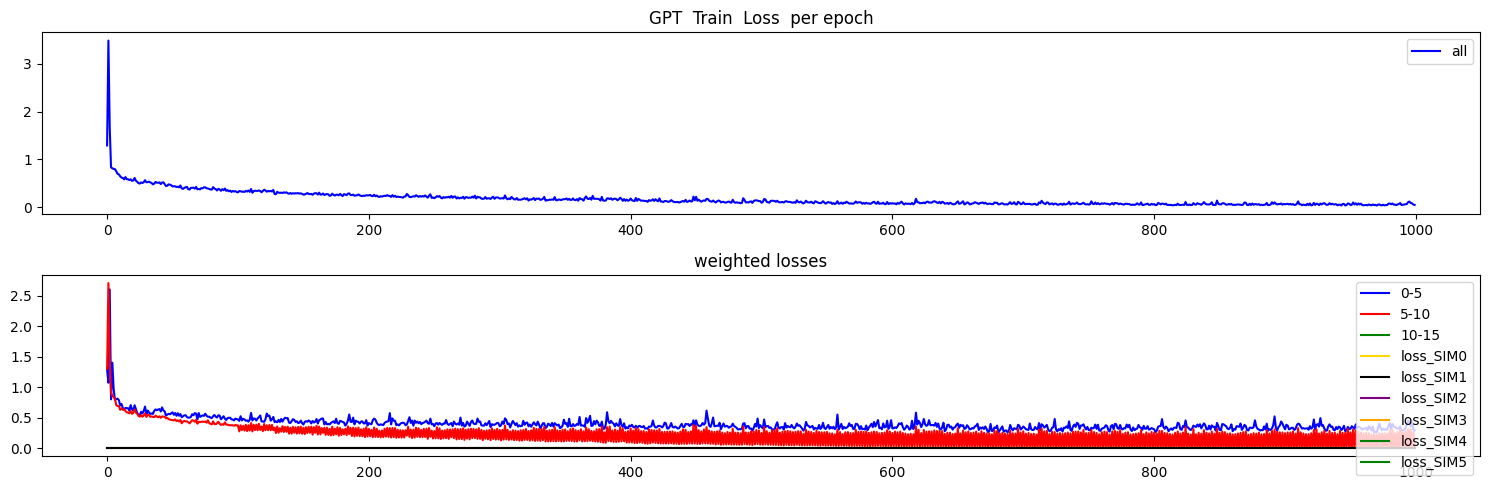

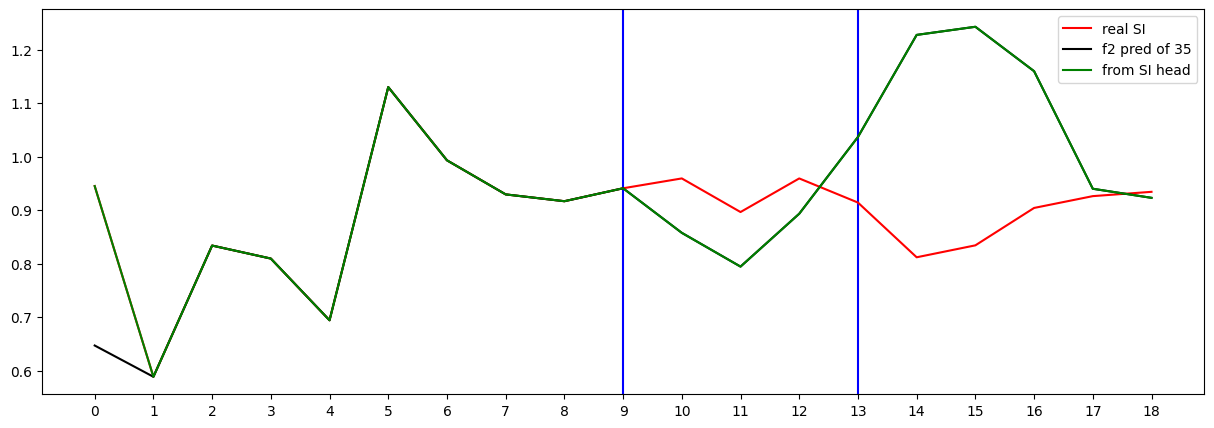

Testing R**2 - (all) - (no inputs):  0.9778415893843099
Testing R**2 - (f2) - SI full (no inputs):  -19.570313687831142
Testing R**2 - SI head only (no inputs):  -19.570313687831142
0 ...index R**2 (no inputs):  -7.819084009510677
1 ...index R**2 (no inputs):  -3.00951598591051
2 ...index R**2 (no inputs):  -19.570313687831142
3 ...index R**2 (no inputs):  -3912.8662223439196
4 ...index R**2 (no inputs):  -9.411854840129918
5 ...index R**2 (no inputs):  -234.3160409140933
6 ...index R**2 (no inputs):  -55.84109079679733
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9821757015017762
10 ...index R**2 (no inputs):  -0.4100787682357685
11 ...index R**2 (no inputs):  -390.7771643366987
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.604837794907773
16 ...index R**2 (no inputs):  -0.5704593716153938
17 ...index R**2 (no inputs):  -2936.535988562101

In [59]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to1000_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to1000_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to1000.append( res_real )
all_pred_si_000to1000.append( res_pred )



## Run 6


In [60]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, chunk000to500_train, chunk000to1000_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.186061
Loss_SI: 1.4180656671524048 Loss_all: 1.2884900569915771
===
[100] Train Loss: 0.151437
Loss_SI: 0.30619463324546814 Loss_all: 0.26872459053993225
===
[200] Train Loss: 0.062809
Loss_SI: 0.2134377509355545 Loss_all: 0.22046154737472534
===
[300] Train Loss: 0.029093
Loss_SI: 0.1931360810995102 Loss_all: 0.18225115537643433
===
[400] Train Loss: 0.019009
Loss_SI: 0.1694401651620865 Loss_all: 0.15840370953083038
===
[500] Train Loss: 0.013362
Loss_SI: 0.14856404066085815 Loss_all: 0.1549811214208603
===
[600] Train Loss: 0.024869
Loss_SI: 0.19118736684322357 Loss_all: 0.18418753147125244
===
[700] Train Loss: 0.013380
Loss_SI: 0.16018901765346527 Loss_all: 0.15942537784576416
===
[800] Train Loss: 0.026348
Loss_SI: 0.21134677529335022 Loss_all: 0.20961499214172363
===
[900] Train Loss: 0.015536
Loss_SI: 0.2112438976764679 Loss_all: 0.1652127206325531
===


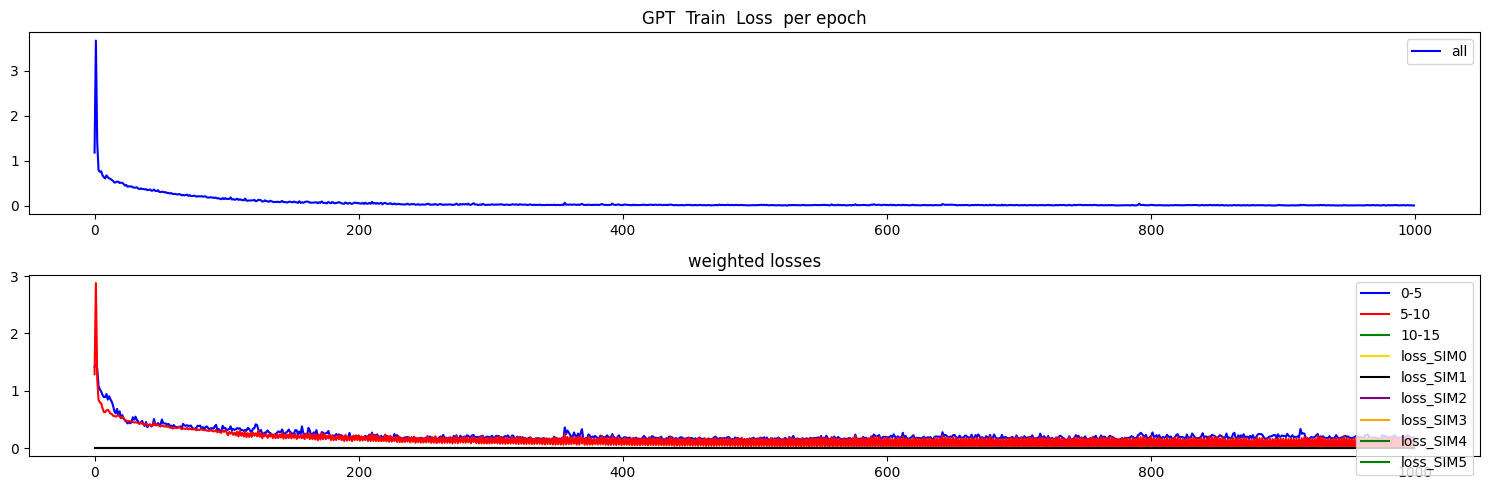

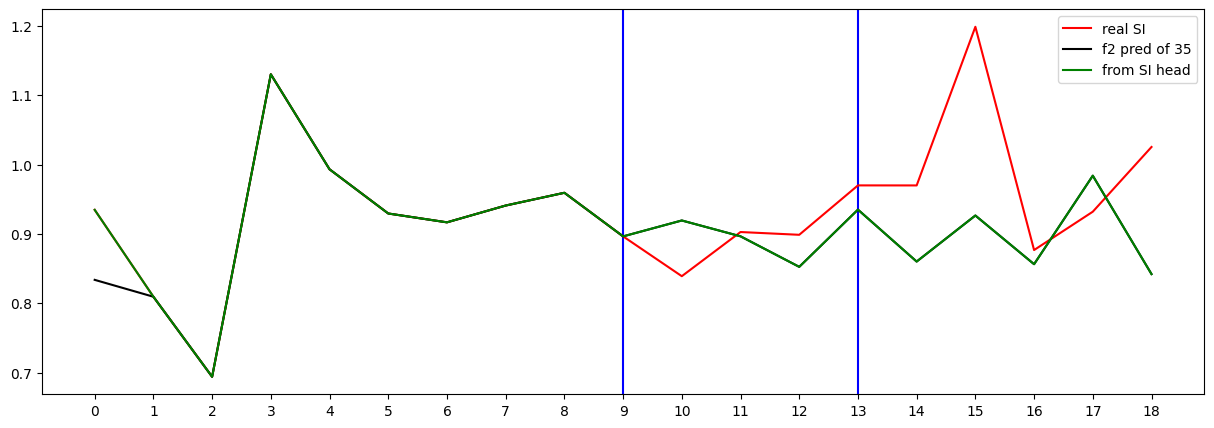

Testing R**2 - (all) - (no inputs):  0.8978051131607496
Testing R**2 - (f2) - SI full (no inputs):  -0.9452414937794991
Testing R**2 - SI head only (no inputs):  -0.9452414937794991
0 ...index R**2 (no inputs):  -0.5676688456974313
1 ...index R**2 (no inputs):  -0.6300611972060426
2 ...index R**2 (no inputs):  -0.9452414937794991
3 ...index R**2 (no inputs):  -13146.848574652924
4 ...index R**2 (no inputs):  -1.2347102198830382
5 ...index R**2 (no inputs):  -306.99681728719287
6 ...index R**2 (no inputs):  -33.478534309946106
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.2296264943227238
10 ...index R**2 (no inputs):  -0.8359429388587651
11 ...index R**2 (no inputs):  -2420.272404201871
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -40.63208238395019
16 ...index R**2 (no inputs):  -1.4920115507347753
17 ...index R**2 (no inputs):  -7330.617464

In [61]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.305403
Loss_SI: 1.7418138980865479 Loss_all: 1.3029489517211914
===
[100] Train Loss: 0.267042
Loss_SI: 0.5126824378967285 Loss_all: 0.37918928265571594
===
[200] Train Loss: 0.082734
Loss_SI: 0.48557090759277344 Loss_all: 0.31938791275024414
===
[300] Train Loss: 0.041843
Loss_SI: 0.30702099204063416 Loss_all: 0.26892268657684326
===
[400] Train Loss: 0.045348
Loss_SI: 0.27633950114250183 Loss_all: 0.2681838870048523
===
[500] Train Loss: 0.047379
Loss_SI: 0.2897873520851135 Loss_all: 0.27345725893974304
===
[600] Train Loss: 0.027850
Loss_SI: 0.23346853256225586 Loss_all: 0.2405238151550293
===
[700] Train Loss: 0.027670
Loss_SI: 0.22030721604824066 Loss_all: 0.22328823804855347
===
[800] Train Loss: 0.020876
Loss_SI: 0.2259417027235031 Loss_all: 0.21393868327140808
===
[900] Train Loss: 0.034660
Loss_SI: 0.2603864371776581 Loss_all: 0.2496558427810669
===


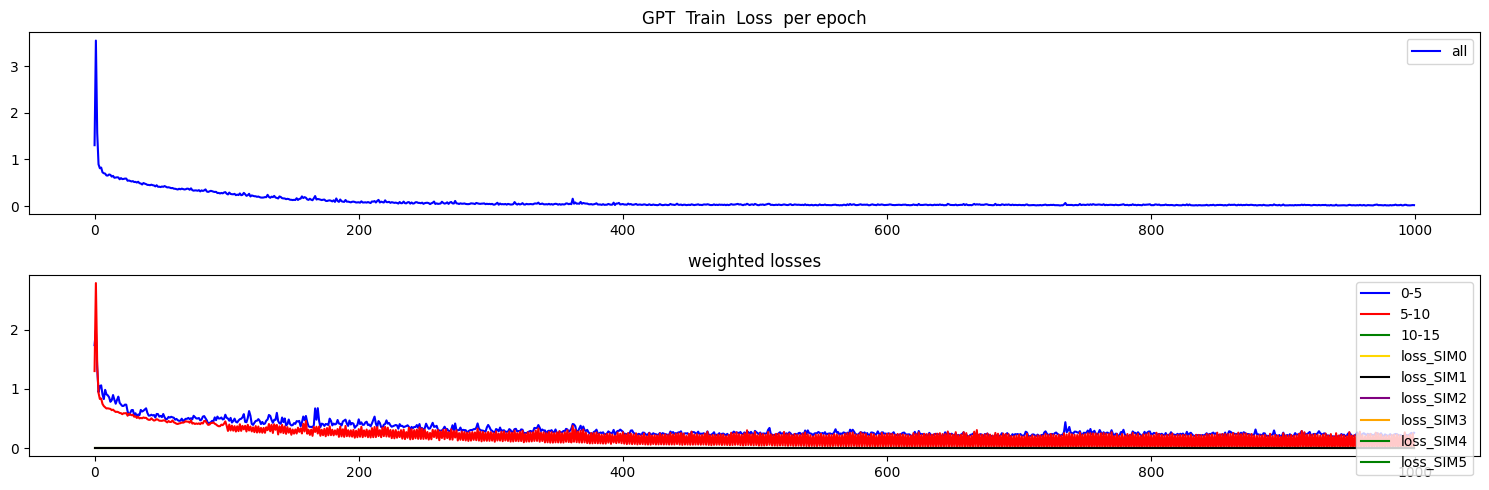

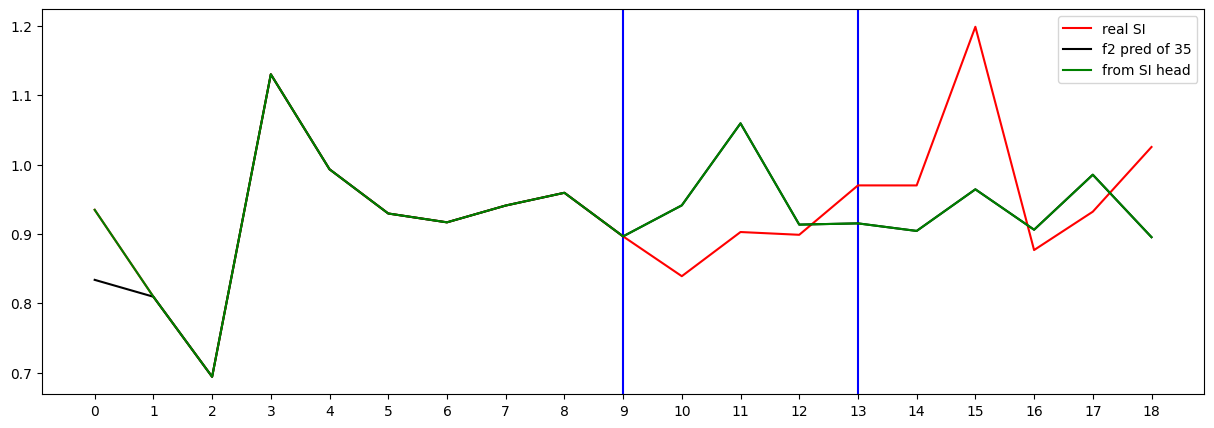

Testing R**2 - (all) - (no inputs):  0.8864173425767816
Testing R**2 - (f2) - SI full (no inputs):  -0.7256495324016565
Testing R**2 - SI head only (no inputs):  -0.7256495324016565
0 ...index R**2 (no inputs):  -0.661931444338117
1 ...index R**2 (no inputs):  -1.0090922839610368
2 ...index R**2 (no inputs):  -0.7256495324016565
3 ...index R**2 (no inputs):  -13028.32699057819
4 ...index R**2 (no inputs):  -0.2943033472336567
5 ...index R**2 (no inputs):  -341.51605107841436
6 ...index R**2 (no inputs):  -32.79699871720467
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3786661502188267
10 ...index R**2 (no inputs):  -0.8541552041815879
11 ...index R**2 (no inputs):  -3096.598439769746
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -45.52342163302902
16 ...index R**2 (no inputs):  -1.5657327668838747
17 ...index R**2 (no inputs):  -7521.659476467

In [62]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.272814
Loss_SI: 1.525131106376648 Loss_all: 1.2734856605529785
===
[100] Train Loss: 0.299362
Loss_SI: 0.48373541235923767 Loss_all: 0.3942890167236328
===
[200] Train Loss: 0.127968
Loss_SI: 0.45066308975219727 Loss_all: 0.3723244369029999
===
[300] Train Loss: 0.043759
Loss_SI: 0.3442723751068115 Loss_all: 0.26571717858314514
===
[400] Train Loss: 0.029051
Loss_SI: 0.3291359841823578 Loss_all: 0.23620611429214478
===
[500] Train Loss: 0.036891
Loss_SI: 0.35899510979652405 Loss_all: 0.2713821530342102
===
[600] Train Loss: 0.039174
Loss_SI: 0.3438306450843811 Loss_all: 0.24839052557945251
===
[700] Train Loss: 0.027315
Loss_SI: 0.3120953440666199 Loss_all: 0.222042053937912
===
[800] Train Loss: 0.027868
Loss_SI: 0.30483242869377136 Loss_all: 0.2289460450410843
===
[900] Train Loss: 0.023661
Loss_SI: 0.27346378564834595 Loss_all: 0.2164737731218338
===


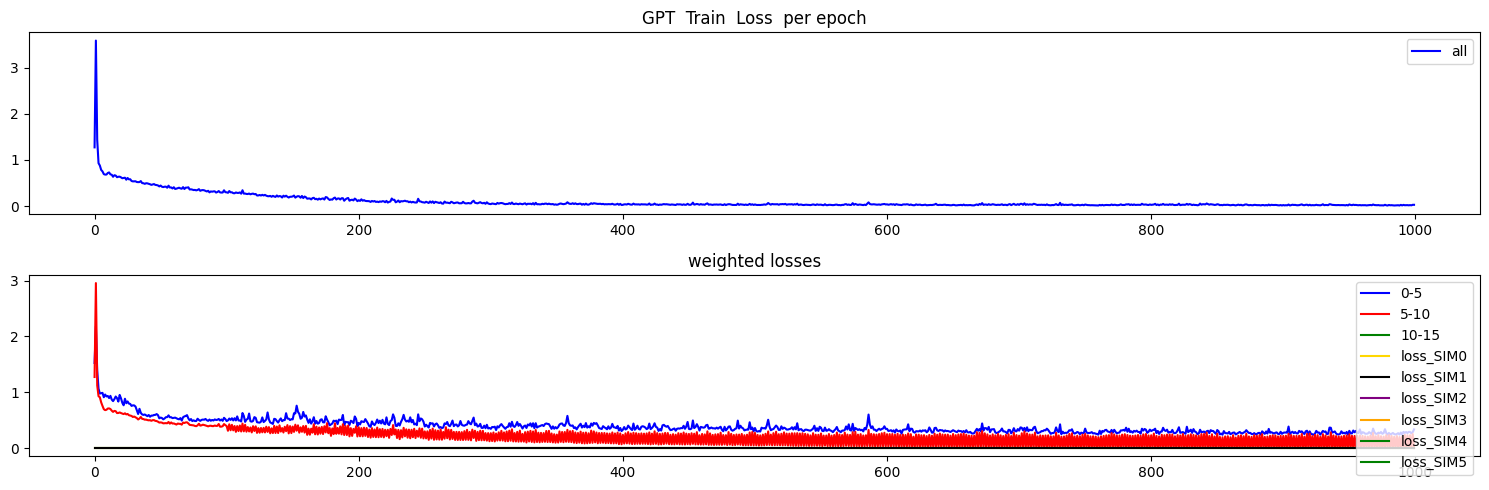

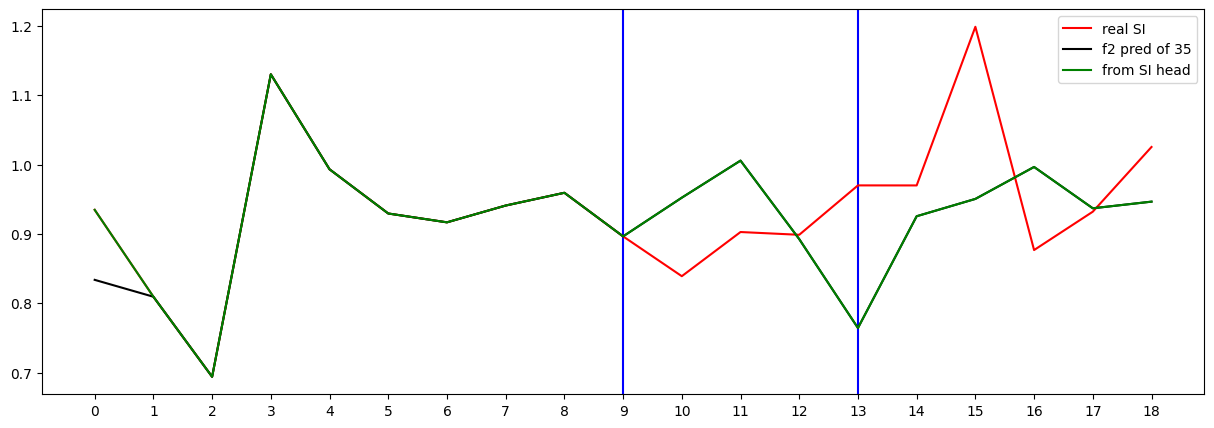

Testing R**2 - (all) - (no inputs):  0.9023269984201165
Testing R**2 - (f2) - SI full (no inputs):  -1.022758937247513
Testing R**2 - SI head only (no inputs):  -1.022758937247513
0 ...index R**2 (no inputs):  -0.13790507680090314
1 ...index R**2 (no inputs):  -2.2833642884517444
2 ...index R**2 (no inputs):  -1.022758937247513
3 ...index R**2 (no inputs):  -9928.494587087465
4 ...index R**2 (no inputs):  -3.2496898101085367
5 ...index R**2 (no inputs):  -293.2677698462508
6 ...index R**2 (no inputs):  -31.092862569685288
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3068422006174618
10 ...index R**2 (no inputs):  -1.5755866271439598
11 ...index R**2 (no inputs):  -2442.444654551562
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -39.395379570751395
16 ...index R**2 (no inputs):  -1.461230197841568
17 ...index R**2 (no inputs):  -7305.2094242167

In [63]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.294489
Loss_SI: 1.5131349563598633 Loss_all: 1.2975239753723145
===
[100] Train Loss: 0.343075
Loss_SI: 0.5913130640983582 Loss_all: 0.44626837968826294
===
[200] Train Loss: 0.193583
Loss_SI: 0.7336065173149109 Loss_all: 0.40162092447280884
===
[300] Train Loss: 0.079373
Loss_SI: 0.5274600386619568 Loss_all: 0.32779067754745483
===
[400] Train Loss: 0.042197
Loss_SI: 0.3973238170146942 Loss_all: 0.28963369131088257
===
[500] Train Loss: 0.027347
Loss_SI: 0.3368047773838043 Loss_all: 0.23793238401412964
===
[600] Train Loss: 0.051818
Loss_SI: 0.3940761089324951 Loss_all: 0.2890780568122864
===
[700] Train Loss: 0.033557
Loss_SI: 0.297924280166626 Loss_all: 0.24125531315803528
===
[800] Train Loss: 0.029597
Loss_SI: 0.29325971007347107 Loss_all: 0.26698246598243713
===
[900] Train Loss: 0.023247
Loss_SI: 0.27278104424476624 Loss_all: 0.23200462758541107
===


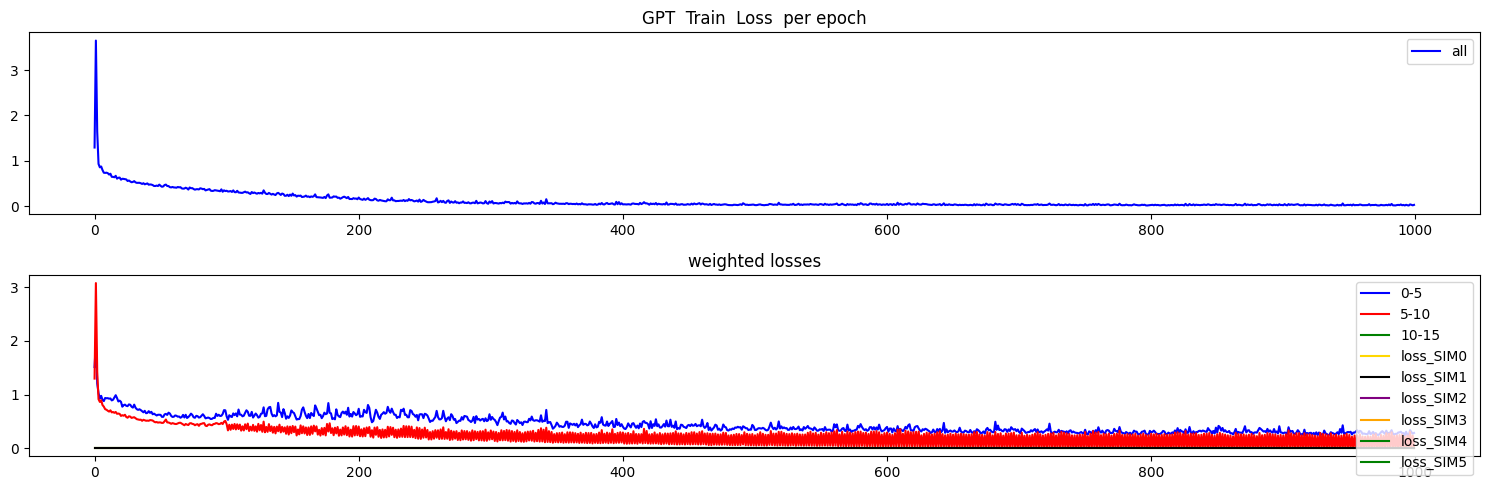

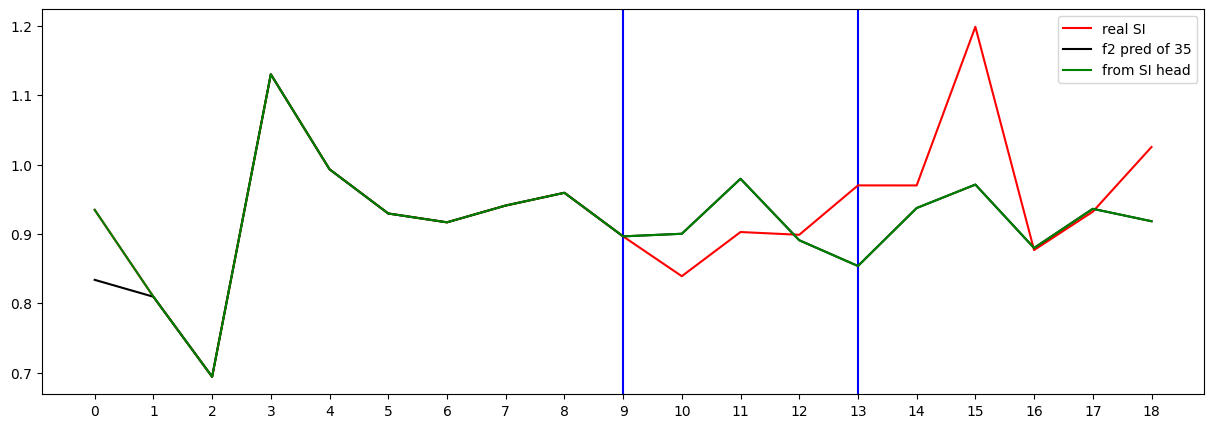

Testing R**2 - (all) - (no inputs):  0.885281486469881
Testing R**2 - (f2) - SI full (no inputs):  -0.5003458418770383
Testing R**2 - SI head only (no inputs):  -0.5003458418770383
0 ...index R**2 (no inputs):  -0.4155542022022132
1 ...index R**2 (no inputs):  -0.970911344620581
2 ...index R**2 (no inputs):  -0.5003458418770383
3 ...index R**2 (no inputs):  -8386.122082521573
4 ...index R**2 (no inputs):  -2.5581680849898594
5 ...index R**2 (no inputs):  -345.01101777027753
6 ...index R**2 (no inputs):  -33.86522611528146
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.767855273916266
10 ...index R**2 (no inputs):  -1.3351407467538094
11 ...index R**2 (no inputs):  -1150.2498938566075
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -36.39057028979616
16 ...index R**2 (no inputs):  -1.5737354132252337
17 ...index R**2 (no inputs):  -7168.7990855018

In [64]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


[0] Train Loss: 1.251709
Loss_SI: 1.2075791358947754 Loss_all: 1.2402921915054321
===
[100] Train Loss: 0.304624
Loss_SI: 0.5115265250205994 Loss_all: 0.36709821224212646
===
[200] Train Loss: 0.213554
Loss_SI: 0.4095252454280853 Loss_all: 0.308581680059433
===
[300] Train Loss: 0.129528
Loss_SI: 0.47204843163490295 Loss_all: 0.277438223361969
===
[400] Train Loss: 0.071279
Loss_SI: 0.42484456300735474 Loss_all: 0.2739931046962738
===
[500] Train Loss: 0.067770
Loss_SI: 0.34396329522132874 Loss_all: 0.26254817843437195
===
[600] Train Loss: 0.072088
Loss_SI: 0.3484801650047302 Loss_all: 0.25488120317459106
===
[700] Train Loss: 0.042488
Loss_SI: 0.34798580408096313 Loss_all: 0.23374703526496887
===
[800] Train Loss: 0.041085
Loss_SI: 0.32826900482177734 Loss_all: 0.23325243592262268
===
[900] Train Loss: 0.038853
Loss_SI: 0.2797372341156006 Loss_all: 0.21644678711891174
===


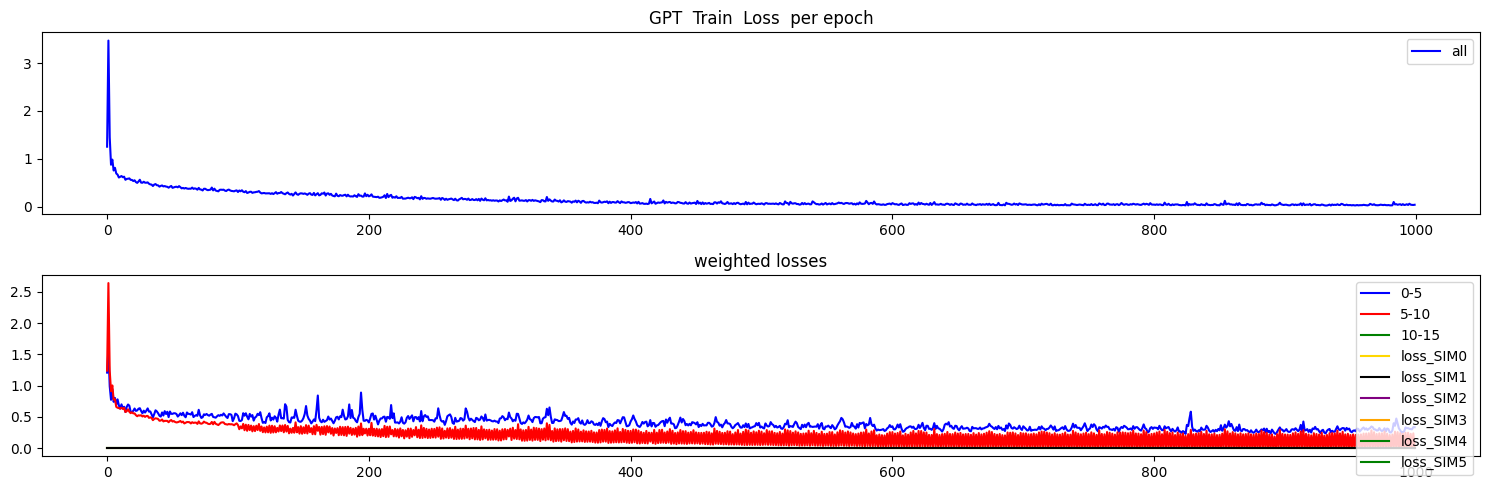

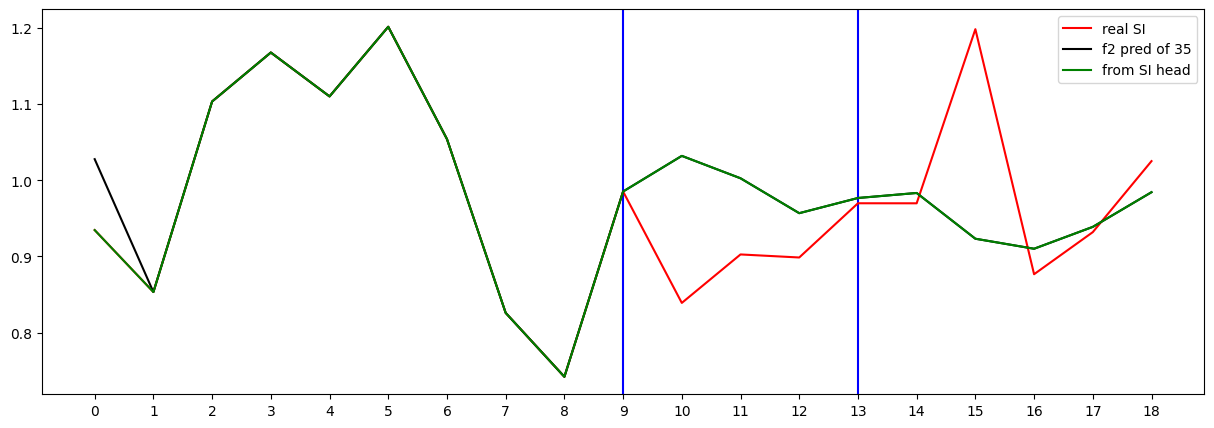

Testing R**2 - (all) - (no inputs):  0.9802195583499577
Testing R**2 - (f2) - SI full (no inputs):  -0.1366136909080511
Testing R**2 - SI head only (no inputs):  -0.1366136909080511
0 ...index R**2 (no inputs):  0.05439286940897281
1 ...index R**2 (no inputs):  0.13808417279375973
2 ...index R**2 (no inputs):  -0.1366136909080511
3 ...index R**2 (no inputs):  -169.62246172756116
4 ...index R**2 (no inputs):  -1.9378292468606895
5 ...index R**2 (no inputs):  -48.57026487967648
6 ...index R**2 (no inputs):  -23.105158868708735
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5973226406119172
10 ...index R**2 (no inputs):  -0.769625255634691
11 ...index R**2 (no inputs):  -1553.7945346692245
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.197088429840655
16 ...index R**2 (no inputs):  -1.0214921339712921
17 ...index R**2 (no inputs):  -30424.19124

In [65]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to500_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )



[0] Train Loss: 1.233008
Loss_SI: 1.535898208618164 Loss_all: 1.2753411531448364
===
[100] Train Loss: 0.336567
Loss_SI: 0.5131327509880066 Loss_all: 0.39763975143432617
===
[200] Train Loss: 0.273922
Loss_SI: 0.5198202133178711 Loss_all: 0.3565133213996887
===
[300] Train Loss: 0.168936
Loss_SI: 0.40125975012779236 Loss_all: 0.2833425998687744
===
[400] Train Loss: 0.114198
Loss_SI: 0.3320893347263336 Loss_all: 0.26152414083480835
===
[500] Train Loss: 0.112963
Loss_SI: 0.3390912115573883 Loss_all: 0.2900007367134094
===
[600] Train Loss: 0.128396
Loss_SI: 0.4949401021003723 Loss_all: 0.29254019260406494
===
[700] Train Loss: 0.064748
Loss_SI: 0.2778704762458801 Loss_all: 0.2488362342119217
===
[800] Train Loss: 0.063918
Loss_SI: 0.3500005900859833 Loss_all: 0.2483619898557663
===
[900] Train Loss: 0.058257
Loss_SI: 0.37938544154167175 Loss_all: 0.2470201998949051
===


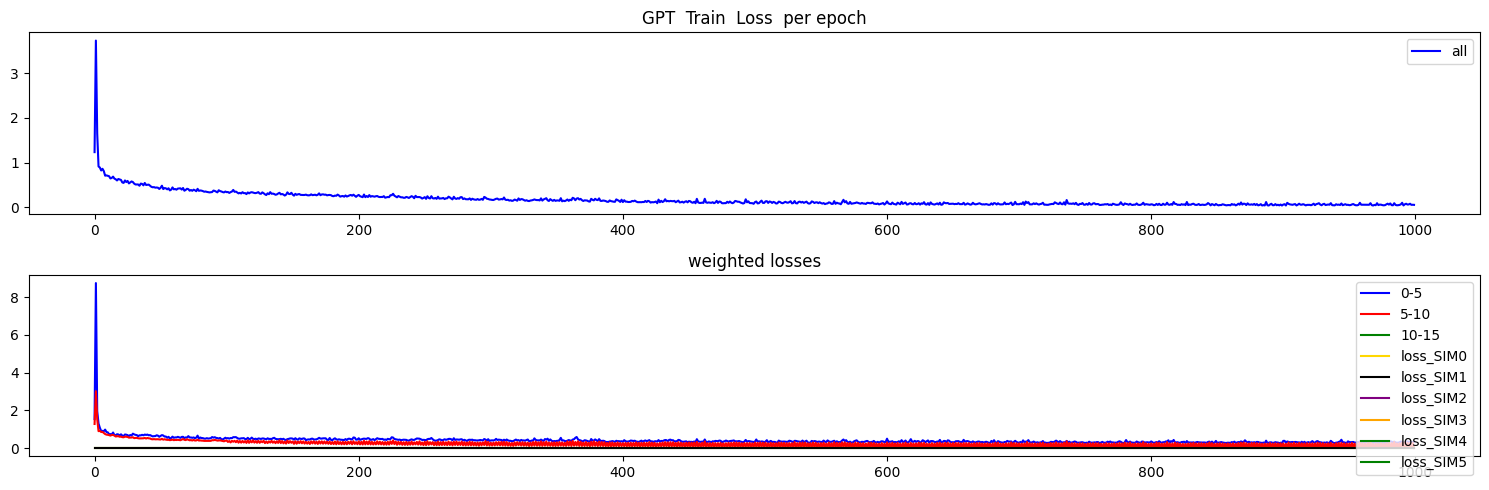

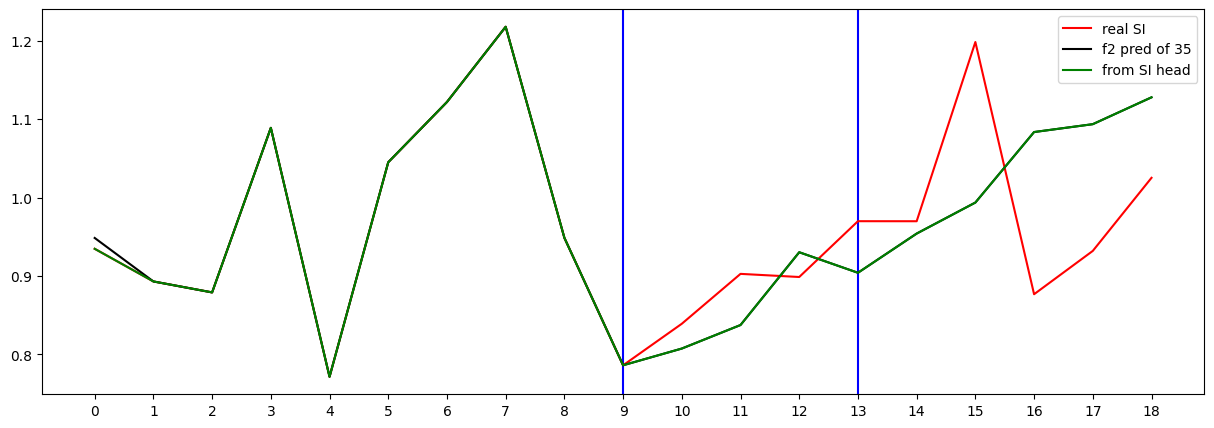

Testing R**2 - (all) - (no inputs):  0.9977400173589409
Testing R**2 - (f2) - SI full (no inputs):  -1.0620602919595492
Testing R**2 - SI head only (no inputs):  -1.0620602919595492
0 ...index R**2 (no inputs):  -0.09468165851406973
1 ...index R**2 (no inputs):  -0.27664540622776035
2 ...index R**2 (no inputs):  -1.0620602919595492
3 ...index R**2 (no inputs):  -952.1337231821518
4 ...index R**2 (no inputs):  0.30758269502300284
5 ...index R**2 (no inputs):  -5.791149168854794
6 ...index R**2 (no inputs):  0.1078284991768883
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.221287527896574
10 ...index R**2 (no inputs):  0.6311864832652058
11 ...index R**2 (no inputs):  -2.5460811253293745
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.968777826946253
16 ...index R**2 (no inputs):  -0.109134847352653
17 ...index R**2 (no inputs):  -40.90654032992

In [66]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to1000_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to1000_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to1000.append( res_real )
all_pred_si_000to1000.append( res_pred )



## R2 over accumulated Runs


In [67]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)

real_si_concat_000to500 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to500 = np.concatenate(all_pred_si_000to400)

real_si_concat_000to1000 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to1000 = np.concatenate(all_pred_si_000to400)



In [68]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -2.183554991815416


In [69]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -1.3047029724651216


In [70]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -1.6073060295368768


In [71]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -1.9118301779368632


In [72]:

r2 = r2_score(real_si_concat_000to500, pred_si_concat_000to500 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -1.9118301779368632


In [73]:

r2 = r2_score(real_si_concat_000to1000, pred_si_concat_000to1000 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -1.9118301779368632



## First Few R2


In [74]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [75]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [76]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -1.3282148465545665
Naive_R2:....................................R²: -0.0782
RMSE:0.3022,MAE:0.1968,MASE:0.8411
1 .......................R² on just step n - R²: -1.3282148465545665
Naive_R2:....................................R²: -0.0782
RMSE:0.3022,MAE:0.1968,MASE:0.8411
2 .....................R² on first n steps - R²: -1.7998652661131707
Naive_R2:....................................R²: -0.8020
RMSE:0.2906,MAE:0.1917,MASE:1.4628
2 .......................R² on just step n - R²: -2.783302412132363
Naive_R2:....................................R²: -1.5441
RMSE:0.2786,MAE:0.1866,MASE:1.2843
3 .....................R² on first n steps - R²: -1.7648082632411328
Naive_R2:....................................R²: -0.9615
RMSE:0.2634,MAE:0.1795,MASE:1.4846
3 .......................R² on just step n - R²: -1.6390421625260108
Naive_R2:....................................R²: -1.4815
RMSE:0.1982,MAE:0.1552,MASE:1.1754
4 .....................R² on first 

In [77]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: -1.349720694719558
Naive_R2:....................................R²: -0.0882
RMSE:0.3036,MAE:0.2156,MASE:0.9216
1 .......................R² on just step n - R²: -1.349720694719558
Naive_R2:....................................R²: -0.0882
RMSE:0.3036,MAE:0.2156,MASE:0.9216
2 .....................R² on first n steps - R²: -1.7379100454303789
Naive_R2:....................................R²: -0.7621
RMSE:0.2874,MAE:0.2072,MASE:1.5813
2 .......................R² on just step n - R²: -2.5600125867730763
Naive_R2:....................................R²: -1.3939
RMSE:0.2703,MAE:0.1988,MASE:1.3686
3 .....................R² on first n steps - R²: -1.6417124296749166
Naive_R2:....................................R²: -0.8742
RMSE:0.2575,MAE:0.1866,MASE:1.5431
3 .......................R² on just step n - R²: -1.267305588075859
Naive_R2:....................................R²: -1.1320
RMSE:0.1837,MAE:0.1454,MASE:1.1010
4 .....................R² on first n 

In [78]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -1.4827785940501421
Naive_R2:....................................R²: -0.1498
RMSE:0.3120,MAE:0.2324,MASE:0.9934
1 .......................R² on just step n - R²: -1.4827785940501421
Naive_R2:....................................R²: -0.1498
RMSE:0.3120,MAE:0.2324,MASE:0.9934
2 .....................R² on first n steps - R²: -1.5190965281389084
Naive_R2:....................................R²: -0.6213
RMSE:0.2757,MAE:0.2111,MASE:1.6107
2 .......................R² on just step n - R²: -1.6622532733404505
Naive_R2:....................................R²: -0.7902
RMSE:0.2337,MAE:0.1897,MASE:1.3061
3 .....................R² on first n steps - R²: -1.7286253620996992
Naive_R2:....................................R²: -0.9358
RMSE:0.2617,MAE:0.2048,MASE:1.6935
3 .......................R² on just step n - R²: -2.5943851178449937
Naive_R2:....................................R²: -2.3798
RMSE:0.2313,MAE:0.1923,MASE:1.4557
4 .....................R² on first

In [79]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -1.0542933332508189
Naive_R2:....................................R²: 0.0487
RMSE:0.2838,MAE:0.1770,MASE:0.7564
1 .......................R² on just step n - R²: -1.0542933332508189
Naive_R2:....................................R²: 0.0487
RMSE:0.2838,MAE:0.1770,MASE:0.7564
2 .....................R² on first n steps - R²: -1.4306041597769714
Naive_R2:....................................R²: -0.5643
RMSE:0.2708,MAE:0.1922,MASE:1.4670
2 .......................R² on just step n - R²: -2.2210072364254954
Naive_R2:....................................R²: -1.1660
RMSE:0.2571,MAE:0.2075,MASE:1.4283
3 .....................R² on first n steps - R²: -2.034890964732356
Naive_R2:....................................R²: -1.1531
RMSE:0.2760,MAE:0.1999,MASE:1.6532
3 .......................R² on just step n - R²: -4.503119717267117
Naive_R2:....................................R²: -4.1746
RMSE:0.2862,MAE:0.2153,MASE:1.6303
4 .....................R² on first n s

In [80]:


print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 1 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 2 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 3 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 4 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 5 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 6 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 7 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 8 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 9 )


1 .....................R² on first n steps - R²: -1.0542933332508189
Naive_R2:....................................R²: 0.0487
RMSE:0.2838,MAE:0.1770,MASE:0.7564
1 .......................R² on just step n - R²: -1.0542933332508189
Naive_R2:....................................R²: 0.0487
RMSE:0.2838,MAE:0.1770,MASE:0.7564
2 .....................R² on first n steps - R²: -1.4306041597769714
Naive_R2:....................................R²: -0.5643
RMSE:0.2708,MAE:0.1922,MASE:1.4670
2 .......................R² on just step n - R²: -2.2210072364254954
Naive_R2:....................................R²: -1.1660
RMSE:0.2571,MAE:0.2075,MASE:1.4283
3 .....................R² on first n steps - R²: -2.034890964732356
Naive_R2:....................................R²: -1.1531
RMSE:0.2760,MAE:0.1999,MASE:1.6532
3 .......................R² on just step n - R²: -4.503119717267117
Naive_R2:....................................R²: -4.1746
RMSE:0.2862,MAE:0.2153,MASE:1.6303
4 .....................R² on first n s

In [81]:


print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 1 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 2 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 3 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 4 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 5 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 6 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 7 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 8 )
print_first_few_R2( real_si_concat_000to1000, pred_si_concat_000to1000, 9 )


1 .....................R² on first n steps - R²: -1.0542933332508189
Naive_R2:....................................R²: 0.0487
RMSE:0.2838,MAE:0.1770,MASE:0.7564
1 .......................R² on just step n - R²: -1.0542933332508189
Naive_R2:....................................R²: 0.0487
RMSE:0.2838,MAE:0.1770,MASE:0.7564
2 .....................R² on first n steps - R²: -1.4306041597769714
Naive_R2:....................................R²: -0.5643
RMSE:0.2708,MAE:0.1922,MASE:1.4670
2 .......................R² on just step n - R²: -2.2210072364254954
Naive_R2:....................................R²: -1.1660
RMSE:0.2571,MAE:0.2075,MASE:1.4283
3 .....................R² on first n steps - R²: -2.034890964732356
Naive_R2:....................................R²: -1.1531
RMSE:0.2760,MAE:0.1999,MASE:1.6532
3 .......................R² on just step n - R²: -4.503119717267117
Naive_R2:....................................R²: -4.1746
RMSE:0.2862,MAE:0.2153,MASE:1.6303
4 .....................R² on first n s


## Plot


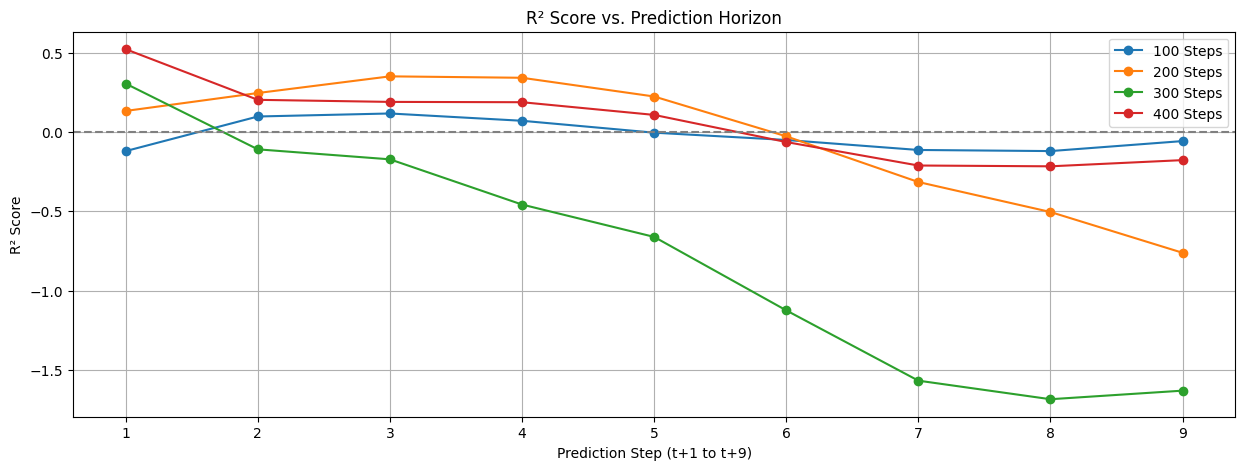

In [82]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
